In [543]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [544]:
california_housing = fetch_california_housing()
#california_housing

In [545]:
data_X = pd.DataFrame(data=california_housing["data"], columns=california_housing["feature_names"])
data_y = pd.DataFrame(data=california_housing["target"], columns=california_housing["target_names"])
data_X.head(), data_y.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
    MedHouseVal
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422)

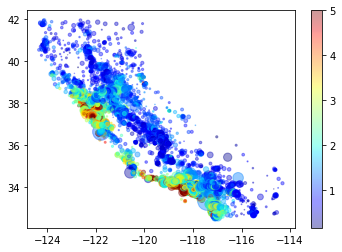

In [546]:
plt.scatter(data_X["Longitude"], 
            data_X["Latitude"], 
            s=data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=data_y["MedHouseVal"])
plt.colorbar()

In [547]:
if type(data_X) != np.ndarray: 
    data_X = data_X.to_numpy()
print(data_X.shape)
if type(data_y) != np.ndarray:
    data_y = data_y.to_numpy()
data_y = data_y.reshape(-1)
print(data_y.shape)

(20640, 8)
(20640,)


In [548]:
print(data_X.shape)
print(data_X[0][1])

(20640, 8)
41.0


[1. 1. 1. 1. 1. 1. 1. 1.]


100%|████████████████████████████████████| 4000/4000 [00:00<00:00, 12392.23it/s]


mininininn:  0
[ 297.53869206 2355.2612594   483.03124181 ...  952.56127021  687.60184183
 1332.55256226]
3184159.1437355047
[1. 1. 1. 0. 1. 1. 1. 1.]

[ 1.07091298e+04  7.09254182e+04  1.45901096e+04  2.95793081e+03
  6.49330763e+06  1.03417476e+04  9.78550085e+04 -3.29679890e+05]

[ 1.07175078e+04  7.09873073e+04  1.46040049e+04  2.96078536e+03
  6.49636315e+06  1.03484218e+04  9.79333028e+04 -3.29942123e+05]


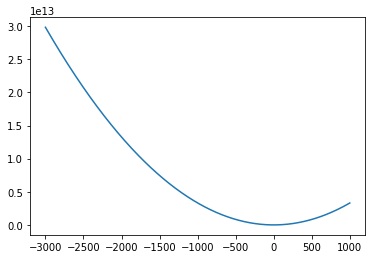

In [549]:
m = len(data_y)
n = len(data_X[1])

weights = np.ones(n)
print(weights)

def forward(w):
    return w.dot(data_X.T)

def error(preds):
    return (1/m)*(np.sum((preds-data_y)**2))

def only(target_index):
    test = np.zeros((m, 8))
    for i in range(m):
        test[i][target_index] = -data_X[i][target_index]
    return test

def get_derivatives(w):
    ret = np.zeros(n)
    for i in range(n):        
        der = (-2/m)*(np.sum((forward(w)-data_y).T.dot(only(i))))
        ret[i] = der
    return ret

min1 = -3000
max2 = 1000
tests = []
thing = weights.copy()
for i in tqdm(range(min1,max2)):
    thing[4] = i
    hy = forward(thing)
    tests.append(error(hy))
    
plt.plot([*range(min1, max2)], tests)
print("mininininn: ", [*range(min1, max2)][np.argmin(tests)])
    

print(forward(weights))
print(error(forward(weights)))
#print(only(5))
test = weights.copy()
test[3] = 0
print(test)
print()
print(get_derivatives(test))
print()
print(get_derivatives(weights))

  0%|                                          | 1/6666 [00:00<11:08,  9.97it/s]

3184159.1437355047
358583.75613080524
41240.58804235102


  0%|                                          | 5/6666 [00:00<07:46, 14.26it/s]

5597.787951324857
1592.8511983930011
1141.1778624386488
1088.5775277185312


  0%|                                          | 9/6666 [00:00<07:22, 15.06it/s]

1080.8020468204863
1078.0656843926977
1075.9000792301108
1073.8033757508476


  0%|                                         | 13/6666 [00:00<07:16, 15.24it/s]

1071.7191979211955
1069.641201690447
1067.568662148247
1065.501485503939


  0%|                                         | 17/6666 [00:01<07:14, 15.30it/s]

1063.439648880283
1061.383137396431
1059.3319371016064
1057.2860341814044


  0%|▏                                        | 21/6666 [00:01<07:18, 15.16it/s]

1055.245414868566
1053.2100654328758
1051.1799721799425
1049.1551214509839


  0%|▏                                        | 25/6666 [00:01<07:11, 15.40it/s]

1047.1354996227155
1045.1210931072608
1043.1118883520567
1041.1078718397619


  0%|▏                                        | 29/6666 [00:01<07:09, 15.44it/s]

1039.1090300881651
1037.115349650096
1035.1268171133315
1033.1434191005062


  0%|▏                                        | 33/6666 [00:02<07:09, 15.43it/s]

1031.165142269022
1029.191973310956
1027.223898952973
1025.260905956234


  1%|▏                                        | 37/6666 [00:02<07:11, 15.36it/s]

1023.3029811163062
1021.3501112630747
1019.4022832606528
1017.4594840072933


  1%|▎                                        | 41/6666 [00:02<07:09, 15.43it/s]

1015.521700435299
1013.5889195109347
1011.6611282343388
1009.7383136394365


  1%|▎                                        | 45/6666 [00:02<07:09, 15.43it/s]

1007.8204627938507
1005.9075627988137
1003.9996007890812
1002.0965639328452


  1%|▎                                        | 49/6666 [00:03<07:08, 15.45it/s]

1000.1984394316462
998.305214520288
996.4168764667485
994.5334125720964


  1%|▎                                        | 53/6666 [00:03<07:08, 15.44it/s]

992.6548101704046
990.7810566286621
988.9121393466917
987.0480457570627


  1%|▎                                        | 57/6666 [00:03<07:07, 15.48it/s]

985.1887633250066
983.3342795483308
981.4845819573362
979.6396581147313


  1%|▍                                        | 61/6666 [00:04<07:07, 15.46it/s]

977.799495615549
975.9640820870599
974.133405188692
972.307452611945


  1%|▍                                        | 65/6666 [00:04<07:06, 15.47it/s]

970.4862120803077
968.6696713491749
966.8578182057635
965.0506404690315


  1%|▍                                        | 69/6666 [00:04<07:08, 15.39it/s]

963.2481259895949
961.4502626496432
959.657038362861
957.8684410743446


  1%|▍                                        | 73/6666 [00:04<07:10, 15.33it/s]

956.0844587605183
954.305079429056
952.5302911187997
950.7600818996752


  1%|▍                                        | 77/6666 [00:05<07:09, 15.34it/s]

948.9944398726165
947.2333531694806
945.4768099529689
943.7247984165488


  1%|▍                                        | 81/6666 [00:05<07:08, 15.38it/s]

941.9773067843711
940.2343233111899
938.4958362822865
936.7618340133859


  1%|▌                                        | 85/6666 [00:05<07:07, 15.41it/s]

935.0323048505821
933.3072371702548
931.5866193789938
929.8704399135183


  1%|▌                                        | 89/6666 [00:05<07:07, 15.38it/s]

928.1586872406004
926.4513498569868
924.7484162893186
923.0498750940568


  1%|▌                                        | 93/6666 [00:06<07:07, 15.37it/s]

921.3557148574035
919.665924195224
917.9804917529691
916.2994062056014


  1%|▌                                        | 97/6666 [00:06<07:04, 15.46it/s]

914.6226562575144
912.9502306424597
911.2821181234686
909.6183074927756


  2%|▌                                       | 101/6666 [00:06<07:05, 15.43it/s]

907.9587875717442
906.3035472107911
904.6525752893075
903.00586071559


  2%|▋                                       | 105/6666 [00:06<07:06, 15.39it/s]

901.3633924267585
899.7251593886864
898.0911505959227
896.4613550716199


  2%|▋                                       | 109/6666 [00:07<07:03, 15.47it/s]

894.8357618674581
893.2143600635709
891.5971387684731
889.9840871189846


  2%|▋                                       | 113/6666 [00:07<07:03, 15.48it/s]

888.3751942801581
886.7704494452055
885.1698418354252
883.5733607001281


  2%|▋                                       | 117/6666 [00:07<07:02, 15.49it/s]

881.9809953165667
880.3927349898597
878.8085690529211
877.228486866389


  2%|▋                                       | 121/6666 [00:07<07:04, 15.42it/s]

875.6524778185519
874.0805313252768
872.5126368299386
870.9487838033482


  2%|▊                                       | 125/6666 [00:08<07:04, 15.42it/s]

869.3889617436813
867.8331601764063
866.2813686542146
864.7335767569504


  2%|▊                                       | 129/6666 [00:08<07:04, 15.40it/s]

863.1897740915377
861.6499502919121
860.1140950189496
858.5821979603967


  2%|▊                                       | 133/6666 [00:08<07:04, 15.41it/s]

857.0542488308015
855.530237371442
854.0101533502594
852.493986561786


  2%|▊                                       | 137/6666 [00:08<07:03, 15.41it/s]

850.9817268270779
849.4733639936455
847.9688879353848
846.4682885525091


  2%|▊                                       | 141/6666 [00:09<07:04, 15.38it/s]

844.9715557714798
843.4786795449393
841.9896498516418
840.5044566963865


  2%|▊                                       | 145/6666 [00:09<07:09, 15.20it/s]

839.0230901099488
837.5455401490141
836.0717968961094


  2%|▉                                       | 149/6666 [00:09<07:08, 15.21it/s]

834.6018504595362
833.1356909733046
831.6733085970651
830.2146935160423


  2%|▉                                       | 153/6666 [00:09<07:07, 15.24it/s]

828.7598359409701
827.3087261080224
825.8613542787492
824.41771074001


  2%|▉                                       | 157/6666 [00:10<07:09, 15.17it/s]

822.9777858039088
821.5415698077262
820.1090531138568
818.6802261097423


  2%|▉                                       | 161/6666 [00:10<07:10, 15.13it/s]

817.2550792078065
815.8336028453905
814.4157874846887
813.0016236126834


  2%|▉                                       | 165/6666 [00:10<07:09, 15.15it/s]

811.5911017410801
810.1842124062441
808.7809461691357
807.3812936152473


  3%|█                                       | 167/6666 [00:10<07:10, 15.08it/s]

805.9852453545374
804.5927920213708
803.2039242744509


  3%|█                                       | 171/6666 [00:11<07:04, 15.30it/s]

801.8186327967591
800.4369082954912
799.0587415019949
797.6841231717053


  3%|█                                       | 175/6666 [00:11<07:02, 15.37it/s]

796.3130440840844
794.9454950425574
793.5814668744501
792.2209504309287


  3%|█                                       | 179/6666 [00:11<07:00, 15.43it/s]

790.8639365869353
789.5104162411284
788.1603803158195
786.8138197569127


  3%|█                                       | 183/6666 [00:11<06:58, 15.50it/s]

785.4707255338425
784.1310886395142
782.7949000902408
781.4621509256845


  3%|█                                       | 187/6666 [00:12<06:58, 15.49it/s]

780.1328322087936
778.8069350257434
777.4844504858764
776.1653697216401


  3%|█▏                                      | 191/6666 [00:12<06:57, 15.51it/s]

774.8496838885291
773.5373841650234
772.2284617525302
770.9229078753231


  3%|█▏                                      | 195/6666 [00:12<06:55, 15.58it/s]

769.6207137804835
768.321870737841
767.0263700399141
765.7342030018516


  3%|█▏                                      | 199/6666 [00:12<06:53, 15.63it/s]

764.4453609613734
763.1598352787121
761.8776173365544
760.598698539983


  3%|█▏                                      | 203/6666 [00:13<06:53, 15.63it/s]

759.3230703164178
758.0507241155585
756.7816514093264
755.5158436918063


  3%|█▏                                      | 207/6666 [00:13<06:55, 15.55it/s]

754.2532924791898
752.9939893097168
751.7379257436187
750.4850933630624


  3%|█▎                                      | 211/6666 [00:13<06:52, 15.64it/s]

749.23548377209
747.9890885965659
746.7458994841176
745.5059081040797


  3%|█▎                                      | 215/6666 [00:14<06:54, 15.58it/s]

744.2691061474377
743.0354853267718
741.8050373762006
740.5777540513245


  3%|█▎                                      | 219/6666 [00:14<06:51, 15.68it/s]

739.353627129172
738.1326484081402
736.9148097079436
735.7001028695561


  3%|█▎                                      | 223/6666 [00:14<06:53, 15.58it/s]

734.488519755155
733.2800522480696
732.074692252722
730.8724316945747


  3%|█▎                                      | 227/6666 [00:14<06:54, 15.52it/s]

729.6732625200752
728.4771766966019
727.284166212409
726.0942230765729


  3%|█▍                                      | 231/6666 [00:15<06:54, 15.53it/s]

724.9073393189379
723.7235069900617
722.542718161162
721.364964924064


  4%|█▍                                      | 235/6666 [00:15<06:51, 15.61it/s]

720.1902393911444
719.0185336952798
717.8498399897919
716.6841504483973


  4%|█▍                                      | 239/6666 [00:15<06:53, 15.54it/s]

715.5214572651511
714.3617526543951
713.2050288507066
712.0512781088445


  4%|█▍                                      | 243/6666 [00:15<06:52, 15.58it/s]

710.9004927036963
709.7526649302268
708.6077871034261
707.4658515582565


  4%|█▍                                      | 247/6666 [00:16<06:53, 15.51it/s]

706.3268506496012
705.1907767522129
704.0576222606614
702.9273795892826


  4%|█▌                                      | 251/6666 [00:16<06:54, 15.48it/s]

701.8000411721267
700.6755994629075
699.5540469349512
698.4353760811453


  4%|█▌                                      | 255/6666 [00:16<06:54, 15.45it/s]

697.3195794138871
696.2066494650342
695.0965787858529
693.9893599469689


  4%|█▌                                      | 259/6666 [00:16<06:58, 15.30it/s]

692.8849855383156
691.783448169085
690.6847404676771
689.5888550816503


  4%|█▌                                      | 263/6666 [00:17<06:58, 15.31it/s]

688.4957846776712
687.4055219414652
686.3180595777674
685.2333903102727


  4%|█▌                                      | 267/6666 [00:17<06:54, 15.44it/s]

684.1515068815854
683.0724020531732
681.9960686053143
680.9224993370517


  4%|█▋                                      | 271/6666 [00:17<06:50, 15.58it/s]

679.8516870661423
678.78362462901
677.7183048806954
676.6557206948091


  4%|█▋                                      | 275/6666 [00:17<06:51, 15.53it/s]

675.5958649634822
674.5387305973185
673.4843105253472
672.4325976949735


  4%|█▋                                      | 279/6666 [00:18<06:51, 15.54it/s]

671.3835850719328
670.3372656402418
669.2936324021503
668.2526783780959


  4%|█▋                                      | 283/6666 [00:18<06:53, 15.42it/s]

667.2143966066543
666.1787801444949
665.1458220663313
664.1155154648757


  4%|█▋                                      | 287/6666 [00:18<06:49, 15.56it/s]

663.0878534507918
662.0628291526479
661.040435716871
660.0206663077003


  4%|█▋                                      | 291/6666 [00:18<07:01, 15.11it/s]

659.0035141071397
657.9889723149139
656.9770341484191
655.9676928426805


  4%|█▊                                      | 295/6666 [00:19<07:01, 15.13it/s]

654.9609416503049
653.9567738414343
652.9551827037012
651.956161542184


  4%|█▊                                      | 299/6666 [00:19<06:56, 15.29it/s]

650.9597036793593
649.9658024550595
648.9744512264251
647.9856433678617


  5%|█▊                                      | 303/6666 [00:19<06:53, 15.39it/s]

646.999372270994
646.0156313446208
645.0344140146722
644.0557137241626


  5%|█▊                                      | 307/6666 [00:19<06:48, 15.58it/s]

643.0795239331484
642.1058381186821
641.134649774769
640.1659524123233


  5%|█▊                                      | 311/6666 [00:20<06:49, 15.51it/s]

639.1997395591239
638.23600475977
637.2747415756385
636.3159435848391


  5%|█▉                                      | 315/6666 [00:20<06:48, 15.55it/s]

635.3596043821722
634.4057175790845
633.4542768036259
632.5052757004071


  5%|█▉                                      | 319/6666 [00:20<06:47, 15.57it/s]

631.5587079305551
630.6145671716718
629.6728471177904
628.7335414793328


  5%|█▉                                      | 323/6666 [00:20<06:48, 15.52it/s]

627.7966439830668
626.8621483720642
625.9300484056579
625.0003378593998


  5%|█▉                                      | 327/6666 [00:21<06:46, 15.58it/s]

624.073010525019
623.1480602103787
622.2254807394357
621.3052659521977


  5%|█▉                                      | 331/6666 [00:21<06:46, 15.59it/s]

620.3874097046814
619.4719058688715
618.5587483326791
617.6479309998999


  5%|██                                      | 335/6666 [00:21<06:49, 15.44it/s]

616.7394477901732
615.833292638941
614.9294594974058
614.0279423324913


  5%|██                                      | 339/6666 [00:22<06:53, 15.31it/s]

613.1287351268004
612.2318318785749
611.3372266016545
610.4449133254362


  5%|██                                      | 343/6666 [00:22<06:55, 15.23it/s]

609.5548860948353
608.6671389702424
607.7816660274855
606.898461357789


  5%|██                                      | 347/6666 [00:22<06:56, 15.19it/s]

606.0175190677336
605.1388332792164
604.2623981294121
603.3882077707314


  5%|██                                      | 351/6666 [00:22<06:49, 15.41it/s]

602.5162563707828
601.6465381123329
600.7790471932667
599.9137778265484


  5%|██▏                                     | 355/6666 [00:23<06:46, 15.53it/s]

599.0507242401825
598.189880677174
597.33124139549
596.4748006680212


  5%|██▏                                     | 359/6666 [00:23<06:46, 15.50it/s]

595.6205527825425
594.7684920416735
593.9186127628418
593.0709092782436


  5%|██▏                                     | 363/6666 [00:23<06:44, 15.58it/s]

592.2253759348048
591.3820070941434
590.5407971325312
589.7017404408554


  6%|██▏                                     | 367/6666 [00:23<06:43, 15.62it/s]

588.8648314245811
588.0300645037128
587.1974341127574
586.3669347006859


  6%|██▏                                     | 371/6666 [00:24<06:44, 15.58it/s]

585.538560730896
584.7123066811745
583.8881670436601
583.0661363248062


  6%|██▎                                     | 375/6666 [00:24<06:42, 15.63it/s]

582.2462090453431
581.4283797402417
580.6126429586755
579.7989932639847


  6%|██▎                                     | 379/6666 [00:24<06:42, 15.61it/s]

578.987425233639
578.1779334592005
577.370512546288
576.5651571145394


  6%|██▎                                     | 383/6666 [00:24<06:41, 15.65it/s]

575.7618617975755
574.9606212429649
574.1614301121851
573.3642830805898


  6%|██▎                                     | 387/6666 [00:25<06:42, 15.61it/s]

572.5691748373698
571.7761000855189
570.9850535417971
570.1960299366954


  6%|██▎                                     | 391/6666 [00:25<06:44, 15.52it/s]

569.409024014399
568.6240305327539
567.841044263229
567.0600599908823


  6%|██▎                                     | 395/6666 [00:25<06:39, 15.69it/s]

566.2810725143246
565.504076645685
564.7290672105753
563.9560390480553


  6%|██▍                                     | 399/6666 [00:25<06:39, 15.67it/s]

563.1849870105978
562.4159059640525
561.6487907876142
560.8836363737848


  6%|██▍                                     | 403/6666 [00:26<06:41, 15.60it/s]

560.1204376283407
559.359189470298
558.5998868318774
557.8425246584708


  6%|██▍                                     | 407/6666 [00:26<06:40, 15.64it/s]

557.0870979086061
556.3336015539139
555.5820305790936
554.8323799818781


  6%|██▍                                     | 411/6666 [00:26<06:42, 15.52it/s]

554.0846447730011
553.3388199761638
552.5949006279989
551.8528817780392


  6%|██▍                                     | 415/6666 [00:26<06:41, 15.59it/s]

551.112758488684
550.3745258351645
549.6381789055107
548.9037128005185


  6%|██▌                                     | 419/6666 [00:27<06:43, 15.48it/s]

548.1711226337171
547.4404035313346
546.7115506322655
545.9845590880387


  6%|██▌                                     | 423/6666 [00:27<06:47, 15.32it/s]

545.2594240627833
544.5361407331961
543.8147042885101
543.0951099304609


  6%|██▌                                     | 427/6666 [00:27<06:47, 15.30it/s]

542.377352873254
541.6614283435333
540.9473315803475
540.2350578351195


  6%|██▌                                     | 431/6666 [00:27<06:44, 15.42it/s]

539.524602371613
538.8159604659008
538.1091274063325
537.4040984935033


  7%|██▌                                     | 435/6666 [00:28<06:43, 15.43it/s]

536.7008690402218
535.9994343714783
535.2997898244123
534.6019307482827


  7%|██▋                                     | 439/6666 [00:28<06:46, 15.34it/s]

533.9058525044348
533.2115504662694
532.5190200192116
531.828256560679


  7%|██▋                                     | 443/6666 [00:28<06:44, 15.37it/s]

531.1392555000517
530.4520122586396
529.7665222696528
529.0827809781701


  7%|██▋                                     | 447/6666 [00:29<06:44, 15.37it/s]

528.4007838411077
527.7205263271896
527.0420039169159
526.3652121025322


  7%|██▋                                     | 451/6666 [00:29<06:42, 15.46it/s]

525.6901463879994
525.0168022889638
524.3451753327261
523.6752610582103


  7%|██▋                                     | 455/6666 [00:29<06:37, 15.62it/s]

523.0070550159356
522.3405527679839
521.675749887972
521.0126419610198


  7%|██▊                                     | 459/6666 [00:29<06:38, 15.57it/s]

520.3512245837206
519.6914933641131
519.0334439216498
518.3770718871672


  7%|██▊                                     | 463/6666 [00:30<06:39, 15.54it/s]

517.7223729028577
517.0693426222392
516.4179767101256
515.7682708425973


  7%|██▊                                     | 467/6666 [00:30<06:39, 15.50it/s]

515.1202207069725
514.4738220017781
513.8290704367193
513.1859617326522


  7%|██▊                                     | 471/6666 [00:30<06:48, 15.16it/s]

512.5444916215539
511.9046558464933
511.266450161603


  7%|██▊                                     | 475/6666 [00:30<06:53, 14.99it/s]

510.62987033205
509.99491213400796
509.3615713546272
508.7298437920075


  7%|██▊                                     | 479/6666 [00:31<06:48, 15.13it/s]

508.0997252551683
507.4712115640217
506.84429854934314
506.2189820527436


  7%|██▉                                     | 483/6666 [00:31<06:47, 15.17it/s]

505.5952579266417
504.9731220342346
504.3525702494709
503.73359845702333


  7%|██▉                                     | 487/6666 [00:31<06:49, 15.09it/s]

503.1162025522586
502.5003784412121
501.8861220405585
501.2734292775848


  7%|██▉                                     | 491/6666 [00:31<06:47, 15.17it/s]

500.6622960901628
500.0527184267218
499.44469224622
498.8382135181182


  7%|██▉                                     | 495/6666 [00:32<06:47, 15.16it/s]

498.23327822235245
497.62988234930646
497.0280218997847
496.4276928849849


  7%|██▉                                     | 499/6666 [00:32<06:45, 15.20it/s]

495.8288913264717
495.23161325614933
494.6358547162349
494.0416117592305


  8%|███                                     | 503/6666 [00:32<06:45, 15.21it/s]

493.4488804478989
492.8576568552343
492.2679370644376
491.6797171688883


  8%|███                                     | 507/6666 [00:32<06:43, 15.25it/s]

491.09299327211966
490.50776148779124
489.9240179396626
489.3417587615679


  8%|███                                     | 511/6666 [00:33<06:44, 15.22it/s]

488.76098009738854
488.1816781010283
487.60384893638593
487.02748877733


  8%|███                                     | 515/6666 [00:33<06:45, 15.17it/s]

486.4525938076736
485.87916022114683
485.3071842213727
484.7366620218401


  8%|███                                     | 519/6666 [00:33<06:45, 15.16it/s]

484.167589845879
483.59996392663476
483.0337805070421
482.46903583980037


  8%|███▏                                    | 523/6666 [00:34<06:45, 15.15it/s]

481.9057261873481
481.34384782183616
480.78339702510544
480.2243700886588


  8%|███▏                                    | 525/6666 [00:34<06:43, 15.24it/s]

479.66676331363794
479.1105730107971
478.55579550047844


  8%|███▏                                    | 529/6666 [00:34<06:45, 15.13it/s]

478.0024271125877
477.4504641865687
476.89990307137845
476.3507401254633


  8%|███▏                                    | 533/6666 [00:34<06:41, 15.29it/s]

475.80297171673305
475.2565942225372
474.71160402964057
474.16799753419804


  8%|███▏                                    | 537/6666 [00:34<06:36, 15.45it/s]

473.6257711417305
473.0849212671009
472.5454443344897
472.0073367773703


  8%|███▏                                    | 541/6666 [00:35<06:37, 15.41it/s]

471.4705950384855
470.9352155698227
470.4011948325906
469.86852929719475


  8%|███▎                                    | 545/6666 [00:35<06:40, 15.28it/s]

469.33721544321423
468.8072497593765
468.27862874353536
467.75134890264604


  8%|███▎                                    | 549/6666 [00:35<06:40, 15.29it/s]

467.22540675274206
466.70079881891127
466.17752163527234
465.65557174495194


  8%|███▎                                    | 553/6666 [00:35<06:38, 15.35it/s]

465.13494570006077
464.6156400616697
464.0976513997877
463.5809762933381


  8%|███▎                                    | 557/6666 [00:36<06:41, 15.20it/s]

463.0656113301346
462.5515531068594
462.03879822903923
461.5273433110236


  8%|███▎                                    | 561/6666 [00:36<06:41, 15.21it/s]

461.0171849759602
460.508319855773
460.0007445911393
459.4944558314676


  8%|███▍                                    | 565/6666 [00:36<06:37, 15.34it/s]

458.98945023487346
458.4857244681583
457.98327520678555
457.4820991348597


  9%|███▍                                    | 569/6666 [00:37<06:36, 15.38it/s]

456.9821929451021
456.4835533388303
455.98617702593384
455.4900607248537


  9%|███▍                                    | 573/6666 [00:37<06:34, 15.45it/s]

454.9952011625593
454.50159507452594
454.00923920471354
453.5181303055439


  9%|███▍                                    | 577/6666 [00:37<06:34, 15.42it/s]

453.0282651378792
452.5396404709999
452.0522530825823
451.56609975867786


  9%|███▍                                    | 581/6666 [00:37<06:33, 15.47it/s]

451.08117729369053
450.59748249035545
450.11501215971685
449.6337631211071


  9%|███▌                                    | 585/6666 [00:38<06:39, 15.23it/s]

449.1537322021249
448.67491623861315
448.19731207463894
447.7209165624706


  9%|███▌                                    | 589/6666 [00:38<06:38, 15.26it/s]

447.24572656255776
446.7717389435089
446.2989505820712
445.82735836310854


  9%|███▌                                    | 593/6666 [00:38<06:35, 15.35it/s]

445.3569591795808
444.8877499325228
444.41972753102374
443.9528888922052


  9%|███▌                                    | 597/6666 [00:38<06:31, 15.51it/s]

443.48723094120095
443.02275061113613
442.55944484310703
442.09731058615904


  9%|███▌                                    | 601/6666 [00:39<06:34, 15.36it/s]

441.63634479726636
441.1765444413129
440.7179064910695
440.2604279271751


  9%|███▋                                    | 605/6666 [00:39<06:32, 15.44it/s]

439.8041057381157
439.3489369202034
438.89491847755727
438.4420474220819


  9%|███▋                                    | 609/6666 [00:39<06:35, 15.33it/s]

437.9903207734476
437.5397355590711
437.0902888140938
436.6419775813626


  9%|███▋                                    | 613/6666 [00:39<06:34, 15.34it/s]

436.19479891141015
435.7487498624343
435.30382750027826
434.86002889841075


  9%|███▋                                    | 617/6666 [00:40<06:35, 15.29it/s]

434.4173511379068
433.97579130742673
433.5353465031977
433.09601382899336


  9%|███▋                                    | 621/6666 [00:40<06:32, 15.39it/s]

432.6577903961147
432.2206733233695
431.7846597370538
431.34974677093237


  9%|███▊                                    | 625/6666 [00:40<06:34, 15.32it/s]

430.91593156621894
430.4832112715565
430.0515830429991
429.62104404399173


  9%|███▊                                    | 629/6666 [00:40<06:30, 15.47it/s]

429.1915914453512
428.7632224252472
428.33593416918285
427.9097238699763


  9%|███▊                                    | 633/6666 [00:41<06:33, 15.33it/s]

427.4845887277413
427.0605259498679
426.6375327510039
426.2156063530363


 10%|███▊                                    | 637/6666 [00:41<06:30, 15.42it/s]

425.79474398507193
425.374942883419
424.9562002915682
424.53851346017433


 10%|███▊                                    | 641/6666 [00:41<06:34, 15.29it/s]

424.121879647037
423.7062961170831
423.2917601423476
422.878269001955


 10%|███▊                                    | 645/6666 [00:41<06:32, 15.36it/s]

422.46581998210104
422.05441037603464
421.644037484039
421.2346986134143


 10%|███▉                                    | 649/6666 [00:42<06:33, 15.31it/s]

420.8263910784581
420.4191122004477
420.01285930762316
419.60762973516717


 10%|███▉                                    | 653/6666 [00:42<06:26, 15.55it/s]

419.2034208251885
418.8002299267034
418.3980543956179
417.9968915947094


 10%|███▉                                    | 657/6666 [00:42<06:29, 15.44it/s]

417.59673889360994
417.1975936687869
416.7994533035265
416.402315187915


 10%|███▉                                    | 661/6666 [00:42<06:27, 15.48it/s]

416.00617671882185
415.61103529988213
415.216888341478
414.82373326072224


 10%|███▉                                    | 665/6666 [00:43<06:27, 15.49it/s]

414.4315674814401
414.04038843415253
413.65019355605756
413.2609802910141


 10%|████                                    | 669/6666 [00:43<06:30, 15.36it/s]

412.87274608952407
412.4854884087156
412.099204712325
411.71389247068066


 10%|████                                    | 673/6666 [00:43<06:31, 15.33it/s]

411.32954916068496
410.94617226579777
410.56375927601897
410.18230768787186


 10%|████                                    | 677/6666 [00:44<06:34, 15.18it/s]

409.80181500438607
409.4222787350805
409.0436963959467
408.6660655094318


 10%|████                                    | 681/6666 [00:44<06:32, 15.27it/s]

408.28938360442174
407.91364821622494
407.53885688655515
407.1650071635148


 10%|████                                    | 685/6666 [00:44<06:31, 15.29it/s]

406.7920966015789
406.42012276157794
406.0490832106818
405.6789755223825


 10%|████▏                                   | 689/6666 [00:44<06:31, 15.28it/s]

405.3097972764789
404.94154605905953
404.5742194624863
404.2078150853788


 10%|████▏                                   | 693/6666 [00:45<06:30, 15.31it/s]

403.8423305325968
403.47776341522535
403.1141113505581
402.75137196208084


 10%|████▏                                   | 697/6666 [00:45<06:27, 15.38it/s]

402.38954287945586
402.02862173850554
401.6686061811969
401.3094938556249


 11%|████▏                                   | 701/6666 [00:45<06:27, 15.38it/s]

400.9512824159967
400.5939695226166
400.237552841869
399.88203004620334


 11%|████▏                                   | 705/6666 [00:45<06:28, 15.35it/s]

399.527398814118
399.17365683014475
398.8208017848333
398.468831374735


 11%|████▎                                   | 709/6666 [00:46<06:28, 15.34it/s]

398.1177433023879
397.76753527630075
397.41820501093787
397.0697502267033


 11%|████▎                                   | 713/6666 [00:46<06:28, 15.31it/s]

396.72216864992544
396.3754580128419
396.0296160535839
395.6846405161613


 11%|████▎                                   | 717/6666 [00:46<06:29, 15.27it/s]

395.3405291504465
394.9972797121602
394.6548899628556
394.31335766990355


 11%|████▎                                   | 721/6666 [00:46<06:28, 15.31it/s]

393.97268060647696
393.6328565515362
393.2938832898141
392.95575861180055


 11%|████▎                                   | 725/6666 [00:47<06:32, 15.12it/s]

392.6184803137274
392.28204619755456
391.9464540709541


 11%|████▎                                   | 729/6666 [00:47<06:33, 15.10it/s]

391.6117017472957
391.2777870456318
390.944707790683
390.61246181282337


 11%|████▍                                   | 733/6666 [00:47<06:31, 15.17it/s]

390.2810469480653
389.9504610380455
389.6207019300096
389.29176747679867


 11%|████▍                                   | 737/6666 [00:47<06:31, 15.16it/s]

388.9636555368334
388.63636397410045
388.3098906581379
387.9842334640206


 11%|████▍                                   | 741/6666 [00:48<06:29, 15.22it/s]

387.65939027234566
387.3353589692187
387.0121374462388
386.68972360048457


 11%|████▍                                   | 745/6666 [00:48<06:30, 15.17it/s]

386.3681153345002
386.0473105562806
385.72730717925765
385.4081031222864


 11%|████▍                                   | 749/6666 [00:48<06:27, 15.25it/s]

385.08969630962986
384.7720846709464
384.4552661412745
384.1392386610195


 11%|████▌                                   | 753/6666 [00:49<06:26, 15.30it/s]

383.82400017593926
383.50954863713065
383.1958820010152
382.8829982293253


 11%|████▌                                   | 757/6666 [00:49<06:25, 15.31it/s]

382.5708952890913
382.25957115262617
381.94902379751306
381.63925120659115


 11%|████▌                                   | 761/6666 [00:49<06:26, 15.26it/s]

381.3302513679422
381.0220222748763
380.71456192591893
380.4078683247973


 11%|████▌                                   | 765/6666 [00:49<06:25, 15.31it/s]

380.10193948042667
379.79677340689653
379.49236812345816
379.18872165451035


 12%|████▌                                   | 769/6666 [00:50<06:26, 15.26it/s]

378.88583202958625
378.5836972833399
378.2823154555333
377.98168459102277


 12%|████▋                                   | 773/6666 [00:50<06:25, 15.29it/s]

377.68180273974576
377.38266795670796
377.08427830197
376.7866318406337


 12%|████▋                                   | 777/6666 [00:50<06:24, 15.31it/s]

376.48972664282985
376.1935607837046
375.8981323434065
375.6034394070742


 12%|████▋                                   | 781/6666 [00:50<06:25, 15.25it/s]

375.3094800648221
375.0162524117286
374.72375454782264
374.43198457807114


 12%|████▋                                   | 785/6666 [00:51<06:24, 15.28it/s]

374.14094061236585
373.85062076551066
373.56102315720904
373.2721459120511


 12%|████▋                                   | 789/6666 [00:51<06:24, 15.27it/s]

372.98398715950105
372.6965450338843
372.4098176743748
372.12380322498274


 12%|████▊                                   | 793/6666 [00:51<06:22, 15.35it/s]

371.8384998345419
371.55390565669705
371.27001884989124
370.98683757735364


 12%|████▊                                   | 797/6666 [00:51<06:22, 15.35it/s]

370.704360007087
370.4225843118552
370.141508669171
369.8611312612835


 12%|████▊                                   | 801/6666 [00:52<06:23, 15.29it/s]

369.58145027516605
369.30246390250335
369.02417033968067
368.74656778776983


 12%|████▊                                   | 805/6666 [00:52<06:24, 15.25it/s]

368.4696544525184
368.19342854433665
367.91788827828594
367.6430318740665


 12%|████▊                                   | 809/6666 [00:52<06:25, 15.21it/s]

367.3688575560055
367.0953635530446
366.82254809872853
366.55040943119246


 12%|████▉                                   | 813/6666 [00:52<06:23, 15.25it/s]

366.27894579315097
366.00815543188514
365.7380365992317
365.4685875515699


 12%|████▉                                   | 817/6666 [00:53<06:21, 15.33it/s]

365.19980654981134
364.9316918593865
364.6642417502346
364.39745449679043


 12%|████▉                                   | 821/6666 [00:53<06:20, 15.36it/s]

364.13132837797383
363.8658616771769
363.60105268225385
363.3368996855082


 12%|████▉                                   | 825/6666 [00:53<06:18, 15.41it/s]

363.0734009836811
362.81055487794094
362.54835967387083
362.28681368145783


 12%|████▉                                   | 829/6666 [00:53<06:21, 15.31it/s]

362.02591521508066
361.7656625934992
361.50605413984226
361.24708818159746


 12%|████▉                                   | 833/6666 [00:54<06:20, 15.32it/s]

360.988763050598
360.73107708301313
360.4740286193362
360.21761600437316


 13%|█████                                   | 837/6666 [00:54<06:20, 15.30it/s]

359.9618375872318
359.7066917213102
359.4521767642863
359.1982910781057


 13%|█████                                   | 841/6666 [00:54<06:22, 15.21it/s]

358.94503302897135
358.6924009873319
358.4403933278714
358.189008429498


 13%|█████                                   | 843/6666 [00:54<06:22, 15.22it/s]

357.9382446753328
357.68810045269845
357.4385741531095


 13%|█████                                   | 847/6666 [00:55<06:30, 14.89it/s]

357.18966417226056
356.9413689100153
356.6936867703963
356.44661616157384


 13%|█████                                   | 851/6666 [00:55<06:32, 14.81it/s]

356.2001554958552
355.95430318967374
355.70905766357856


 13%|█████▏                                  | 855/6666 [00:55<06:25, 15.06it/s]

355.4644173422233
355.220380654356
354.9769460328079
354.73411191448344


 13%|█████▏                                  | 859/6666 [00:55<06:21, 15.21it/s]

354.4918767403492
354.2502389554236
354.00919700876614
353.7687493534671


 13%|█████▏                                  | 863/6666 [00:56<06:19, 15.29it/s]

353.52889444663714
353.2896307493964
353.05095672686474
352.8128708481507


 13%|█████▏                                  | 867/6666 [00:56<06:22, 15.17it/s]

352.5753715863415
352.3384574184928
352.10212682561803


 13%|█████▏                                  | 869/6666 [00:56<06:19, 15.27it/s]

351.86637829267823
351.63121030857207
351.39662136612515
351.1626099620804


 13%|█████▏                                  | 873/6666 [00:56<06:18, 15.32it/s]

350.92917459708707
350.6963137756914
350.46402600632626
350.2323098013002


 13%|█████▎                                  | 877/6666 [00:57<06:13, 15.48it/s]

350.00116367678874
349.7705861528238
349.54057575328306
349.3111310058808


 13%|█████▎                                  | 881/6666 [00:57<06:13, 15.50it/s]

349.0822504421574
348.8539325974696
348.6261760109808
348.3989792256507


 13%|█████▎                                  | 885/6666 [00:57<06:12, 15.52it/s]

348.1723407882256
347.94625924922906
347.72073316295143
347.4957610874401


 13%|█████▎                                  | 889/6666 [00:57<06:11, 15.55it/s]

347.27134158448985
347.0474732196336
346.8241545621322
346.6013841849645


 13%|█████▎                                  | 893/6666 [00:58<06:15, 15.39it/s]

346.3791606648182
346.1574825820802
345.9363485208264
345.71575706881276


 13%|█████▍                                  | 897/6666 [00:58<06:13, 15.43it/s]

345.49570681746553
345.27619636187137
345.0572243007688
344.83878923653697


 14%|█████▍                                  | 901/6666 [00:58<06:10, 15.56it/s]

344.6208897751885
344.403524526358
344.1866921032936
343.9703911228476


 14%|█████▍                                  | 905/6666 [00:58<06:11, 15.52it/s]

343.7546202054669
343.5393779751836
343.3246630596058
343.1104740899082


 14%|█████▍                                  | 909/6666 [00:59<06:11, 15.51it/s]

342.89680970082316
342.68366853063094
342.4710492211508
342.25895041773174


 14%|█████▍                                  | 913/6666 [00:59<06:10, 15.53it/s]

342.0473707692435
341.83630892806696
341.6257635500856
341.41573329467576


 14%|█████▌                                  | 917/6666 [00:59<06:09, 15.57it/s]

341.2062168246982
340.9972128064886
340.7887199098487
340.5807368080371


 14%|█████▌                                  | 921/6666 [00:59<06:12, 15.43it/s]

340.3732621777605
340.16629469916484
339.95983305582615
339.7538759347414


 14%|█████▌                                  | 925/6666 [01:00<06:16, 15.27it/s]

339.54842202632034
339.3434700243755
339.1390186261151
338.935066532132


 14%|█████▌                                  | 929/6666 [01:00<06:16, 15.23it/s]

338.7316124463968
338.5286550762482
338.32619313238405
338.124225328853


 14%|█████▌                                  | 933/6666 [01:00<06:15, 15.29it/s]

337.9227503830462
337.7217670156875
337.52127395082596
337.32126991582635


 14%|█████▌                                  | 937/6666 [01:01<06:14, 15.29it/s]

337.12175364136084
336.92272386140047
336.7241793132066
336.52611873732235


 14%|█████▋                                  | 941/6666 [01:01<06:14, 15.30it/s]

336.3285408775637
336.13144448101167
335.93482829800337
335.73869108212335


 14%|█████▋                                  | 945/6666 [01:01<06:12, 15.36it/s]

335.54303159019577
335.3478485822752
335.1531408216394
334.9589070747795


 14%|█████▋                                  | 949/6666 [01:01<06:15, 15.21it/s]

334.76514611139254
334.57185670437315
334.379037629805
334.18668766695237


 14%|█████▋                                  | 953/6666 [01:02<06:17, 15.14it/s]

333.99480559825207
333.8033902093056
333.61244028887006
333.42195462885064


 14%|█████▋                                  | 957/6666 [01:02<06:10, 15.43it/s]

333.23193202429223
333.04237127337115
332.853271177387
332.6646305407549


 14%|█████▊                                  | 961/6666 [01:02<06:12, 15.31it/s]

332.47644817099683
332.28872287873423
332.10145347767946
331.9146387846276


 14%|█████▊                                  | 965/6666 [01:02<06:15, 15.20it/s]

331.7282776194488
331.5423688050806
331.3569111675193


 15%|█████▊                                  | 969/6666 [01:03<06:17, 15.11it/s]

331.1719035358122
330.9873447420497
330.80323362135783
330.6195690118896


 15%|█████▊                                  | 973/6666 [01:03<06:14, 15.20it/s]

330.4363497548175
330.2535746943259
330.07124267760275
329.8893525548323


 15%|█████▊                                  | 977/6666 [01:03<06:11, 15.32it/s]

329.70790317918676
329.5268934068186
329.3463220968534
329.16618811138164


 15%|█████▉                                  | 981/6666 [01:03<06:10, 15.33it/s]

328.98649031545096
328.8072275770584
328.62839876714366
328.4500027595796


 15%|█████▉                                  | 985/6666 [01:04<06:11, 15.31it/s]

328.27203843116655
328.09450466162383
327.9174003335818
327.740724332575


 15%|█████▉                                  | 989/6666 [01:04<06:11, 15.28it/s]

327.5644755470345
327.3886528682796
327.21325519051146
327.0382814108048


 15%|█████▉                                  | 993/6666 [01:04<06:11, 15.25it/s]

326.86373042910066
326.6896011481992
326.5158924737518
326.3426033142542


 15%|█████▉                                  | 997/6666 [01:04<06:13, 15.16it/s]

326.1697325810383
325.997279188266
325.82524205292043
325.6536200947998


 15%|█████▉                                  | 999/6666 [01:05<06:13, 15.17it/s]

325.48241223650956
325.31161740345505
325.1412345238342


 15%|█████▊                                 | 1003/6666 [01:05<06:10, 15.29it/s]

324.9712625286306
324.80170035160603
324.6325469292933
324.463801200989


 15%|█████▉                                 | 1007/6666 [01:05<06:08, 15.36it/s]

324.2954621087461
324.1275285973676
323.9599996143981
323.792874110118


 15%|█████▉                                 | 1011/6666 [01:05<06:05, 15.47it/s]

323.62615103753546
323.4598293523796
323.29390801309347
323.12838598082715


 15%|█████▉                                 | 1015/6666 [01:06<06:05, 15.46it/s]

322.96326221943025
322.7985356954454
322.63420537810106
322.4702702393045


 15%|█████▉                                 | 1019/6666 [01:06<06:06, 15.41it/s]

322.3067292536347
322.1435813983357
321.9808256533095
321.81846100110914


 15%|█████▉                                 | 1023/6666 [01:06<06:05, 15.43it/s]

321.6564864269319
321.49490091861253
321.333703466616
321.17289306403103


 15%|██████                                 | 1027/6666 [01:06<06:04, 15.46it/s]

321.0124687065633
320.85242939252805
320.6927741228443
320.5335019010272


 15%|██████                                 | 1031/6666 [01:07<06:01, 15.58it/s]

320.3746117331818
320.21610262799584
320.0579735967337
319.90022365322926


 16%|██████                                 | 1035/6666 [01:07<06:02, 15.52it/s]

319.74285181387904
319.58585709763616
319.4292385260031
319.27299512302517


 16%|██████                                 | 1039/6666 [01:07<06:07, 15.32it/s]

319.1171259152845
318.9616299318926
318.8065062044844


 16%|██████                                 | 1043/6666 [01:07<06:09, 15.23it/s]

318.65175376721135
318.49737165673486
318.3433589122202
318.18971457532956


 16%|██████▏                                | 1047/6666 [01:08<06:08, 15.23it/s]

318.0364376902159
317.88352730351573
317.73098246434387
317.578802224286


 16%|██████▏                                | 1051/6666 [01:08<06:09, 15.21it/s]

317.4269856373926
317.2755317601726
317.12443965158707
316.9737083730422


 16%|██████▏                                | 1055/6666 [01:08<06:11, 15.10it/s]

316.8233369883839
316.67332456389096
316.5236701682686


 16%|██████▏                                | 1057/6666 [01:08<06:12, 15.06it/s]

316.3743728726424
316.22543175055216
316.076845877945
315.9286143331697


 16%|██████▏                                | 1061/6666 [01:09<06:09, 15.16it/s]

315.7807361969705
315.63321055248025
315.4860364852148
315.3392130830665


 16%|██████▏                                | 1065/6666 [01:09<06:07, 15.26it/s]

315.1927394362984
315.0466146375376
314.9008377817694
314.7554079663308


 16%|██████▎                                | 1069/6666 [01:09<06:07, 15.24it/s]

314.6103242909052
314.46558585751524
314.3211917705177
314.17714113659684


 16%|██████▎                                | 1073/6666 [01:09<06:07, 15.21it/s]

314.03343306475847
313.89006666632395
313.7470410549242
313.6043553464938


 16%|██████▎                                | 1077/6666 [01:10<06:05, 15.31it/s]

313.4620086592645
313.32000011376033
313.1783288327901
313.03699394144286


 16%|██████▎                                | 1081/6666 [01:10<06:08, 15.15it/s]

312.8959945670812
312.7553298393356
312.61499889009866
312.4750008535186


 16%|██████▎                                | 1085/6666 [01:10<06:04, 15.32it/s]

312.3353348659944
312.196000066169
312.05699559492416
311.91832059537404


 16%|██████▎                                | 1089/6666 [01:10<06:05, 15.28it/s]

311.7799742128601
311.6419555949447
311.50426389140534
311.3668982542294


 16%|██████▍                                | 1093/6666 [01:11<06:02, 15.35it/s]

311.22985783760805
311.0931417979306
310.95674929377867
310.8206794859206


 16%|██████▍                                | 1097/6666 [01:11<06:04, 15.26it/s]

310.6849315373059
310.54950461305947
310.4143978804755
310.2796105090128


 17%|██████▍                                | 1101/6666 [01:11<06:05, 15.22it/s]

310.14514167028824
310.0109905380716
309.87715628828
309.7436380989721


 17%|██████▍                                | 1105/6666 [01:11<06:03, 15.28it/s]

309.6104351503427
309.47754662471726
309.34497170654606
309.21270958239904


 17%|██████▍                                | 1109/6666 [01:12<06:02, 15.32it/s]

309.0807594409597
308.9491204730206
308.8177918714768
308.68677283132143


 17%|██████▌                                | 1113/6666 [01:12<06:02, 15.32it/s]

308.55606254963897
308.4256602256013
308.2955650604609
308.1657762575464


 17%|██████▌                                | 1117/6666 [01:12<06:03, 15.25it/s]

308.0362930222568
307.90711456205617
307.778240086468
307.6496688070705


 17%|██████▌                                | 1121/6666 [01:13<06:04, 15.21it/s]

307.5213999374905
307.39343269339867
307.26576629250394
307.13839995454845


 17%|██████▌                                | 1125/6666 [01:13<05:58, 15.47it/s]

307.0113329013016
306.88456435655615
306.75809354612113
306.6319196978183


 17%|██████▌                                | 1129/6666 [01:13<06:00, 15.36it/s]

306.5060420414758
306.38045980892326
306.2551722339871
306.13017855248427


 17%|██████▋                                | 1133/6666 [01:13<05:58, 15.44it/s]

306.00547800221824
305.8810698229731
305.7569532565084
305.63312754655453


 17%|██████▋                                | 1137/6666 [01:14<05:59, 15.39it/s]

305.5095919388072
305.3863456809224
305.2633880225114
305.1407182151354


 17%|██████▋                                | 1141/6666 [01:14<05:58, 15.42it/s]

305.01833551230084
304.89623916945436
304.77442844397706
304.6529025951803


 17%|██████▋                                | 1145/6666 [01:14<05:57, 15.43it/s]

304.53166088430044
304.4107025744935
304.2900269308305
304.1696332202926


 17%|██████▋                                | 1149/6666 [01:14<05:59, 15.33it/s]

304.0495207117659
303.9296886760363
303.810136385785
303.6908631155834


 17%|██████▋                                | 1153/6666 [01:15<06:00, 15.28it/s]

303.571868141888
303.45315074303574
303.334710199239
303.216545792581


 17%|██████▊                                | 1157/6666 [01:15<05:58, 15.36it/s]

303.09865680701023
302.98104252833656
302.86370224422564
302.7466352441943


 17%|██████▊                                | 1161/6666 [01:15<06:01, 15.21it/s]

302.6298408196059
302.5133182636655
302.39706687141495
302.28108593972803


 17%|██████▊                                | 1165/6666 [01:15<05:57, 15.38it/s]

302.16537476730576
302.0499326546721
301.93475890416835
301.8198528199493


 18%|██████▊                                | 1169/6666 [01:16<06:00, 15.25it/s]

301.70521370797775
301.59084087602065
301.4767336336434
301.3628912922059


 18%|██████▊                                | 1173/6666 [01:16<06:03, 15.12it/s]

301.24931316485805
301.13599856653417
301.0229468139494
300.9101572255944


 18%|██████▉                                | 1177/6666 [01:16<06:04, 15.06it/s]

300.7976291217309
300.68536182438737
300.57335465735395


 18%|██████▉                                | 1181/6666 [01:16<06:01, 15.15it/s]

300.4616069461784
300.3501180181608
300.23888720235004
300.1279138295381


 18%|██████▉                                | 1185/6666 [01:17<06:03, 15.06it/s]

300.01719723225665
299.9067367447716
299.79653170307927


 18%|██████▉                                | 1187/6666 [01:17<06:02, 15.11it/s]

299.68658144490126
299.57688530968056
299.46744263857687
299.3582527744618


 18%|██████▉                                | 1191/6666 [01:17<05:56, 15.36it/s]

299.249315061915
299.14062884721926
299.0321934783563
298.9240083050024


 18%|██████▉                                | 1195/6666 [01:17<05:55, 15.39it/s]

298.81607267852394
298.70838595197273
298.60094748008186
298.49375661926183


 18%|███████                                | 1199/6666 [01:18<05:55, 15.39it/s]

298.38681272759516
298.28011516483286
298.17366329238996
298.06745647334066


 18%|███████                                | 1203/6666 [01:18<05:55, 15.38it/s]

297.9614940724146
297.85577545599244
297.7502999921016
297.6450670504114


 18%|███████                                | 1207/6666 [01:18<05:55, 15.36it/s]

297.54007600222974
297.4353262204981
297.3308170797879
297.2265479562955


 18%|███████                                | 1211/6666 [01:18<05:55, 15.35it/s]

297.1225182278386
297.01872727385194
296.91517447538274
296.811859215087


 18%|███████                                | 1215/6666 [01:19<05:54, 15.38it/s]

296.7087808772249
296.6059388476569
296.5033325138393
296.40096126482075


 18%|███████▏                               | 1219/6666 [01:19<05:55, 15.31it/s]

296.29882449123716
296.19692158530825
296.09525194083307
295.99381495318653


 18%|███████▏                               | 1223/6666 [01:19<05:53, 15.41it/s]

295.8926100193143
295.7916365377296
295.6908939085086
295.5903815332867


 18%|███████▏                               | 1227/6666 [01:19<05:57, 15.22it/s]

295.49009881525427
295.39004515915246
295.29021997126983


 18%|███████▏                               | 1231/6666 [01:20<05:58, 15.16it/s]

295.1906226594376
295.0912526330258
294.9921093029396
294.89319208161527


 19%|███████▏                               | 1235/6666 [01:20<05:56, 15.23it/s]

294.7945003830155
294.69603362262626
294.59779121745294
294.49977258601535


 19%|███████▏                               | 1239/6666 [01:20<05:56, 15.23it/s]

294.4019771483447
294.3044043259797
294.20705354196207
294.1099242208328


 19%|███████▎                               | 1243/6666 [01:21<05:58, 15.15it/s]

294.0130157886287
293.916327672878
293.8198593025969
293.7236101082852


 19%|███████▎                               | 1245/6666 [01:21<05:59, 15.09it/s]

293.62757952192266
293.5317669769654
293.436171908342


 19%|███████▎                               | 1249/6666 [01:21<05:57, 15.16it/s]

293.34079375244903
293.2456319471483
293.1506859317623
293.05595514707056


 19%|███████▎                               | 1253/6666 [01:21<05:55, 15.23it/s]

292.96143903530583
292.86713704015074
292.7730486067332
292.6791731816231


 19%|███████▎                               | 1257/6666 [01:21<05:52, 15.34it/s]

292.58551021282926
292.4920591497943
292.3988194433918
292.30579054592255


 19%|███████▍                               | 1261/6666 [01:22<05:51, 15.37it/s]

292.2129719111106
292.12036299409976
292.02796325144976
291.93577214113236


 19%|███████▍                               | 1265/6666 [01:22<05:51, 15.35it/s]

291.8437891225284
291.7520136564232
291.66044520500355
291.56908323185434


 19%|███████▍                               | 1269/6666 [01:22<05:51, 15.33it/s]

291.4779272019537
291.3869765816707
291.29623083876095
291.20568944236356


 19%|███████▍                               | 1273/6666 [01:22<05:51, 15.33it/s]

291.115351862997
291.0252175725557
290.93528604430657
290.8455567528856


 19%|███████▍                               | 1277/6666 [01:23<05:51, 15.32it/s]

290.75602917429364
290.66670278589385
290.5775770664071
290.4886514959091


 19%|███████▍                               | 1281/6666 [01:23<05:49, 15.42it/s]

290.399925555827
290.3113987289353
290.22307049935284
290.13494035253905


 19%|███████▌                               | 1285/6666 [01:23<05:49, 15.38it/s]

290.04700777529035
289.95927225573723
289.87173328334
289.7843903488862


 19%|███████▌                               | 1289/6666 [01:24<05:50, 15.32it/s]

289.6972429444863
289.61029056357074
289.52353270088673
289.4369688524942


 19%|███████▌                               | 1293/6666 [01:24<05:55, 15.11it/s]

289.3505985157628
289.26442118936836
289.17843637328957


 19%|███████▌                               | 1297/6666 [01:24<05:55, 15.12it/s]

289.09264356880465
289.00704227848786
288.92163200620587
288.83641225711506


 20%|███████▌                               | 1301/6666 [01:24<05:53, 15.16it/s]

288.75138253765783
288.66654235555876
288.5818912198222
288.4974286407282


 20%|███████▋                               | 1305/6666 [01:25<05:52, 15.22it/s]

288.41315412982965
288.32906719994884
288.2451673651738
288.16145414085565


 20%|███████▋                               | 1307/6666 [01:25<05:53, 15.16it/s]

288.07792704360503
287.99458559128857
287.9114293030259


 20%|███████▋                               | 1311/6666 [01:25<05:55, 15.04it/s]

287.8284576991865
287.74567030138616
287.6630666324839
287.58064621657866


 20%|███████▋                               | 1315/6666 [01:25<05:54, 15.10it/s]

287.49840857900637
287.41635324633614
287.33447974636795
287.2527876081282


 20%|███████▋                               | 1319/6666 [01:26<05:52, 15.17it/s]

287.17127636186785
287.0899455390582
287.0087946723886
286.9278232957624


 20%|███████▋                               | 1323/6666 [01:26<05:52, 15.15it/s]

286.8470309442943
286.7664171543075
286.68598146332965
286.60572341009055


 20%|███████▊                               | 1327/6666 [01:26<05:47, 15.36it/s]

286.52564253451874
286.4457383777383
286.36601048206575
286.2864583910074


 20%|███████▊                               | 1331/6666 [01:26<05:50, 15.24it/s]

286.2070816492552
286.12787980268496
286.04885239835227
285.9699989844901


 20%|███████▊                               | 1335/6666 [01:27<05:46, 15.40it/s]

285.89131911050515
285.8128123269753
285.7344781856464
285.6563162394289


 20%|███████▊                               | 1339/6666 [01:27<05:49, 15.24it/s]

285.57832604239553
285.50050714977766
285.42285911796256
285.34538150449026


 20%|███████▊                               | 1343/6666 [01:27<05:45, 15.40it/s]

285.26807386805075
285.1909357684807
285.11396676676077
285.03716642501263


 20%|███████▉                               | 1347/6666 [01:27<05:46, 15.34it/s]

284.9605343064957
284.8840699756045
284.8077729978655
284.7316429399344


 20%|███████▉                               | 1351/6666 [01:28<05:49, 15.21it/s]

284.6556793695927
284.5798818557456
284.50424996841815
284.4287832787534


 20%|███████▉                               | 1355/6666 [01:28<05:45, 15.37it/s]

284.3534813590081
284.27834378255113
284.20337012386005
284.12855995851805


 20%|███████▉                               | 1359/6666 [01:28<05:42, 15.50it/s]

284.0539128632115
283.97942841572655
283.90510619494677
283.8309457808502


 20%|███████▉                               | 1363/6666 [01:28<05:44, 15.39it/s]

283.75694675450615
283.68310869807294
283.60943119479435
283.53591382899765


 21%|███████▉                               | 1367/6666 [01:29<05:45, 15.34it/s]

283.4625561860899
283.389357852556
283.3163184159551
283.2434374649182


 21%|████████                               | 1371/6666 [01:29<05:43, 15.43it/s]

283.1707145891458
283.09814937940416
283.02574142752326
282.9534903263936


 21%|████████                               | 1375/6666 [01:29<05:44, 15.36it/s]

282.8813956699638
282.80945705323796
282.7376740722722
282.66604632417256


 21%|████████                               | 1379/6666 [01:29<05:43, 15.38it/s]

282.59457340709235
282.5232549202286
282.45209046382047
282.38107963914564


 21%|████████                               | 1383/6666 [01:30<05:44, 15.35it/s]

282.31022204851826
282.23951729528574
282.16896498382624
282.0985647195462


 21%|████████                               | 1387/6666 [01:30<05:48, 15.13it/s]

282.02831610887745
281.9582187592747
281.88827227921234


 21%|████████▏                              | 1391/6666 [01:30<05:49, 15.10it/s]

281.81847627818286
281.74883036669314
281.6793341562625
281.60998725941937


 21%|████████▏                              | 1395/6666 [01:30<05:45, 15.26it/s]

281.54078928969966
281.4717398616433
281.40283859079216
281.3340850936867


 21%|████████▏                              | 1399/6666 [01:31<05:44, 15.30it/s]

281.2654789878646
281.1970198918567
281.1287074251858
281.060541208363


 21%|████████▏                              | 1403/6666 [01:31<05:43, 15.32it/s]

280.99252086288607
280.92464601123606
280.85691627687487
280.7893312842434


 21%|████████▏                              | 1407/6666 [01:31<05:46, 15.18it/s]

280.72189065875835
280.6545940268098
280.5874410157587


 21%|████████▏                              | 1409/6666 [01:31<05:44, 15.27it/s]

280.52043125393436
280.4535643706323
280.3868399961109
280.32025776158986


 21%|████████▎                              | 1413/6666 [01:32<05:43, 15.27it/s]

280.2538172992467
280.18751824221533
280.1213602245827
280.05534288138676


 21%|████████▎                              | 1417/6666 [01:32<05:46, 15.15it/s]

279.98946584861415
279.92372876319706
279.8581312630113
279.7926729868739


 21%|████████▎                              | 1421/6666 [01:32<05:40, 15.40it/s]

279.7273535745404
279.6621726667026
279.5971299049859
279.53222493194687


 21%|████████▎                              | 1425/6666 [01:32<05:43, 15.25it/s]

279.46745739107143
279.4028269267716
279.3383331843836
279.2739758101652


 21%|████████▎                              | 1429/6666 [01:33<05:46, 15.11it/s]

279.2097544512937
279.145668755863
279.0817183728817


 21%|████████▍                              | 1433/6666 [01:33<05:44, 15.17it/s]

279.01790295227056
278.9542221448596
278.8906756023871
278.8272629774954


 22%|████████▍                              | 1435/6666 [01:33<05:46, 15.10it/s]

278.76398392373034
278.7008380955376
278.63782514826096


 22%|████████▍                              | 1439/6666 [01:33<05:46, 15.10it/s]

278.57494473814
278.5121965223075
278.4495801587872
278.38709530649174


 22%|████████▍                              | 1443/6666 [01:34<05:43, 15.20it/s]

278.3247416252198
278.2625187756546
278.20042641936067
278.1384642187825


 22%|████████▍                              | 1447/6666 [01:34<05:43, 15.19it/s]

278.07663183724117
278.01492893893334
277.953355188928
277.89191025316455


 22%|████████▍                              | 1451/6666 [01:34<05:49, 14.91it/s]

277.8305937984504
277.7694054924591
277.70834500372746


 22%|████████▌                              | 1455/6666 [01:34<05:47, 15.01it/s]

277.64741200165406
277.58660615649626
277.52592713936855
277.4653746222399


 22%|████████▌                              | 1459/6666 [01:35<05:43, 15.18it/s]

277.404948277932
277.3446477801165
277.2844728033132
277.2244230228878


 22%|████████▌                              | 1463/6666 [01:35<05:41, 15.24it/s]

277.16449811504924
277.10469775684845
277.0450216261754
276.9854694017568


 22%|████████▌                              | 1467/6666 [01:35<05:42, 15.19it/s]

276.9260407631546
276.86673539076344
276.8075529658083
276.74849317034284


 22%|████████▌                              | 1471/6666 [01:35<05:43, 15.14it/s]

276.68955568724675
276.6307402002239
276.5720463938001


 22%|████████▌                              | 1473/6666 [01:36<05:40, 15.26it/s]

276.51347395332095
276.4550225649498
276.3966919156654
276.3384816932601


 22%|████████▋                              | 1477/6666 [01:36<05:41, 15.19it/s]

276.28039158633766
276.2224212843108
276.16457047739954
276.10683885662877


 22%|████████▋                              | 1481/6666 [01:36<05:39, 15.28it/s]

276.04922611382653
275.99173194162154
275.93435603344113
275.8770980835098


 22%|████████▋                              | 1485/6666 [01:36<05:38, 15.32it/s]

275.81995778684603
275.7629348392614
275.7060289373574
275.6492397785247


 22%|████████▋                              | 1489/6666 [01:37<05:42, 15.13it/s]

275.5925670609397
275.53601048356336
275.4795697461392


 22%|████████▋                              | 1493/6666 [01:37<05:42, 15.11it/s]

275.4232445491904
275.367034594019
275.3109395827029


 22%|████████▋                              | 1495/6666 [01:37<05:38, 15.27it/s]

275.25495921809437
275.19909320381765
275.1433412442675
275.08770304460666


 22%|████████▊                              | 1499/6666 [01:37<05:38, 15.28it/s]

275.03217831076387
274.97676674943233
274.92146806806744
274.8662819748846


 23%|████████▊                              | 1503/6666 [01:38<05:37, 15.28it/s]

274.8112081788578
274.75624638971686
274.7013963179464
274.6466576747831


 23%|████████▊                              | 1507/6666 [01:38<05:37, 15.31it/s]

274.59203017221387
274.53751352297445
274.48310744054703
274.42881163915814


 23%|████████▊                              | 1511/6666 [01:38<05:37, 15.30it/s]

274.3746258337771
274.3205497401137
274.26658307461673
274.212725554472


 23%|████████▊                              | 1515/6666 [01:38<05:38, 15.20it/s]

274.15897689759964
274.10533682265356
274.0518050490182
273.99838129680745


 23%|████████▉                              | 1519/6666 [01:39<05:34, 15.39it/s]

273.9450652868626
273.89185674075037
273.8387553807607
273.7857609299056


 23%|████████▉                              | 1523/6666 [01:39<05:37, 15.23it/s]

273.7328731119167
273.68009165124363
273.62741627305195
273.5748467032215


 23%|████████▉                              | 1527/6666 [01:39<05:34, 15.36it/s]

273.52238266834445
273.4700238957235
273.41777011336984
273.36562105000166


 23%|████████▉                              | 1531/6666 [01:39<05:36, 15.24it/s]

273.3135764350421
273.26163599861707
273.2097994715544
273.15806658538077


 23%|████████▉                              | 1535/6666 [01:40<05:35, 15.29it/s]

273.106437072321
273.0549106652956
273.00348709791916
272.9521661044982


 23%|█████████                              | 1539/6666 [01:40<05:31, 15.46it/s]

272.9009474200301
272.8498307802006
272.7988159213825
272.74790258063354


 23%|█████████                              | 1543/6666 [01:40<05:32, 15.41it/s]

272.69709049569474
272.6463794049889
272.59576904761815
272.5452591633628


 23%|█████████                              | 1547/6666 [01:40<05:36, 15.23it/s]

272.49484949267935
272.4445397766987
272.3943297572248
272.3442191767319


 23%|█████████                              | 1551/6666 [01:41<05:36, 15.18it/s]

272.2942077783642
272.2442953059327
272.1944815039146
272.1447661174509


 23%|█████████                              | 1555/6666 [01:41<05:43, 14.87it/s]

272.09514889234504
272.04562957506073
271.99620791272076


 23%|█████████                              | 1559/6666 [01:41<05:36, 15.17it/s]

271.9468836531051
271.8976565446489
271.84852633644124
271.79949277822317


 23%|█████████▏                             | 1563/6666 [01:42<05:37, 15.14it/s]

271.75055562038597
271.7017146139697
271.65296951066125
271.6043200627928


 24%|█████████▏                             | 1567/6666 [01:42<05:37, 15.09it/s]

271.55576602334025
271.5073071459213
271.45894318479384
271.41067389485454


 24%|█████████▏                             | 1571/6666 [01:42<05:37, 15.08it/s]

271.3624990316368
271.31441835130937
271.2664316106747


 24%|█████████▏                             | 1573/6666 [01:42<05:37, 15.10it/s]

271.2185385671671
271.17073897885115
271.1230326044205
271.07541920319534


 24%|█████████▏                             | 1577/6666 [01:42<05:34, 15.21it/s]

271.02789853512155
270.98047036076906
270.93313444132934
270.885890538615


 24%|█████████▏                             | 1581/6666 [01:43<05:31, 15.32it/s]

270.8387384150575
270.7916778337053
270.74470855822324
270.69783035288964


 24%|█████████▎                             | 1585/6666 [01:43<05:34, 15.18it/s]

270.65104298259575
270.60434621284355
270.55773980974465


 24%|█████████▎                             | 1589/6666 [01:43<05:37, 15.05it/s]

270.51122354001814
270.4647971709895
270.41846047058897


 24%|█████████▎                             | 1591/6666 [01:43<05:35, 15.11it/s]

270.37221320734943
270.32605515040564
270.27998606949205
270.23400573494155


 24%|█████████▎                             | 1595/6666 [01:44<05:33, 15.19it/s]

270.1881139176839
270.1423103892441
270.0965949217407
270.05096728788453


 24%|█████████▎                             | 1599/6666 [01:44<05:32, 15.23it/s]

270.0054272609773
269.9599746149093
269.91460912415874
269.86933056378984


 24%|█████████▍                             | 1603/6666 [01:44<05:32, 15.24it/s]

269.8241387094513
269.77903333737464
269.7340142243731
269.6890811478399


 24%|█████████▍                             | 1607/6666 [01:44<05:32, 15.20it/s]

269.6442338857464
269.59947221664135
269.55479591964865
269.5102047744662


 24%|█████████▍                             | 1611/6666 [01:45<05:31, 15.23it/s]

269.46569856136455
269.421277061185
269.37694005533854
269.332687325804


 24%|█████████▍                             | 1615/6666 [01:45<05:31, 15.24it/s]

269.2885186551269
269.24443382641766
269.2004326233505
269.15651483016177


 24%|█████████▍                             | 1619/6666 [01:45<05:27, 15.41it/s]

269.1126802316483
269.06892861316646
269.0252597606298
268.9816734605089


 24%|█████████▍                             | 1623/6666 [01:45<05:31, 15.23it/s]

268.9381694998287
268.8947476661679
268.85140774765694


 24%|█████████▌                             | 1627/6666 [01:46<05:33, 15.12it/s]

268.8081495329769
268.76497281135795
268.721877372578
268.67886300696136


 24%|█████████▌                             | 1631/6666 [01:46<05:32, 15.13it/s]

268.6359295053769
268.59307665923717
268.55030426049655
268.5076121016504


 25%|█████████▌                             | 1635/6666 [01:46<05:34, 15.05it/s]

268.46499997573284
268.4224676763161
268.3800149975087


 25%|█████████▌                             | 1637/6666 [01:46<05:31, 15.18it/s]

268.3376417339541
268.2953476808296
268.2531326338446
268.2109963892394


 25%|█████████▌                             | 1641/6666 [01:47<05:29, 15.27it/s]

268.1689387437837
268.1269594947755
268.0850584400393
268.04323537792504


 25%|█████████▌                             | 1645/6666 [01:47<05:27, 15.33it/s]

268.0014901073067
267.95982242758083
267.9182321386655
267.87671904099824


 25%|█████████▋                             | 1649/6666 [01:47<05:29, 15.24it/s]

267.8352829355353
267.7939236237506
267.75264090763335
267.71143458968754


 25%|█████████▋                             | 1653/6666 [01:47<05:25, 15.42it/s]

267.67030447293047
267.62925036089104
267.58827205760895
267.5473693676329


 25%|█████████▋                             | 1657/6666 [01:48<05:23, 15.47it/s]

267.50654209601964
267.46579004833245
267.4251130306397
267.38451084951384


 25%|█████████▋                             | 1661/6666 [01:48<05:26, 15.31it/s]

267.34398331202993
267.3035302257643
267.2631513987934
267.2228466396922


 25%|█████████▋                             | 1665/6666 [01:48<05:24, 15.40it/s]

267.18261575753337
267.14245856188546
267.10237486281204
267.06236447087


 25%|█████████▊                             | 1669/6666 [01:48<05:24, 15.41it/s]

267.0224271971088
266.9825628530687
266.94277125077974
266.90305220276025


 25%|█████████▊                             | 1673/6666 [01:49<05:28, 15.19it/s]

266.8634055220159
266.8238310220383
266.78432851680344


 25%|█████████▊                             | 1677/6666 [01:49<05:27, 15.21it/s]

266.74489782077114
266.7055387488828
266.6662511165613
266.6270347397085


 25%|█████████▊                             | 1681/6666 [01:49<05:30, 15.10it/s]

266.5878894347051
266.5488150184089
266.5098113081534


 25%|█████████▊                             | 1683/6666 [01:49<05:33, 14.95it/s]

266.47087812174675
266.4320152774706
266.3932225940791


 25%|█████████▊                             | 1685/6666 [01:50<05:35, 14.85it/s]

266.3544998907968
266.3158469873184
266.27726370380697


 25%|█████████▉                             | 1689/6666 [01:50<05:39, 14.68it/s]

266.23874986089294
266.2003052796727
266.16192978170767
266.123623189023

 25%|█████████▉                             | 1693/6666 [01:50<05:34, 14.88it/s]


266.085385324106
266.0472160099055
266.0091150698305


 25%|█████████▉                             | 1697/6666 [01:50<05:33, 14.88it/s]

265.9710823277483
265.9331176079848
265.8952207353215


 25%|█████████▉                             | 1699/6666 [01:50<05:33, 14.91it/s]

265.8573915349956
265.81962983269847
265.78193545457435


 26%|█████████▉                             | 1703/6666 [01:51<05:32, 14.91it/s]

265.74430822721916
265.7067479776794
265.6692545334511
265.6318277224785


 26%|█████████▉                             | 1705/6666 [01:51<05:32, 14.91it/s]

265.5944673731529
265.55717331431146
265.5199453752362


 26%|█████████▉                             | 1709/6666 [01:51<05:30, 14.98it/s]

265.4827833856528
265.44568717572906
265.4086565760746
265.3716914177388


 26%|██████████                             | 1713/6666 [01:51<05:31, 14.93it/s]

265.3347915322101
265.297956751415
265.2611869077165
265.22448183391333


 26%|██████████                             | 1717/6666 [01:52<05:27, 15.09it/s]

265.18784136323876
265.15126532935915
265.1147535663732
265.078305908811


 26%|██████████                             | 1721/6666 [01:52<05:25, 15.19it/s]

265.04192219163207
265.005602250225
264.96934592040634
264.9331530384189


 26%|██████████                             | 1725/6666 [01:52<05:26, 15.13it/s]

264.8970234409312
264.86095696503617
264.8249534482501


 26%|██████████                             | 1727/6666 [01:52<05:27, 15.07it/s]

264.7890127285111
264.75313464417906
264.7173190340333


 26%|██████████▏                            | 1731/6666 [01:53<05:28, 15.04it/s]

264.6815657372723
264.64587459351236
264.6102454427865
264.57467812554336


 26%|██████████▏                            | 1735/6666 [01:53<05:28, 15.03it/s]

264.5391724826461
264.5037283553717
264.46834558540945
264.43302401485965


 26%|██████████▏                            | 1739/6666 [01:53<05:29, 14.95it/s]

264.3977634862333
264.3625638424506
264.32742492683957
264.29234658313567


 26%|██████████▏                            | 1743/6666 [01:53<05:24, 15.17it/s]

264.2573286554803
264.22237098841975
264.1874734269045
264.15263581628756


 26%|██████████▏                            | 1747/6666 [01:54<05:27, 15.03it/s]

264.11785800232394
264.08313983116966
264.04848114938005


 26%|██████████▏                            | 1751/6666 [01:54<05:29, 14.93it/s]

264.01388180390956
263.9793416421101
263.9448605117302
263.91043826091425


 26%|██████████▎                            | 1755/6666 [01:54<05:28, 14.95it/s]

263.8760747382008
263.84176979252237
263.80752327320386
263.7733350299616


 26%|██████████▎                            | 1759/6666 [01:54<05:27, 15.00it/s]

263.7392049129024
263.70513277252286
263.6711184597076


 26%|██████████▎                            | 1761/6666 [01:55<05:26, 15.02it/s]

263.6371618257291
263.60326272224603
263.56942100130277
263.5356365153277


 26%|██████████▎                            | 1765/6666 [01:55<05:22, 15.18it/s]

263.50190911713315
263.46823865991365
263.43462499724507
263.40106798308415


 27%|██████████▎                            | 1769/6666 [01:55<05:23, 15.12it/s]

263.3675674717667
263.3341233180071
263.3007353768973
263.26740350390605


 27%|██████████▎                            | 1773/6666 [01:55<05:22, 15.15it/s]

263.23412755487715
263.2009073860293
263.16774285395473
263.1346338156182


 27%|██████████▍                            | 1777/6666 [01:56<05:23, 15.13it/s]

263.10158012835615
263.0685816498759
263.0356382382544


 27%|██████████▍                            | 1781/6666 [01:56<05:25, 15.00it/s]

263.00274975193724
262.96991604973795
262.9371369908367
262.90441243477994


 27%|██████████▍                            | 1783/6666 [01:56<05:25, 15.02it/s]

262.8717422414788
262.8391262712086
262.8065643846074


 27%|██████████▍                            | 1787/6666 [01:56<05:26, 14.93it/s]

262.7740564426757
262.741602306775
262.70920183862705
262.67685490031306


 27%|██████████▍                            | 1791/6666 [01:57<05:22, 15.12it/s]

262.64456135427224
262.61232106330164
262.58013389055463
262.54799969953984


 27%|██████████▌                            | 1795/6666 [01:57<05:19, 15.24it/s]

262.51591835412137
262.4838897185161
262.45191365729437
262.4199900353781


 27%|██████████▌                            | 1799/6666 [01:57<05:20, 15.20it/s]

262.3881187180404
262.3562995709044
262.32453245994213
262.29281725147416


 27%|██████████▌                            | 1803/6666 [01:57<05:23, 15.03it/s]

262.26115381216835
262.2295420090388
262.1979817094456
262.166472781093


 27%|██████████▌                            | 1807/6666 [01:58<05:26, 14.90it/s]

262.13501509202916
262.10360851064536
262.07225290567436


 27%|██████████▌                            | 1811/6666 [01:58<05:23, 15.02it/s]

262.0409481461904
262.0096941016076
261.9784906416797
261.9473376364986


 27%|██████████▌                            | 1813/6666 [01:58<05:27, 14.83it/s]

261.91623495649384
261.88518247243167
261.8541800554142


 27%|██████████▋                            | 1817/6666 [01:58<05:25, 14.88it/s]

261.8232275768781
261.7923249085945
261.76147192266757


 27%|██████████▋                            | 1819/6666 [01:58<05:26, 14.86it/s]

261.73066849153366
261.69991448796077
261.6692097850473


 27%|██████████▋                            | 1823/6666 [01:59<05:25, 14.87it/s]

261.6385542562216
261.60794777524063
261.5773902161895
261.54688145348064


 27%|██████████▋                            | 1827/6666 [01:59<05:25, 14.87it/s]

261.5164213618525
261.4860098163692
261.45564669241935


 27%|██████████▋                            | 1831/6666 [01:59<05:23, 14.96it/s]

261.42533186571546
261.3950652122929
261.3648466085092
261.33467593104297


 27%|██████████▋                            | 1833/6666 [01:59<05:22, 14.97it/s]

261.30455305689367
261.2744778633796
261.24445022813876


 28%|██████████▋                            | 1837/6666 [02:00<05:19, 15.12it/s]

261.21447002912635
261.184537144615
261.1546514531935
261.1248128337661


 28%|██████████▊                            | 1841/6666 [02:00<05:14, 15.33it/s]

261.0950211655519
261.06527632808354
261.0355782012068
261.00592666507976


 28%|██████████▊                            | 1845/6666 [02:00<05:17, 15.17it/s]

260.9763216001715
260.9467628872622
260.9172504074416
260.88778404210797


 28%|██████████▊                            | 1849/6666 [02:00<05:13, 15.38it/s]

260.85836367296855
260.82898918203716
260.7996604516347
260.77037736438746


 28%|██████████▊                            | 1853/6666 [02:01<05:23, 14.86it/s]

260.74113980322716
260.7119476513892
260.68280079241265


 28%|██████████▊                            | 1855/6666 [02:01<05:23, 14.85it/s]

260.6536991101391
260.6246424887119
260.5956308125755


 28%|██████████▉                            | 1859/6666 [02:01<05:20, 15.02it/s]

260.56666396647466
260.53774183545346
260.5088643048546
260.48003126031904


 28%|██████████▉                            | 1863/6666 [02:01<05:20, 14.99it/s]

260.45124258778435
260.42249817348494
260.3937979039505
260.36514166600574


 28%|██████████▉                            | 1867/6666 [02:02<05:20, 14.97it/s]

260.33652934676934
260.30796083365317
260.2794360143618
260.2509547768916


 28%|██████████▉                            | 1871/6666 [02:02<05:14, 15.24it/s]

260.22251700952967
260.1941226008536
260.1657714397304
260.1374634153159


 28%|██████████▉                            | 1875/6666 [02:02<05:13, 15.30it/s]

260.10919841705396
260.0809763346754
260.05279705819794
260.0246604779248


 28%|██████████▉                            | 1879/6666 [02:02<05:11, 15.39it/s]

259.9965664844444
259.96851496862894
259.94050582163493
259.9125389349011


 28%|███████████                            | 1883/6666 [02:03<05:13, 15.26it/s]

259.8846142001484
259.85673150937936
259.8288907548766
259.80109182920313


 28%|███████████                            | 1887/6666 [02:03<05:11, 15.34it/s]

259.7733346252006
259.74561903598953
259.717944954968
259.6903122758109


 28%|███████████                            | 1891/6666 [02:03<05:15, 15.15it/s]

259.66272089246945
259.6351706991705
259.60766159041566


 28%|███████████                            | 1895/6666 [02:03<05:17, 15.00it/s]

259.5801934609806
259.55276620591445
259.525379720539


 28%|███████████                            | 1897/6666 [02:04<05:17, 15.02it/s]

259.498033900448
259.4707286415064
259.4434638398499
259.4162393918838


 29%|███████████                            | 1901/6666 [02:04<05:24, 14.70it/s]

259.38905519428283
259.3619111439898
259.3348071382158


 29%|███████████▏                           | 1905/6666 [02:04<05:20, 14.84it/s]

259.30774307443846
259.2807188504022
259.2537343641169
259.2267895138573


 29%|███████████▏                           | 1909/6666 [02:04<05:19, 14.90it/s]

259.1998841981628
259.1730183158362
259.146191765943
259.1194044478115


 29%|███████████▏                           | 1911/6666 [02:05<05:18, 14.94it/s]

259.092656261031
259.0659471054519
259.0392768811851


 29%|███████████▏                           | 1915/6666 [02:05<05:17, 14.94it/s]

259.0126454886004
258.98605282832693
258.9594988012519
258.93298330852


 29%|███████████▏                           | 1919/6666 [02:05<05:16, 15.01it/s]

258.90650625153273
258.8800675319479
258.8536670516785
258.82730471289267


 29%|███████████▎                           | 1923/6666 [02:05<05:12, 15.19it/s]

258.80098041801256
258.77469406971414
258.7484455709257
258.72223482482826


 29%|███████████▎                           | 1927/6666 [02:06<05:12, 15.17it/s]

258.6960617348542
258.66992620468653
258.64382813825887
258.61776743975446


 29%|███████████▎                           | 1931/6666 [02:06<05:18, 14.88it/s]

258.5917440136051
258.565757764491
258.5398085973404


 29%|███████████▎                           | 1933/6666 [02:06<05:18, 14.86it/s]

258.5138964173282
258.48802112987573
258.46218264065


 29%|███████████▎                           | 1937/6666 [02:06<05:17, 14.90it/s]

258.436380855563
258.41061568077157
258.384887022676
258.35919478792


 29%|███████████▎                           | 1941/6666 [02:07<05:15, 14.96it/s]

258.3335388833896
258.30791921621284
258.2823356937592
258.25678822363847


 29%|███████████▍                           | 1945/6666 [02:07<05:09, 15.26it/s]

258.2312767137008
258.2058010720356
258.1803612069713
258.154957027074


 29%|███████████▍                           | 1949/6666 [02:07<05:14, 15.02it/s]

258.12958844114786
258.1042553582337
258.0789576876088


 29%|███████████▍                           | 1951/6666 [02:07<05:14, 14.98it/s]

258.05369533878604
258.02846822151344
258.00327624577346


 29%|███████████▍                           | 1955/6666 [02:08<05:16, 14.89it/s]

257.97811932178246
257.95299735999004
257.9279102710786


 29%|███████████▍                           | 1957/6666 [02:08<05:16, 14.90it/s]

257.90285796596214
257.8778403557869
257.85285735192906


 29%|███████████▍                           | 1961/6666 [02:08<05:25, 14.46it/s]

257.8279088659957
257.8029948098234
257.7781150954776


 29%|███████████▍                           | 1965/6666 [02:08<05:19, 14.70it/s]

257.75326963525237
257.7284583416696
257.7036811274783
257.6789379056546


 30%|███████████▌                           | 1967/6666 [02:08<05:21, 14.63it/s]

257.65422858940025
257.62955309214266
257.60491132753424


 30%|███████████▌                           | 1971/6666 [02:09<05:16, 14.85it/s]

257.5803032094517
257.55572865199537
257.53118756948896
257.50667987647853


 30%|███████████▌                           | 1975/6666 [02:09<05:16, 14.83it/s]

257.4822054877325
257.45776431824015
257.4333562832123
257.4089812980794


 30%|███████████▌                           | 1979/6666 [02:09<05:12, 14.98it/s]

257.3846392784923
257.3603301403203
257.33605379965184
257.31181017279295


 30%|███████████▌                           | 1983/6666 [02:09<05:10, 15.08it/s]

257.2875991762672
257.26342072681524
257.23927474139384
257.21516113717547


 30%|███████████▋                           | 1987/6666 [02:10<05:10, 15.09it/s]

257.1910798315479
257.1670307421135
257.14301378668875
257.1190288833035


 30%|███████████▋                           | 1991/6666 [02:10<05:11, 15.02it/s]

257.0950759502007
257.07115490583544
257.0472656688751
257.02340815819804


 30%|███████████▋                           | 1995/6666 [02:10<05:08, 15.15it/s]

256.9995822928936
256.97578799226085
256.95202517580907
256.92829376325625


 30%|███████████▋                           | 1999/6666 [02:10<05:05, 15.26it/s]

256.90459367452934
256.88092482976305
256.85728714929957
256.83368055368805


 30%|███████████▋                           | 2003/6666 [02:11<05:08, 15.14it/s]

256.81010496368407
256.78656030024916
256.7630464845501
256.7395634379586


 30%|███████████▋                           | 2007/6666 [02:11<05:10, 15.02it/s]

256.7161110820503
256.692689338605
256.6692981296056


 30%|███████████▊                           | 2011/6666 [02:11<05:13, 14.85it/s]

256.6459373772373
256.6226070038881
256.5993069321471


 30%|███████████▊                           | 2013/6666 [02:11<05:17, 14.67it/s]

256.5760370848048
256.55279738485206
256.52958775548007


 30%|███████████▊                           | 2017/6666 [02:12<05:13, 14.81it/s]

256.5064081200793
256.48325840223947
256.46013852574856
256.4370484145928


 30%|███████████▊                           | 2019/6666 [02:12<05:11, 14.92it/s]

256.4139879929558
256.39095718521804
256.3679559159566


 30%|███████████▊                           | 2023/6666 [02:12<05:13, 14.83it/s]

256.3449841099442
256.3220416921495
256.2991285877357


 30%|███████████▊                           | 2027/6666 [02:12<05:11, 14.90it/s]

256.27624472206037
256.2533900206752
256.23056440932544
256.20776781394864


 30%|███████████▊                           | 2029/6666 [02:12<05:05, 15.16it/s]

256.18500016067543
256.16226137582794
256.1395513859198


 30%|███████████▉                           | 2033/6666 [02:13<05:09, 14.96it/s]

256.1168701176557
256.09421749793034
256.07159345382877
256.04899791262534


 31%|███████████▉                           | 2037/6666 [02:13<05:14, 14.72it/s]

256.0264308017832
256.00389204895396
255.98138158197753


 31%|███████████▉                           | 2039/6666 [02:13<05:18, 14.51it/s]

255.95889932888068
255.93644521787755
255.91401917736871


 31%|███████████▉                           | 2043/6666 [02:13<05:15, 14.66it/s]

255.89162113594068
255.86925102236552
255.84690876560035
255.82459429478686


 31%|███████████▉                           | 2047/6666 [02:14<05:07, 15.03it/s]

255.80230753925076
255.7800484285014
255.75781689223115
255.73561286031523


 31%|███████████▉                           | 2051/6666 [02:14<05:09, 14.90it/s]

255.71343626281103
255.69128702995724
255.66916509217424


 31%|████████████                           | 2055/6666 [02:14<05:08, 14.93it/s]

255.64707038006284
255.62500282440436
255.6029623561599
255.58094890646973


 31%|████████████                           | 2057/6666 [02:14<05:09, 14.87it/s]

255.5589624066534
255.5370027882083
255.51506998281025


 31%|████████████                           | 2061/6666 [02:15<05:10, 14.82it/s]

255.49316392231236
255.4712845387447
255.4494317643143


 31%|████████████                           | 2063/6666 [02:15<05:09, 14.89it/s]

255.42760553140386
255.4058057725718
255.38403242055188


 31%|████████████                           | 2067/6666 [02:15<05:11, 14.77it/s]

255.36228540825257
255.34056466875663
255.31887013532065
255.29720174137452


 31%|████████████                           | 2071/6666 [02:15<05:09, 14.84it/s]

255.27555942052115
255.25394310653587
255.23235273336624
255.21078823513105


 31%|████████████▏                          | 2075/6666 [02:16<05:09, 14.85it/s]

255.18924954612052
255.1677366007955
255.14624933378713


 31%|████████████▏                          | 2077/6666 [02:16<05:08, 14.86it/s]

255.12478767989606
255.10335157409278
255.08194095151654


 31%|████████████▏                          | 2081/6666 [02:16<05:08, 14.87it/s]

255.0605557474748
255.03919589744353
255.01786133706585
254.9965520021524


 31%|████████████▏                          | 2085/6666 [02:16<05:10, 14.74it/s]

254.9752678286804
254.95400875279347
254.93277471080123


 31%|████████████▏                          | 2087/6666 [02:16<05:11, 14.71it/s]

254.91156563917832
254.8903814745648
254.8692221537653


 31%|████████████▏                          | 2091/6666 [02:17<05:06, 14.94it/s]

254.84808761374825
254.82697779164639
254.80589262475516
254.78483205053337


 31%|████████████▎                          | 2095/6666 [02:17<05:05, 14.98it/s]

254.76379600660195
254.74278443074408
254.72179726090457
254.70083443518925


 31%|████████████▎                          | 2099/6666 [02:17<04:59, 15.26it/s]

254.67989589186502
254.65898156935853
254.6380914062573
254.61722534130766


 32%|████████████▎                          | 2103/6666 [02:17<05:02, 15.06it/s]

254.5963833134152
254.57556526164439
254.55477112521788


 32%|████████████▎                          | 2105/6666 [02:18<05:13, 14.54it/s]

254.53400084351625
254.51325435607734
254.49253160259636


 32%|████████████▎                          | 2109/6666 [02:18<05:05, 14.92it/s]

254.47183252292498
254.45115705707107
254.43050514519848
254.4098767276264


 32%|████████████▎                          | 2113/6666 [02:18<05:06, 14.86it/s]

254.38927174482916
254.36869013743564
254.34813184622877


 32%|████████████▎                          | 2115/6666 [02:18<05:10, 14.67it/s]

254.32759681214557
254.30708497627646
254.28659627986468


 32%|████████████▍                          | 2119/6666 [02:19<05:10, 14.64it/s]

254.26613066430625
254.24568807114937
254.22526844209415


 32%|████████████▍                          | 2121/6666 [02:19<05:09, 14.69it/s]

254.204871718992
254.18449784384558
254.16414675880793


 32%|████████████▍                          | 2125/6666 [02:19<05:10, 14.64it/s]

254.14381840618253
254.12351272842275
254.10322966813146


 32%|████████████▍                          | 2127/6666 [02:19<05:08, 14.70it/s]

254.08296916806032
254.06273117111016
254.04251562032977


 32%|████████████▍                          | 2131/6666 [02:19<05:08, 14.69it/s]

254.02232245891608
254.0021516302135
253.98200307771347


 32%|████████████▍                          | 2133/6666 [02:19<05:10, 14.58it/s]

253.96187674505438
253.94177257602098
253.92169051454428


 32%|████████████▌                          | 2137/6666 [02:20<05:11, 14.53it/s]

253.9016305047003
253.881592490711
253.86157641694285


 32%|████████████▌                          | 2139/6666 [02:20<05:12, 14.50it/s]

253.84158222790683
253.82160986825835
253.80165928279612


 32%|████████████▌                          | 2143/6666 [02:20<05:09, 14.64it/s]

253.7817304164627
253.7618232143433
253.741937621666


 32%|████████████▌                          | 2145/6666 [02:20<05:06, 14.74it/s]

253.72207358380112
253.70223104626075
253.68240995469856


 32%|████████████▌                          | 2149/6666 [02:21<05:02, 14.94it/s]

253.66261025490942
253.64283189282915
253.62307481453362
253.6033389662392


 32%|████████████▌                          | 2153/6666 [02:21<05:00, 15.02it/s]

253.5836242943016
253.56393074521608
253.54425826561683
253.52460680227662


 32%|████████████▌                          | 2157/6666 [02:21<05:03, 14.84it/s]

253.50497630210657
253.48536671215547
253.46577797960987


 32%|████████████▋                          | 2159/6666 [02:21<05:02, 14.90it/s]

253.4462100517935
253.42666287616674
253.40713640032666


 32%|████████████▋                          | 2163/6666 [02:22<05:00, 14.97it/s]

253.38763057200626
253.36814533907437
253.34868064953517
253.32923645152812


 33%|████████████▋                          | 2167/6666 [02:22<05:03, 14.84it/s]

253.30981269332705
253.29040932334033
253.27102629011037


 33%|████████████▋                          | 2169/6666 [02:22<04:59, 14.99it/s]

253.25166354231308
253.23232102875787
253.2129986983871


 33%|████████████▋                          | 2173/6666 [02:22<05:04, 14.78it/s]

253.19369650027545
253.17441438363022
253.15515229779047


 33%|████████████▋                          | 2177/6666 [02:22<05:00, 14.94it/s]

253.13591019222702
253.11668801654162
253.09748572046703
253.07830325386692


 33%|████████████▋                          | 2179/6666 [02:23<05:02, 14.85it/s]

253.05914056673475
253.0399976091939
253.0208743314977


 33%|████████████▊                          | 2183/6666 [02:23<05:04, 14.71it/s]

253.00177068402814
252.9826866172965
252.96362208194242


 33%|████████████▊                          | 2185/6666 [02:23<05:09, 14.50it/s]

252.94457702873376
252.9255514085663
252.90654517246338


 33%|████████████▊                          | 2189/6666 [02:23<05:13, 14.27it/s]

252.8875582715753
252.86859065717962
252.84964228068026


 33%|████████████▊                          | 2191/6666 [02:23<05:09, 14.47it/s]

252.8307130936073
252.81180304761676
252.7929120944903


 33%|████████████▊                          | 2195/6666 [02:24<05:09, 14.44it/s]

252.77404018613473
252.75518727458177
252.7363533119879


 33%|████████████▊                          | 2197/6666 [02:24<05:15, 14.18it/s]

252.7175382506335
252.6987420429234
252.67996464138557


 33%|████████████▉                          | 2201/6666 [02:24<05:07, 14.50it/s]

252.66120599867142
252.64246606755546
252.62374480093482


 33%|████████████▉                          | 2203/6666 [02:24<05:05, 14.61it/s]

252.60504215182888
252.58635807337922
252.5676925188489


 33%|████████████▉                          | 2207/6666 [02:25<05:07, 14.52it/s]

252.5490454416223
252.5304167952054
252.5118065332243


 33%|████████████▉                          | 2211/6666 [02:25<05:01, 14.76it/s]

252.49321460942585
252.47464097767713
252.45608559196486
252.43754840639525


 33%|████████████▉                          | 2213/6666 [02:25<05:01, 14.79it/s]

252.41902937519367
252.40052845270478
252.3820455933913


 33%|████████████▉                          | 2217/6666 [02:25<05:00, 14.82it/s]

252.36358075183455
252.34513388273365
252.32670494090533


 33%|████████████▉                          | 2221/6666 [02:25<04:56, 14.99it/s]

252.30829388128382
252.2899006589205
252.27152522898305
252.2531675467561


 33%|█████████████                          | 2225/6666 [02:26<04:55, 15.02it/s]

252.23482756763994
252.21650524715122
252.19820054092165


 33%|█████████████                          | 2227/6666 [02:26<04:52, 15.19it/s]

252.1799134046983
252.16164379434338
252.14339166583346
252.1251569752596


 33%|█████████████                          | 2231/6666 [02:26<04:55, 15.01it/s]

252.10693967882693
252.08873973285432
252.07055709377374
252.05239171813082


 34%|█████████████                          | 2235/6666 [02:26<04:55, 15.01it/s]

252.03424356258375
252.0161125839034
251.99799873897274


 34%|█████████████                          | 2239/6666 [02:27<04:53, 15.09it/s]

251.979901984787
251.9618222784529
251.94375957718856
251.9257138383232


 34%|█████████████                          | 2241/6666 [02:27<04:52, 15.12it/s]

251.90768501929705
251.8896730776607
251.87167797107492


 34%|█████████████▏                         | 2245/6666 [02:27<04:57, 14.86it/s]

251.85369965731059
251.83573809424826
251.8177932398777


 34%|█████████████▏                         | 2247/6666 [02:27<05:01, 14.65it/s]

251.79986505229803
251.7819534897169
251.76405851045084


 34%|█████████████▏                         | 2251/6666 [02:27<04:56, 14.87it/s]

251.74618007292435
251.72831813566998
251.7104726573281
251.69264359664623


 34%|█████████████▏                         | 2255/6666 [02:28<04:57, 14.82it/s]

251.67483091247936
251.657034563789
251.63925450964354


 34%|█████████████▏                         | 2257/6666 [02:28<05:01, 14.63it/s]

251.62149070921748
251.60374312179133
251.58601170675135


 34%|█████████████▏                         | 2261/6666 [02:28<04:54, 14.93it/s]

251.56829642358952
251.5505972319027
251.532914091393
251.51524696186664


 34%|█████████████▎                         | 2265/6666 [02:28<04:51, 15.11it/s]

251.4975958032349
251.47996057551273
251.46234123881896
251.44473775337627


 34%|█████████████▎                         | 2269/6666 [02:29<04:54, 14.95it/s]

251.42715007951023
251.40957817764976
251.39202200832636


 34%|█████████████▎                         | 2273/6666 [02:29<04:53, 14.98it/s]

251.37448153217412
251.3569567099294
251.3394475024305
251.32195387061725


 34%|█████████████▎                         | 2277/6666 [02:29<04:53, 14.98it/s]

251.30447577553113
251.2870131783147
251.26956604021157
251.2521343225657


 34%|█████████████▎                         | 2279/6666 [02:29<04:57, 14.75it/s]

251.2347179868217
251.2173169945241
251.19993130731763


 34%|█████████████▎                         | 2283/6666 [02:30<04:54, 14.87it/s]

251.1825608869463
251.1652056952536
251.147865694182
251.13054084577283


 34%|█████████████▍                         | 2287/6666 [02:30<04:51, 15.00it/s]

251.11323111216618
251.09593645560025
251.07865683841143
251.0613922230339


 34%|█████████████▍                         | 2291/6666 [02:30<04:50, 15.04it/s]

251.0441425719993
251.0269078479365
251.00968801357166
250.99248303172766


 34%|█████████████▍                         | 2295/6666 [02:30<04:52, 14.93it/s]

250.97529286532378
250.95811747737588
250.94095683099528


 34%|█████████████▍                         | 2297/6666 [02:31<04:52, 14.93it/s]

250.92381088938987
250.90667961586254
250.88956297381168


 35%|█████████████▍                         | 2301/6666 [02:31<04:50, 15.00it/s]

250.87246092673055
250.85537343820758
250.83830047192524
250.82124199166066


 35%|█████████████▍                         | 2305/6666 [02:31<04:49, 15.07it/s]

250.8041979612852
250.78716834476344
250.77015310615408
250.75315220960897


 35%|█████████████▌                         | 2309/6666 [02:31<04:48, 15.08it/s]

250.7361656193731
250.71919329978385
250.70223521527205
250.68529133036026


 35%|█████████████▌                         | 2313/6666 [02:32<04:59, 14.55it/s]

250.6683616096633
250.65144601788808
250.6345445198329


 35%|█████████████▌                         | 2317/6666 [02:32<04:52, 14.88it/s]

250.6176570803875
250.600783664533
250.58392423734125
250.567078763975


 35%|█████████████▌                         | 2319/6666 [02:32<04:53, 14.79it/s]

250.55024720968706
250.5334295398209
250.51662571980978


 35%|█████████████▌                         | 2323/6666 [02:32<05:00, 14.46it/s]

250.49983571517686
250.48305949153453
250.4662970145848


 35%|█████████████▌                         | 2325/6666 [02:32<05:01, 14.39it/s]

250.44954825011854
250.43281316401547
250.41609172224403


 35%|█████████████▋                         | 2329/6666 [02:33<04:56, 14.64it/s]

250.399383890861
250.38268963601107
250.36600892392724
250.34934172092971


 35%|█████████████▋                         | 2333/6666 [02:33<04:53, 14.74it/s]

250.3326879934265
250.3160477079129
250.29942083097075


 35%|█████████████▋                         | 2335/6666 [02:33<04:56, 14.59it/s]

250.2828073292692
250.26620716956361
250.2496203186957


 35%|█████████████▋                         | 2339/6666 [02:33<04:54, 14.68it/s]

250.23304674359346
250.21648641127055
250.19993928882636
250.18340534344586


 35%|█████████████▋                         | 2343/6666 [02:34<04:50, 14.89it/s]

250.16688454239892
250.15037685304054
250.13388224281064
250.1174006792335


 35%|█████████████▋                         | 2347/6666 [02:34<04:51, 14.79it/s]

250.10093212991777
250.0844765625561
250.0680339449253


 35%|█████████████▊                         | 2351/6666 [02:34<04:49, 14.88it/s]

250.0516042448856
250.03518743038077
250.01878346943784
250.00239233016677


 35%|█████████████▊                         | 2353/6666 [02:34<04:47, 14.98it/s]

249.9860139807603
249.96964838949407
249.95329552472563


 35%|█████████████▊                         | 2357/6666 [02:35<04:49, 14.87it/s]

249.93695535489513
249.9206278485242
249.9043129742166
249.8880107006574


 35%|█████████████▊                         | 2361/6666 [02:35<04:48, 14.91it/s]

249.87172099661305
249.85544383093114
249.83917917253999


 35%|█████████████▊                         | 2363/6666 [02:35<04:51, 14.78it/s]

249.8229269904488
249.806687253747
249.79045993160446


 36%|█████████████▊                         | 2367/6666 [02:35<04:47, 14.94it/s]

249.77424499327122
249.7580424080767
249.7418521454304
249.725674174821


 36%|█████████████▊                         | 2371/6666 [02:36<04:50, 14.78it/s]

249.7095084658165
249.69335498806385
249.67721371128906
249.66108460529628


 36%|█████████████▉                         | 2375/6666 [02:36<04:50, 14.77it/s]

249.6449676399683
249.62886278526636
249.61277001122932


 36%|█████████████▉                         | 2379/6666 [02:36<04:48, 14.86it/s]

249.59668928797382
249.58062058569445
249.56456387466272
249.54851912522784


 36%|█████████████▉                         | 2381/6666 [02:36<04:48, 14.85it/s]

249.53248630781547
249.51646539292844
249.5004563511461


 36%|█████████████▉                         | 2385/6666 [02:37<04:51, 14.66it/s]

249.48445915312394
249.4684737695939
249.4525001713638


 36%|█████████████▉                         | 2387/6666 [02:37<04:54, 14.55it/s]

249.43653832931727
249.4205882144136
249.4046497976873


 36%|█████████████▉                         | 2391/6666 [02:37<04:52, 14.62it/s]

249.3887230502483
249.37280794328137
249.3569044480462


 36%|██████████████                         | 2395/6666 [02:37<04:46, 14.92it/s]

249.341012535877
249.32513217818246
249.30926334644545
249.29340601222293


 36%|██████████████                         | 2399/6666 [02:37<04:43, 15.06it/s]

249.27756014714575
249.26172572291824
249.24590271131854
249.2300910841975


 36%|██████████████                         | 2403/6666 [02:38<04:41, 15.15it/s]

249.21429081347958
249.1985018711618
249.18272422931415
249.16695786007887


 36%|██████████████                         | 2407/6666 [02:38<04:40, 15.18it/s]

249.15120273567058
249.13545882837624
249.11972611055452
249.10400455463588


 36%|██████████████                         | 2409/6666 [02:38<04:40, 15.18it/s]

249.08829413312253
249.07259481858782
249.05690658367655


 36%|██████████████                         | 2413/6666 [02:38<04:44, 14.96it/s]

249.04122940110432
249.0255632436577
249.00990808419382
248.9942638956404


 36%|██████████████▏                        | 2417/6666 [02:39<04:38, 15.27it/s]

248.9786306509952
248.96300832332656
248.94739688577215


 36%|██████████████▏                        | 2419/6666 [02:39<04:56, 14.31it/s]

248.9317963115396
248.91620657390635
248.90062764621882


 36%|██████████████▏                        | 2423/6666 [02:39<04:46, 14.80it/s]

248.88505950189287
248.86950211441334
248.85395545733383
248.83841950427663


 36%|██████████████▏                        | 2427/6666 [02:39<04:43, 14.98it/s]

248.82289422893248
248.80737960506053
248.7918756064879
248.7763822071098


 36%|██████████████▏                        | 2431/6666 [02:40<04:49, 14.62it/s]

248.76089938088901
248.74542710185605
248.72996534410893


 36%|██████████████▏                        | 2433/6666 [02:40<04:51, 14.54it/s]

248.7145140818127
248.69907328919962
248.68364294056875


 37%|██████████████▎                        | 2437/6666 [02:40<04:53, 14.42it/s]

248.66822301028594
248.6528134727836
248.63741430256036


 37%|██████████████▎                        | 2439/6666 [02:40<04:52, 14.45it/s]

248.62202547418113
248.60664696227704
248.59127874154464


 37%|██████████████▎                        | 2443/6666 [02:40<04:48, 14.62it/s]

248.57592078674676
248.56057307271118
248.54523557433126


 37%|██████████████▎                        | 2445/6666 [02:41<04:48, 14.65it/s]

248.5299082665657
248.5145911244379
248.49928412303615


 37%|██████████████▎                        | 2449/6666 [02:41<04:50, 14.50it/s]

248.48398723751362
248.46870044308778
248.45342371504057


 37%|██████████████▎                        | 2451/6666 [02:41<04:46, 14.71it/s]

248.4381570287178
248.42290035952973
248.40765368295013


 37%|██████████████▎                        | 2455/6666 [02:41<04:49, 14.54it/s]

248.39241697451644
248.3771902098298
248.36197336455444


 37%|██████████████▎                        | 2457/6666 [02:41<04:49, 14.56it/s]

248.3467664144179
248.33156933521076
248.31638210278632


 37%|██████████████▍                        | 2461/6666 [02:42<04:51, 14.41it/s]

248.3012046930607
248.28603708201234
248.27087924568224


 37%|██████████████▍                        | 2463/6666 [02:42<04:48, 14.57it/s]

248.2557311601735
248.24059280165122
248.22546414634232


 37%|██████████████▍                        | 2467/6666 [02:42<04:50, 14.44it/s]

248.21034517053562
248.1952358505813
248.1801361628911


 37%|██████████████▍                        | 2469/6666 [02:42<04:49, 14.48it/s]

248.1650460839377
248.14996559025516
248.13489465843836


 37%|██████████████▍                        | 2473/6666 [02:43<04:48, 14.54it/s]

248.1198332651428
248.10478138708456
248.08973900104056
248.07470608384747


 37%|██████████████▍                        | 2477/6666 [02:43<04:48, 14.52it/s]

248.0596826124023
248.04466856366219
248.02966391464383


 37%|██████████████▌                        | 2481/6666 [02:43<04:44, 14.70it/s]

248.0146686424237
247.99968272413767
247.9847061369811


 37%|██████████████▌                        | 2483/6666 [02:43<04:42, 14.80it/s]

247.96973885820844
247.95478086513336
247.93983213512814


 37%|██████████████▌                        | 2485/6666 [02:43<04:41, 14.83it/s]

247.92489264562388
247.90996237411034
247.89504129813568


 37%|██████████████▌                        | 2489/6666 [02:44<04:44, 14.69it/s]

247.88012939530628
247.86522664328677
247.85033301979934


 37%|██████████████▌                        | 2491/6666 [02:44<04:44, 14.67it/s]

247.83544850262476
247.8205730696006
247.8057066986228


 37%|██████████████▌                        | 2495/6666 [02:44<04:46, 14.55it/s]

247.7908493676439
247.7760010546742
247.76116173778067


 37%|██████████████▌                        | 2497/6666 [02:44<04:46, 14.57it/s]

247.74633139508782
247.73151000477608
247.7166975450832


 38%|██████████████▋                        | 2501/6666 [02:44<04:46, 14.55it/s]

247.70189399430302
247.68709933078605
247.67231353293877


 38%|██████████████▋                        | 2505/6666 [02:45<04:41, 14.79it/s]

247.6575365792236
247.64276844815913
247.6280091183195
247.6132585683346


 38%|██████████████▋                        | 2507/6666 [02:45<04:40, 14.80it/s]

247.59851677688965
247.5837837227252
247.56905938463706


 38%|██████████████▋                        | 2511/6666 [02:45<04:52, 14.19it/s]

247.55434374147615
247.539636772148
247.52493845561307


 38%|██████████████▋                        | 2513/6666 [02:45<04:48, 14.38it/s]

247.51024877088642
247.49556769703761
247.48089521319034


 38%|██████████████▋                        | 2517/6666 [02:46<04:46, 14.48it/s]

247.46623129852273
247.45157593226668
247.4369290937081


 38%|██████████████▋                        | 2519/6666 [02:46<04:45, 14.50it/s]

247.42229076218692
247.4076609170963
247.39303953788306


 38%|██████████████▊                        | 2523/6666 [02:46<04:44, 14.54it/s]

247.3784266040471
247.3638220951421
247.34922599077416


 38%|██████████████▊                        | 2527/6666 [02:46<04:41, 14.72it/s]

247.3346382706027
247.32005891433985
247.30548790175033
247.29092521265133


 38%|██████████████▊                        | 2529/6666 [02:46<04:40, 14.77it/s]

247.27637082691265
247.26182472445603
247.24728688525548


 38%|██████████████▊                        | 2533/6666 [02:47<04:39, 14.78it/s]

247.23275728933697
247.21823591677824
247.20372274770887


 38%|██████████████▊                        | 2535/6666 [02:47<04:41, 14.68it/s]

247.18921776230982
247.17472094081356
247.16023226350396


 38%|██████████████▊                        | 2539/6666 [02:47<04:43, 14.58it/s]

247.1457517107159
247.13127926283533
247.1168149002992


 38%|██████████████▊                        | 2541/6666 [02:47<04:40, 14.70it/s]

247.10235860359506
247.08791035326115
247.0734701298864


 38%|██████████████▉                        | 2545/6666 [02:47<04:39, 14.72it/s]

247.05903791410984
247.04461368662078
247.0301974281589


 38%|██████████████▉                        | 2549/6666 [02:48<04:37, 14.81it/s]

247.0157891195136
247.00138874152412
246.98699627507955


 38%|██████████████▉                        | 2551/6666 [02:48<04:36, 14.90it/s]

246.97261170111864
246.95823500062926
246.94386615464904
246.9295051442645


 38%|██████████████▉                        | 2555/6666 [02:48<04:34, 14.96it/s]

246.91515195061137
246.90080655487438
246.886468938287
246.87213908213144


 38%|██████████████▉                        | 2559/6666 [02:48<04:36, 14.87it/s]

246.8578169677383
246.8435025764869
246.82919588980468


 38%|██████████████▉                        | 2561/6666 [02:48<04:35, 14.93it/s]

246.81489688916747
246.8006055560989
246.78632187217062


 38%|███████████████                        | 2565/6666 [02:49<04:42, 14.53it/s]

246.77204581900241
246.75777737826124
246.7435165316621


 39%|███████████████                        | 2567/6666 [02:49<04:43, 14.44it/s]

246.72926326096697
246.7150175479857
246.70077937457478


 39%|███████████████                        | 2571/6666 [02:49<04:47, 14.27it/s]

246.6865487226383
246.67232557412683
246.65810991103805


 39%|███████████████                        | 2573/6666 [02:49<04:45, 14.32it/s]

246.64390171541626
246.62970096935246
246.61550765498393


 39%|███████████████                        | 2577/6666 [02:50<04:43, 14.40it/s]

246.60132175449448
246.587143250114
246.57297212411856


 39%|███████████████                        | 2579/6666 [02:50<04:49, 14.10it/s]

246.5588083588302
246.54465193661684
246.53050283989222


 39%|███████████████                        | 2583/6666 [02:50<04:43, 14.39it/s]

246.51636105111544
246.50222655279154
246.4880993274705


 39%|███████████████                        | 2585/6666 [02:50<04:40, 14.54it/s]

246.4739793577479
246.45986662626433
246.44576111570544


 39%|███████████████▏                       | 2589/6666 [02:50<04:40, 14.53it/s]

246.43166280880178
246.41757168832882
246.4034877371065


 39%|███████████████▏                       | 2591/6666 [02:51<04:38, 14.62it/s]

246.38941093799966
246.37534127391734
246.36127872781276


 39%|███████████████▏                       | 2595/6666 [02:51<04:44, 14.32it/s]

246.347223282684
246.33317492157252
246.31913362756424


 39%|███████████████▏                       | 2597/6666 [02:51<04:43, 14.36it/s]

246.3050993837886
246.29107217341928
246.27705197967336


 39%|███████████████▏                       | 2601/6666 [02:51<04:41, 14.43it/s]

246.2630387858114
246.24903257513733
246.23503333099868


 39%|███████████████▏                       | 2603/6666 [02:51<04:39, 14.52it/s]

246.22104103678595
246.20705567593276
246.19307723191585


 39%|███████████████▎                       | 2607/6666 [02:52<04:53, 13.84it/s]

246.17910568825457
246.16514102851144
246.15118323629113


 39%|███████████████▎                       | 2609/6666 [02:52<04:50, 13.96it/s]

246.1372322952411
246.1232881890513
246.1093509014537


 39%|███████████████▎                       | 2613/6666 [02:52<04:43, 14.29it/s]

246.0954204162229
246.08149671717518
246.06757978816913


 39%|███████████████▎                       | 2615/6666 [02:52<04:42, 14.34it/s]

246.05366961310492
246.03976617592474
246.02586946061234


 39%|███████████████▎                       | 2619/6666 [02:53<04:38, 14.55it/s]

246.01197945119293
245.99809613173338
245.98421948634154


 39%|███████████████▎                       | 2621/6666 [02:53<04:39, 14.49it/s]

245.97034949916696
245.95648615439973
245.9426294362714


 39%|███████████████▎                       | 2625/6666 [02:53<04:39, 14.44it/s]

245.9287793290544
245.91493581706183
245.90109888464735


 39%|███████████████▎                       | 2627/6666 [02:53<04:40, 14.42it/s]

245.8872685162054
245.87344469617096
245.85962740901925


 39%|███████████████▍                       | 2631/6666 [02:53<04:38, 14.48it/s]

245.84581663926573
245.83201237146616
245.81821459021623


 40%|███████████████▍                       | 2635/6666 [02:54<04:36, 14.60it/s]

245.8044232801517
245.79063842594812
245.77686001232078
245.76308802402468


 40%|███████████████▍                       | 2637/6666 [02:54<04:37, 14.51it/s]

245.74932244585432
245.73556326264358
245.72181045926584


 40%|███████████████▍                       | 2641/6666 [02:54<04:35, 14.61it/s]

245.7080640206337
245.6943239316986
245.68059017745134


 40%|███████████████▍                       | 2645/6666 [02:54<04:33, 14.68it/s]

245.66686274292167
245.65314161317778
245.63942677332693


 40%|███████████████▍                       | 2647/6666 [02:54<04:37, 14.50it/s]

245.62571820851502
245.6120159039263
245.59831984478373


 40%|███████████████▍                       | 2649/6666 [02:55<04:42, 14.22it/s]

245.58463001634814
245.57094640391895
245.55726899283374


 40%|███████████████▌                       | 2653/6666 [02:55<04:49, 13.86it/s]

245.54359776846778
245.52993271623458
245.51627382158543


 40%|███████████████▌                       | 2655/6666 [02:55<04:50, 13.80it/s]

245.50262107000933
245.48897444703272
245.47533393822


 40%|███████████████▌                       | 2659/6666 [02:55<05:00, 13.35it/s]

245.46169952917262
245.4480712055295
245.43444895296685


 40%|███████████████▌                       | 2661/6666 [02:56<05:03, 13.20it/s]

245.4208327571981
245.40722260397354
245.3936184790805


 40%|███████████████▌                       | 2665/6666 [02:56<05:09, 12.95it/s]

245.38002036834328
245.3664282576228
245.35284213281676


 40%|███████████████▌                       | 2667/6666 [02:56<05:16, 12.63it/s]

245.33926197985934
245.32568778472117
245.31211953340937


 40%|███████████████▋                       | 2671/6666 [02:56<05:00, 13.30it/s]

245.2985572119674
245.28500080647464
245.2714503030471


 40%|███████████████▋                       | 2675/6666 [02:57<04:43, 14.09it/s]

245.2579056878361
245.24436694702936
245.23083406685032
245.21730703355811


 40%|███████████████▋                       | 2677/6666 [02:57<04:40, 14.24it/s]

245.20378583344745
245.1902704528487
245.17676087812765


 40%|███████████████▋                       | 2681/6666 [02:57<04:34, 14.52it/s]

245.16325709568545
245.14975909195837
245.13626685341814
245.12278036657113


 40%|███████████████▋                       | 2685/6666 [02:57<04:35, 14.44it/s]

245.1092996179594
245.09582459415913
245.08235528178173


 40%|███████████████▋                       | 2687/6666 [02:57<04:33, 14.52it/s]

245.06889166747348
245.05543373791477
245.04198147982106


 40%|███████████████▋                       | 2691/6666 [02:58<04:36, 14.36it/s]

245.0285348799419
245.01509392506156
245.00165860199814


 40%|███████████████▊                       | 2693/6666 [02:58<04:39, 14.22it/s]

244.98822889760427
244.97480479876646
244.9613862924053


 40%|███████████████▊                       | 2697/6666 [02:58<04:35, 14.42it/s]

244.94797336547535
244.93456600496492
244.92116419789608


 40%|███████████████▊                       | 2699/6666 [02:58<04:30, 14.67it/s]

244.90776793132468
244.89437719233985
244.88099196806448


 41%|███████████████▊                       | 2703/6666 [02:59<04:35, 14.38it/s]

244.86761224565473
244.8542380123
244.84086925522297


 41%|███████████████▊                       | 2705/6666 [02:59<04:36, 14.35it/s]

244.82750596167952
244.8141481189585
244.80079571438174


 41%|███████████████▊                       | 2709/6666 [02:59<04:32, 14.51it/s]

244.78744873530394
244.77410716911257
244.7607710032278


 41%|███████████████▊                       | 2711/6666 [02:59<04:31, 14.55it/s]

244.74744022510234
244.73411482222167
244.7207947821035


 41%|███████████████▉                       | 2715/6666 [02:59<04:32, 14.48it/s]

244.7074800922981
244.69417074038768
244.68086671398711


 41%|███████████████▉                       | 2719/6666 [03:00<04:27, 14.78it/s]

244.6675680007429
244.65427458833392
244.64098646447096
244.62770361689635


 41%|███████████████▉                       | 2721/6666 [03:00<04:27, 14.76it/s]

244.6144260333847
244.60115370174188
244.58788660980562


 41%|███████████████▉                       | 2725/6666 [03:00<04:28, 14.67it/s]

244.5746247454452
244.5613680965611
244.54811665108545


 41%|███████████████▉                       | 2727/6666 [03:00<04:32, 14.47it/s]

244.5348703969815
244.52162932224377
244.50839341489794


 41%|███████████████▉                       | 2731/6666 [03:00<04:34, 14.34it/s]

244.49516266300063
244.48193705463953
244.46871657793315


 41%|████████████████                       | 2735/6666 [03:01<04:27, 14.67it/s]

244.4555012210308
244.4422909721125
244.42908581938903
244.41588575110157


 41%|████████████████                       | 2737/6666 [03:01<04:27, 14.67it/s]

244.40269075552183
244.38950082095207
244.37631593572468


 41%|████████████████                       | 2741/6666 [03:01<04:31, 14.48it/s]

244.36313608820242
244.3499612667781
244.33679145987483


 41%|████████████████                       | 2743/6666 [03:01<04:31, 14.45it/s]

244.32362665594547
244.3104668434729
244.2973120109701


 41%|████████████████                       | 2747/6666 [03:02<04:25, 14.77it/s]

244.28416214697938
244.27101724007312
244.25787727885324
244.24474225195112


 41%|████████████████                       | 2751/6666 [03:02<04:25, 14.73it/s]

244.2316121480276
244.21848695577302
244.20536666390694


 41%|████████████████                       | 2755/6666 [03:02<04:21, 14.93it/s]

244.1922512611783
244.17914073636507
244.16603507827426
244.152934275742


 41%|████████████████▏                      | 2757/6666 [03:02<04:20, 14.99it/s]

244.1398383176335
244.12674719284237
244.11366089029164


 41%|████████████████▏                      | 2761/6666 [03:02<04:27, 14.61it/s]

244.10057939893255
244.08750270774513
244.0744308057381


 41%|████████████████▏                      | 2765/6666 [03:03<04:23, 14.81it/s]

244.06136368194842
244.0483013254417
244.03524372531183
244.02219087068093


 42%|████████████████▏                      | 2767/6666 [03:03<04:20, 14.96it/s]

244.00914275069923
243.9960993545452
243.98306067142548


 42%|████████████████▏                      | 2771/6666 [03:03<04:28, 14.48it/s]

243.97002669057431
243.9569974012542
243.9439727927554


 42%|████████████████▏                      | 2773/6666 [03:03<04:32, 14.31it/s]

243.93095285439577
243.91793757552088
243.9049269455042


 42%|████████████████▏                      | 2777/6666 [03:04<04:27, 14.54it/s]

243.8919209537463
243.87891958967563
243.86592284274778
243.8529307024457


 42%|████████████████▎                      | 2781/6666 [03:04<04:29, 14.43it/s]

243.83994315827974
243.82696019978732
243.8139818165329


 42%|████████████████▎                      | 2783/6666 [03:04<04:32, 14.22it/s]

243.80100799810822
243.78803873413167
243.77507401424896


 42%|████████████████▎                      | 2787/6666 [03:04<04:27, 14.48it/s]

243.76211382813224
243.74915816548065
243.7362070160199


 42%|████████████████▎                      | 2789/6666 [03:04<04:29, 14.40it/s]

243.72326036950253
243.71031821570728
243.69738054443968


 42%|████████████████▎                      | 2793/6666 [03:05<04:21, 14.83it/s]

243.68444734553168
243.67151860884135
243.65859432425333
243.64567448167818


 42%|████████████████▎                      | 2797/6666 [03:05<04:25, 14.55it/s]

243.63275907105285
243.6198480823403
243.6069415055293


 42%|████████████████▍                      | 2801/6666 [03:05<04:21, 14.76it/s]

243.59403933063493
243.5811415476978
243.56824814678455
243.55535911798754


 42%|████████████████▍                      | 2803/6666 [03:05<04:19, 14.87it/s]

243.54247445142457
243.52959413723934
243.51671816560088


 42%|████████████████▍                      | 2807/6666 [03:06<04:18, 14.93it/s]

243.50384652670388
243.49097921076833
243.47811620803947
243.46525750878806


 42%|████████████████▍                      | 2811/6666 [03:06<04:20, 14.79it/s]

243.45240310330988
243.4395529819258
243.42670713498205


 42%|████████████████▍                      | 2813/6666 [03:06<04:21, 14.74it/s]

243.41386555284956
243.4010282259244
243.3881951446275


 42%|████████████████▍                      | 2817/6666 [03:06<04:27, 14.37it/s]

243.37536629940456
243.362541680726
243.34972127908696


 42%|████████████████▍                      | 2819/6666 [03:06<04:29, 14.27it/s]

243.33690508500732
243.32409308903144
243.31128528172803


 42%|████████████████▌                      | 2823/6666 [03:07<04:31, 14.13it/s]

243.29848165369046
243.2856821955364
243.27288689790794


 42%|████████████████▌                      | 2825/6666 [03:07<04:25, 14.44it/s]

243.26009575147106
243.24730874691622
243.23452587495802


 42%|████████████████▌                      | 2829/6666 [03:07<04:27, 14.36it/s]

243.22174712633498
243.20897249180956
243.19620196216843


 42%|████████████████▌                      | 2831/6666 [03:07<04:27, 14.36it/s]

243.18343552822174
243.17067318080387
243.15791491077266


 43%|████████████████▌                      | 2835/6666 [03:08<04:30, 14.15it/s]

243.14516070900962
243.13241056642005
243.1196644739328


 43%|████████████████▌                      | 2837/6666 [03:08<04:30, 14.14it/s]

243.10692242250008
243.0941844030975
243.08145040672414


 43%|████████████████▌                      | 2841/6666 [03:08<04:30, 14.13it/s]

243.06872042440267
243.05599444717856
243.0432724661207


 43%|████████████████▋                      | 2843/6666 [03:08<04:29, 14.19it/s]

243.03055447232103
243.01784045689482
243.00513041097997


 43%|████████████████▋                      | 2847/6666 [03:08<04:23, 14.47it/s]

242.9924243257376
242.97972219235157
242.96702400202886


 43%|████████████████▋                      | 2849/6666 [03:09<04:24, 14.45it/s]

242.95432974599882
242.94163941551395
242.9289530018489


 43%|████████████████▋                      | 2853/6666 [03:09<04:27, 14.26it/s]

242.9162704963013
242.9035918901913
242.89091717486139


 43%|████████████████▋                      | 2855/6666 [03:09<04:27, 14.24it/s]

242.87824634167643
242.86557938202407
242.85291628731366


 43%|████████████████▋                      | 2859/6666 [03:09<04:27, 14.25it/s]

242.84025704897726
242.82760165846895
242.8149501072649


 43%|████████████████▋                      | 2861/6666 [03:09<04:28, 14.17it/s]

242.80230238686352
242.789658488785
242.7770184045716


 43%|████████████████▊                      | 2865/6666 [03:10<04:27, 14.19it/s]

242.76438212578773
242.75174964401918
242.739120950874


 43%|████████████████▊                      | 2867/6666 [03:10<04:27, 14.22it/s]

242.72649603798163
242.71387489699327
242.701257519582


 43%|████████████████▊                      | 2871/6666 [03:10<04:24, 14.34it/s]

242.68864389744203
242.6760340222893
242.6634278858613


 43%|████████████████▊                      | 2875/6666 [03:10<04:19, 14.63it/s]

242.65082547991688
242.638226796236
242.62563182662026
242.61304056289214


 43%|████████████████▊                      | 2877/6666 [03:11<04:23, 14.39it/s]

242.60045299689563
242.5878691204956
242.57528892557806


 43%|████████████████▊                      | 2881/6666 [03:11<04:25, 14.26it/s]

242.56271240405013
242.55013954783956
242.53757034889549


 43%|████████████████▊                      | 2883/6666 [03:11<04:24, 14.33it/s]

242.52500479918763
242.51244289070635
242.4998846154632


 43%|████████████████▉                      | 2887/6666 [03:11<04:15, 14.76it/s]

242.4873299654898
242.47477893283894
242.46223150958383
242.44968768781803


 43%|████████████████▉                      | 2891/6666 [03:11<04:14, 14.82it/s]

242.4371474596557
242.4246108172317
242.41207775270067


 43%|████████████████▉                      | 2895/6666 [03:12<04:14, 14.84it/s]

242.39954825823796
242.38702232603916
242.37449994832002


 43%|████████████████▉                      | 2897/6666 [03:12<04:12, 14.90it/s]

242.3619811173163
242.34946582528406
242.33695406449937


 44%|████████████████▉                      | 2901/6666 [03:12<04:11, 14.94it/s]

242.32444582725816
242.31194110587663
242.29943989269046
242.28694218005546


 44%|████████████████▉                      | 2903/6666 [03:12<04:13, 14.82it/s]

242.27444796034715
242.26195722596074
242.24946996931126


 44%|█████████████████                      | 2907/6666 [03:13<04:20, 14.46it/s]

242.2369861828331
242.2245058589807
242.21202899022748


 44%|█████████████████                      | 2909/6666 [03:13<04:19, 14.48it/s]

242.19955556906675
242.18708558801114
242.17461903959264


 44%|█████████████████                      | 2913/6666 [03:13<04:18, 14.52it/s]

242.16215591636262
242.14969621089165
242.13723991576964


 44%|█████████████████                      | 2915/6666 [03:13<04:20, 14.42it/s]

242.12478702360562
242.11233752702765
242.0998914186831


 44%|█████████████████                      | 2919/6666 [03:13<04:21, 14.31it/s]

242.0874486912381
242.07500933737813
242.06257334980722


 44%|█████████████████                      | 2921/6666 [03:14<04:23, 14.24it/s]

242.05014072124857
242.03771144444414
242.02528551215443


 44%|█████████████████                      | 2925/6666 [03:14<04:18, 14.46it/s]

242.0128629171589
242.00044365225602
241.98802771026232


 44%|█████████████████                      | 2927/6666 [03:14<04:22, 14.26it/s]

241.97561508401319
241.96320576636253
241.9507997501829


 44%|█████████████████▏                     | 2931/6666 [03:14<04:19, 14.41it/s]

241.9383970283649
241.92599759381815
241.91360143946994


 44%|█████████████████▏                     | 2933/6666 [03:14<04:17, 14.51it/s]

241.9012085582665
241.88881894317174
241.8764325871681


 44%|█████████████████▏                     | 2937/6666 [03:15<04:19, 14.35it/s]

241.86404948325634
241.85166962445487
241.83929300380052


 44%|█████████████████▏                     | 2939/6666 [03:15<04:15, 14.58it/s]

241.82691961434807
241.81454944917024
241.80218250135772


 44%|█████████████████▏                     | 2943/6666 [03:15<04:13, 14.66it/s]

241.78981876401897
241.77745823028042
241.7651008932863


 44%|█████████████████▏                     | 2947/6666 [03:15<04:11, 14.80it/s]

241.75274674619843
241.7403957821965
241.72804799447755
241.7157033762566


 44%|█████████████████▎                     | 2949/6666 [03:15<04:14, 14.63it/s]

241.70336192076613
241.69102362125585
241.67868847099345


 44%|█████████████████▎                     | 2953/6666 [03:16<04:17, 14.42it/s]

241.6663564632635
241.6540275913684
241.64170184862743


 44%|█████████████████▎                     | 2955/6666 [03:16<04:15, 14.52it/s]

241.62937922837762
241.61705972397294
241.60474332878456


 44%|█████████████████▎                     | 2959/6666 [03:16<04:16, 14.43it/s]

241.59243003620108
241.5801198396278
241.56781273248743


 44%|█████████████████▎                     | 2961/6666 [03:16<04:16, 14.46it/s]

241.5555087082195
241.54320776028064
241.5309098821442


 44%|█████████████████▎                     | 2965/6666 [03:17<04:14, 14.55it/s]

241.5186150673008
241.5063233092575
241.49403460153835


 45%|█████████████████▎                     | 2967/6666 [03:17<04:14, 14.52it/s]

241.48174893768416
241.46946631125238
241.45718671581722


 45%|█████████████████▍                     | 2971/6666 [03:17<04:14, 14.52it/s]

241.44491014496933
241.43263659231624
241.42036605148184


 45%|█████████████████▍                     | 2973/6666 [03:17<04:16, 14.40it/s]

241.40809851610643
241.3958339798469
241.38357243637668


 45%|█████████████████▍                     | 2977/6666 [03:17<04:17, 14.35it/s]

241.37131387938513
241.35905830257832
241.34680569967853


 45%|█████████████████▍                     | 2979/6666 [03:18<04:19, 14.20it/s]

241.33455606442416
241.32230939057
241.31006567188666


 45%|█████████████████▍                     | 2983/6666 [03:18<04:16, 14.34it/s]

241.29782490216135
241.285587075197
241.2733521848125


 45%|█████████████████▍                     | 2985/6666 [03:18<04:20, 14.13it/s]

241.26112022484307
241.24889118913967
241.2366650715691


 45%|█████████████████▍                     | 2989/6666 [03:18<04:16, 14.33it/s]

241.22444186601416
241.2122215663734
241.20000416656111


 45%|█████████████████▍                     | 2991/6666 [03:18<04:14, 14.44it/s]

241.1877896605076
241.1755780421585
241.16336930547524


 45%|█████████████████▌                     | 2995/6666 [03:19<04:15, 14.39it/s]

241.15116344443496
241.13896045303036
241.1267603252694


 45%|█████████████████▌                     | 2997/6666 [03:19<04:18, 14.22it/s]

241.11456305517612
241.10236863678944
241.09017706416392


 45%|█████████████████▌                     | 3001/6666 [03:19<04:13, 14.44it/s]

241.07798833136943
241.06580243249147
241.0536193616304


 45%|█████████████████▌                     | 3005/6666 [03:19<04:10, 14.63it/s]

241.04143911290214
241.02926168043768
241.01708705838325
241.00491524090032


 45%|█████████████████▌                     | 3007/6666 [03:19<04:08, 14.70it/s]

240.9927462221652
240.9805799963694
240.96841655771956


 45%|█████████████████▌                     | 3011/6666 [03:20<04:16, 14.25it/s]

240.95625590043716
240.94409801875867
240.93194290693535


 45%|█████████████████▋                     | 3013/6666 [03:20<04:13, 14.42it/s]

240.9197905592336
240.9076409699344
240.89549413333347


 45%|█████████████████▋                     | 3017/6666 [03:20<04:08, 14.66it/s]

240.8833500437415
240.8712086954838
240.85907008290044


 45%|█████████████████▋                     | 3019/6666 [03:20<04:09, 14.59it/s]

240.84693420034586
240.83480104218947
240.82267060281478


 45%|█████████████████▋                     | 3023/6666 [03:21<04:10, 14.53it/s]

240.81054287662025
240.7984178580186
240.78629554143706


 45%|█████████████████▋                     | 3025/6666 [03:21<04:10, 14.53it/s]

240.7741759213172
240.76205899211513
240.74994474830103


 45%|█████████████████▋                     | 3029/6666 [03:21<04:06, 14.74it/s]

240.73783318435966
240.72572429478976
240.71361807410455
240.7015145168313


 45%|█████████████████▋                     | 3033/6666 [03:21<04:04, 14.86it/s]

240.68941361751138
240.67731537070043
240.66521977096798
240.65312681289777


 46%|█████████████████▊                     | 3037/6666 [03:22<04:02, 14.97it/s]

240.6410364910874
240.62894880014846
240.6168637347067
240.60478128940127


 46%|█████████████████▊                     | 3041/6666 [03:22<04:07, 14.67it/s]

240.59270145888584
240.58062423782724
240.5685496209064


 46%|█████████████████▊                     | 3043/6666 [03:22<04:12, 14.36it/s]

240.556477602818
240.54440817827054
240.53234134198604


 46%|█████████████████▊                     | 3047/6666 [03:22<04:10, 14.43it/s]

240.52027708870006
240.5082154131619
240.4961563101346


 46%|█████████████████▊                     | 3049/6666 [03:22<04:07, 14.61it/s]

240.48409977439437
240.47204580073128
240.45999438394858


 46%|█████████████████▊                     | 3053/6666 [03:23<04:08, 14.52it/s]

240.4479455188631
240.43589920030496
240.4238554231179


 46%|█████████████████▊                     | 3055/6666 [03:23<04:09, 14.47it/s]

240.41181418215868
240.39977547229748
240.38773928841772


 46%|█████████████████▉                     | 3059/6666 [03:23<04:04, 14.78it/s]

240.37570562541606
240.3636744782024
240.35164584169965
240.3396197108439


 46%|█████████████████▉                     | 3063/6666 [03:23<04:07, 14.54it/s]

240.32759608058458
240.3155749458835
240.30355630171636


 46%|█████████████████▉                     | 3065/6666 [03:23<04:11, 14.34it/s]

240.29154014307122
240.27952646494927
240.2675152623647


 46%|█████████████████▉                     | 3069/6666 [03:24<04:14, 14.11it/s]

240.2555065303445
240.24350026392847
240.23149645816935


 46%|█████████████████▉                     | 3071/6666 [03:24<04:10, 14.32it/s]

240.21949510813235
240.20749620889606
240.19549975555117


 46%|█████████████████▉                     | 3075/6666 [03:24<04:07, 14.51it/s]

240.18350574320115
240.1715141669625
240.159525021964


 46%|██████████████████                     | 3077/6666 [03:24<04:04, 14.70it/s]

240.14753830334706
240.13555400626572
240.12357212588643


 46%|██████████████████                     | 3081/6666 [03:25<04:07, 14.46it/s]

240.11159265738831
240.09961559596272
240.0876409368136


 46%|██████████████████                     | 3085/6666 [03:25<04:04, 14.66it/s]

240.07566867515723
240.06369880622225
240.0517313252495


 46%|██████████████████                     | 3087/6666 [03:25<04:01, 14.83it/s]

240.03976622749238
240.02780350821638
240.01584316269916
240.00388518623066


 46%|██████████████████                     | 3091/6666 [03:25<04:00, 14.84it/s]

239.99192957411313
239.97997632166064
239.96802542419957


 46%|██████████████████                     | 3093/6666 [03:25<04:01, 14.77it/s]

239.95607687706843
239.9441306756175
239.93218681520946


 46%|██████████████████                     | 3097/6666 [03:26<04:10, 14.23it/s]

239.92024529121852
239.90830609903134
239.8963692340459


 46%|██████████████████▏                    | 3099/6666 [03:26<04:07, 14.39it/s]

239.8844346916727
239.87250246733342
239.8605725564623


 47%|██████████████████▏                    | 3103/6666 [03:26<04:05, 14.51it/s]

239.8486449545048
239.83671965691835
239.82479665917208


 47%|██████████████████▏                    | 3107/6666 [03:26<04:03, 14.59it/s]

239.81287595674698
239.80095754513536
239.78904141984148
239.77712757638113


 47%|██████████████████▏                    | 3109/6666 [03:26<04:00, 14.77it/s]

239.76521601028156
239.75330671708178
239.74139969233218


 47%|██████████████████▏                    | 3113/6666 [03:27<03:59, 14.84it/s]

239.72949493159462
239.7175924304424
239.70569218446047
239.69379418924493


 47%|██████████████████▏                    | 3117/6666 [03:27<03:55, 15.08it/s]

239.68189844040333
239.67000493355462
239.65811366432897
239.64622462836786


 47%|██████████████████▎                    | 3121/6666 [03:27<03:55, 15.03it/s]

239.63433782132415
239.6224532388617
239.61057087665566


 47%|██████████████████▎                    | 3123/6666 [03:27<03:58, 14.83it/s]

239.59869073039238
239.58681279576953
239.57493706849533


 47%|██████████████████▎                    | 3127/6666 [03:28<04:02, 14.58it/s]

239.56306354428966
239.55119221888313
239.53932308801757


 47%|██████████████████▎                    | 3131/6666 [03:28<03:59, 14.78it/s]

239.5274561474456
239.51559139293096
239.50372882024817


 47%|██████████████████▎                    | 3135/6666 [03:28<03:54, 15.04it/s]

239.49186842518284
239.4800102035313
239.4681541511009
239.45630026370947
239.4444485371862


 47%|██████████████████▎                    | 3137/6666 [03:28<03:56, 14.90it/s]

239.43259896737047
239.42075155011275
239.40890628127408


 47%|██████████████████▍                    | 3141/6666 [03:29<04:02, 14.53it/s]

239.39706315672623
239.3852221723515
239.37338332404332


 47%|██████████████████▍                    | 3143/6666 [03:29<04:06, 14.27it/s]

239.36154660770484
239.3497120192506
239.33787955460508


 47%|██████████████████▍                    | 3147/6666 [03:29<04:03, 14.44it/s]

239.32604920970385
239.31422098049245
239.30239486292712


 47%|██████████████████▍                    | 3149/6666 [03:29<04:02, 14.49it/s]

239.29057085297464
239.27874894661193
239.26692913982652


 47%|██████████████████▍                    | 3153/6666 [03:29<03:57, 14.78it/s]

239.25511142861612
239.2432958089889
239.23148227696336
239.2196708285681


 47%|██████████████████▍                    | 3157/6666 [03:30<04:03, 14.44it/s]

239.20786145984198
239.19605416683436
239.18424894560445


 47%|██████████████████▍                    | 3159/6666 [03:30<04:05, 14.28it/s]

239.17244579222182
239.16064470276612
239.1488456733272


 47%|██████████████████▌                    | 3163/6666 [03:30<04:07, 14.14it/s]

239.13704870000487
239.12525377890896
239.11346090615956


 47%|██████████████████▌                    | 3165/6666 [03:30<04:05, 14.23it/s]

239.10167007788652
239.0898812902299
239.07809453933947


 48%|██████████████████▌                    | 3169/6666 [03:31<04:03, 14.34it/s]

239.06630982137528
239.05452713250696
239.04274646891412


 48%|██████████████████▌                    | 3173/6666 [03:31<03:56, 14.78it/s]

239.03096782678617
239.01919120232265
239.00741659173238
238.99564399123454


 48%|██████████████████▌                    | 3175/6666 [03:31<03:54, 14.86it/s]

238.98387339705755
238.9721048054398
238.9603382126294


 48%|██████████████████▌                    | 3179/6666 [03:31<03:55, 14.78it/s]

238.94857361488417
238.9368110084714
238.92505038966814
238.9132917547611


 48%|██████████████████▌                    | 3183/6666 [03:32<03:53, 14.91it/s]

238.9015351000463
238.88978042182964
238.8780277164264


 48%|██████████████████▋                    | 3187/6666 [03:32<03:53, 14.90it/s]

238.86627698016125
238.85452820936854
238.84278140039174
238.83103654958435


 48%|██████████████████▋                    | 3189/6666 [03:32<03:52, 14.93it/s]

238.81929365330882
238.80755270793682
238.7958137098499


 48%|██████████████████▋                    | 3193/6666 [03:32<03:57, 14.63it/s]

238.7840766554386
238.77234154110263
238.76060836325144


 48%|██████████████████▋                    | 3195/6666 [03:32<03:56, 14.70it/s]

238.7488771183033
238.73714780268605
238.72542041283634


 48%|██████████████████▋                    | 3199/6666 [03:33<03:54, 14.76it/s]

238.71369494520056
238.7019713962337
238.69024976240024


 48%|██████████████████▋                    | 3201/6666 [03:33<03:56, 14.65it/s]

238.6785300401736
238.66681222603648
238.65509631648044


 48%|██████████████████▊                    | 3205/6666 [03:33<03:59, 14.43it/s]

238.64338230800615
238.63167019712333
238.61995998035079


 48%|██████████████████▊                    | 3207/6666 [03:33<03:58, 14.47it/s]

238.6082516542161
238.59654521525587
238.58484066001577


 48%|██████████████████▊                    | 3211/6666 [03:33<03:56, 14.63it/s]

238.57313798505027
238.5614371869225
238.54973826220484


 48%|██████████████████▊                    | 3213/6666 [03:34<03:57, 14.52it/s]

238.53804120747824
238.52634601933258
238.51465269436656


 48%|██████████████████▊                    | 3217/6666 [03:34<03:55, 14.67it/s]

238.50296122918735
238.49127162041142
238.47958386466337


 48%|██████████████████▊                    | 3219/6666 [03:34<03:56, 14.58it/s]

238.46789795857674
238.45621389879392
238.4445316819657


 48%|██████████████████▊                    | 3223/6666 [03:34<04:01, 14.28it/s]

238.43285130475158
238.42117276381973
238.40949605584683


 48%|██████████████████▊                    | 3225/6666 [03:34<04:03, 14.11it/s]

238.3978211775182
238.3861481255275
238.3744768965772


 48%|██████████████████▉                    | 3229/6666 [03:35<04:01, 14.22it/s]

238.36280748737803
238.35113989464932
238.33947411511878


 48%|██████████████████▉                    | 3231/6666 [03:35<04:06, 13.93it/s]

238.32781014552262
238.31614798260546
238.30448762312014


 49%|██████████████████▉                    | 3235/6666 [03:35<04:04, 14.02it/s]

238.29282906382815
238.28117230149905
238.26951733291088


 49%|██████████████████▉                    | 3237/6666 [03:35<04:01, 14.18it/s]

238.25786415484993
238.24621276411077
238.23456315749618


 49%|██████████████████▉                    | 3241/6666 [03:36<03:59, 14.31it/s]

238.22291533181735
238.2112692838935
238.1996250105521


 49%|██████████████████▉                    | 3243/6666 [03:36<03:59, 14.32it/s]

238.18798250862872
238.1763417749672
238.16470280641946


 49%|██████████████████▉                    | 3247/6666 [03:36<04:02, 14.12it/s]

238.15306559984555
238.14143015211357
238.12979646009956


 49%|███████████████████                    | 3249/6666 [03:36<04:03, 14.06it/s]

238.118164520688
238.10653433077098
238.09490588724873


 49%|███████████████████                    | 3253/6666 [03:36<03:57, 14.36it/s]

238.08327918702952
238.07165422702946
238.06003100417288


 49%|███████████████████                    | 3255/6666 [03:37<03:55, 14.49it/s]

238.0484095153916
238.0367897576257
238.02517172782294


 49%|███████████████████                    | 3259/6666 [03:37<03:55, 14.46it/s]

238.01355542293908
238.0019408399375
237.99032797578968


 49%|███████████████████                    | 3263/6666 [03:37<03:51, 14.70it/s]

237.97871682747473
237.96710739197948
237.9554996662987
237.94389364743478


 49%|███████████████████                    | 3265/6666 [03:37<03:48, 14.87it/s]

237.9322893323977
237.92068671820542
237.90908580188344


 49%|███████████████████▏                   | 3269/6666 [03:37<03:47, 14.91it/s]

237.8974865804648
237.88588905099041
237.8742932105086
237.86269905607534


 49%|███████████████████▏                   | 3273/6666 [03:38<03:46, 14.96it/s]

237.85110658475418
237.83951579361644
237.82792667974064


 49%|███████████████████▏                   | 3275/6666 [03:38<03:47, 14.89it/s]

237.81633924021295
237.8047534721271
237.7931693725843


 49%|███████████████████▏                   | 3279/6666 [03:38<03:49, 14.78it/s]

237.7815869386931
237.77000616756962
237.75842705633724


 49%|███████████████████▏                   | 3281/6666 [03:38<03:59, 14.14it/s]

237.74684960212696
237.73527380207696
237.72369965333306


 49%|███████████████████▏                   | 3285/6666 [03:39<03:53, 14.50it/s]

237.71212715304802
237.70055629838222
237.68898708650326
237.67741951458606


 49%|███████████████████▏                   | 3289/6666 [03:39<03:48, 14.76it/s]

237.66585357981276
237.65428927937276
237.64272661046277
237.63116557028653


 49%|███████████████████▎                   | 3293/6666 [03:39<03:47, 14.80it/s]

237.6196061560552
237.6080483649869
237.59649219430705


 49%|███████████████████▎                   | 3295/6666 [03:39<03:47, 14.85it/s]

237.58493764124813
237.5733847030499
237.56183337695884


 49%|███████████████████▎                   | 3299/6666 [03:40<03:53, 14.39it/s]

237.55028366022896
237.53873555012112
237.52718904390318


 50%|███████████████████▎                   | 3301/6666 [03:40<03:54, 14.37it/s]

237.51564413885
237.5041008322437
237.4925591213733


 50%|███████████████████▎                   | 3305/6666 [03:40<03:56, 14.19it/s]

237.4810190035344
237.46948047603007
237.45794353617018


 50%|███████████████████▎                   | 3307/6666 [03:40<03:58, 14.07it/s]

237.4464081812712
237.43487440865692
237.42334221565784


 50%|███████████████████▎                   | 3311/6666 [03:40<03:54, 14.33it/s]

237.41181159961135
237.40028255786154
237.38875508775956


 50%|███████████████████▍                   | 3313/6666 [03:41<03:53, 14.34it/s]

237.3772291866632
237.36570485193712
237.3541820809527


 50%|███████████████████▍                   | 3317/6666 [03:41<03:53, 14.36it/s]

237.34266087108824
237.3311412197285
237.31962312426518


 50%|███████████████████▍                   | 3319/6666 [03:41<03:52, 14.43it/s]

237.3081065820966
237.29659159062777
237.28507814727044


 50%|███████████████████▍                   | 3323/6666 [03:41<03:54, 14.26it/s]

237.27356624944292
237.2620558945702
237.25054708008392


 50%|███████████████████▍                   | 3325/6666 [03:41<03:52, 14.38it/s]

237.23903980342232
237.22753406203006
237.21602985335855


 50%|███████████████████▍                   | 3329/6666 [03:42<03:52, 14.37it/s]

237.2045271748658
237.19302602401604
237.18152639828034


 50%|███████████████████▍                   | 3331/6666 [03:42<03:57, 14.06it/s]

237.1700282951362
237.1585317120675
237.14703664656452


 50%|███████████████████▌                   | 3335/6666 [03:42<03:51, 14.39it/s]

237.1355430961243
237.12405105825007
237.1125605304514
237.10107151024448


 50%|███████████████████▌                   | 3339/6666 [03:42<03:49, 14.47it/s]

237.08958399515183
237.07809798270225
237.06661347043078


 50%|███████████████████▌                   | 3341/6666 [03:42<03:47, 14.62it/s]

237.0551304558792
237.04364893659508
237.03216891013273


 50%|███████████████████▌                   | 3345/6666 [03:43<03:50, 14.43it/s]

237.02069037405244
237.00921332592094
236.9977377633112


 50%|███████████████████▌                   | 3347/6666 [03:43<03:52, 14.25it/s]

236.98626368380235
236.9747910849797
236.96331996443504


 50%|███████████████████▌                   | 3351/6666 [03:43<03:52, 14.27it/s]

236.95185031976587
236.94038214857628
236.92891544847637


 50%|███████████████████▋                   | 3355/6666 [03:43<03:46, 14.63it/s]

236.91745021708223
236.90598645201644
236.89452415090722
236.8830633113892


 50%|███████████████████▋                   | 3357/6666 [03:44<03:45, 14.69it/s]

236.87160393110307
236.86014600769542
236.8486895388189


 50%|███████████████████▋                   | 3361/6666 [03:44<03:50, 14.35it/s]

236.83723452213246
236.82578095530064
236.8143288359943


 50%|███████████████████▋                   | 3363/6666 [03:44<03:51, 14.27it/s]

236.80287816189013
236.7914289306709
236.77998114002503


 51%|███████████████████▋                   | 3367/6666 [03:44<03:53, 14.12it/s]

236.76853478764735
236.75708987123815
236.7456463885041


 51%|███████████████████▋                   | 3371/6666 [03:45<03:46, 14.56it/s]

236.73420433715714
236.72276371491566
236.7113245195035
236.6998867486507


 51%|███████████████████▋                   | 3373/6666 [03:45<03:44, 14.64it/s]

236.6884504000927
236.67701547157114
236.66558196083332


 51%|███████████████████▊                   | 3377/6666 [03:45<03:44, 14.66it/s]

236.65414986563232
236.64271918372674
236.6312899128814


 51%|███████████████████▊                   | 3379/6666 [03:45<03:46, 14.49it/s]

236.61986205086657
236.60843559545822
236.59701054443806


 51%|███████████████████▊                   | 3383/6666 [03:45<03:43, 14.68it/s]

236.58558689559368
236.57416464671806
236.56274379560995
236.5513243400739


 51%|███████████████████▊                   | 3387/6666 [03:46<03:40, 14.88it/s]

236.5399062779198
236.52848960696346
236.5170743250261


 51%|███████████████████▊                   | 3389/6666 [03:46<03:41, 14.81it/s]

236.5056604299344
236.49424791952103
236.48283679162404


 51%|███████████████████▊                   | 3393/6666 [03:46<03:46, 14.45it/s]

236.47142704408665
236.46001867475817
236.44861168149316


 51%|███████████████████▊                   | 3395/6666 [03:46<03:46, 14.43it/s]

236.43720606215155
236.4258018145992
236.41439893670685


 51%|███████████████████▉                   | 3399/6666 [03:46<03:40, 14.82it/s]

236.40299742635116
236.39159728141408
236.38019849978298
236.3688010793506


 51%|███████████████████▉                   | 3403/6666 [03:47<03:49, 14.19it/s]

236.35740501801524
236.34601031368035
236.33461696425508


 51%|███████████████████▉                   | 3405/6666 [03:47<03:48, 14.26it/s]

236.32322496765354
236.31183432179554
236.3004450246061


 51%|███████████████████▉                   | 3409/6666 [03:47<03:43, 14.59it/s]

236.2890570740155
236.27767046795933
236.2662852043785


 51%|███████████████████▉                   | 3411/6666 [03:47<03:44, 14.50it/s]

236.25490128121928
236.24351869643314
236.2321374479767


 51%|███████████████████▉                   | 3415/6666 [03:48<03:45, 14.41it/s]

236.22075753381196
236.20937895190602
236.19800170023137


 51%|███████████████████▉                   | 3417/6666 [03:48<03:48, 14.25it/s]

236.1866257767656
236.1752511794913
236.16387790639652


 51%|████████████████████                   | 3421/6666 [03:48<03:51, 14.03it/s]

236.1525059554743
236.14113532472294
236.12976601214564


 51%|████████████████████                   | 3425/6666 [03:48<03:43, 14.52it/s]

236.11839801575104
236.10703133355258
236.09566596356896
236.084301903824


 51%|████████████████████                   | 3429/6666 [03:49<03:37, 14.86it/s]

236.07293915234635
236.06157770716993
236.0502175663336
236.0388587278813


 51%|████████████████████                   | 3431/6666 [03:49<03:37, 14.85it/s]

236.02750118986194
236.01614495032933
236.0047900073425


 52%|████████████████████                   | 3435/6666 [03:49<03:38, 14.78it/s]

235.99343635896537
235.98208400326652
235.97073293831986


 52%|████████████████████                   | 3437/6666 [03:49<03:43, 14.43it/s]

235.95938316220412
235.9480346730029
235.93668746880468


 52%|████████████████████▏                  | 3441/6666 [03:49<03:46, 14.24it/s]

235.92534154770297
235.91399690779602
235.90265354718693


 52%|████████████████████▏                  | 3443/6666 [03:50<03:44, 14.34it/s]

235.89131146398393
235.87997065629966
235.868631122252


 52%|████████████████████▏                  | 3447/6666 [03:50<03:43, 14.37it/s]

235.85729285996337
235.84595586756112
235.8346201431774


 52%|████████████████████▏                  | 3449/6666 [03:50<03:43, 14.36it/s]

235.82328568494904
235.81195249101788
235.8006205595301


 52%|████████████████████▏                  | 3453/6666 [03:50<03:44, 14.30it/s]

235.78928988863706
235.77796047649457
235.76663232126324


 52%|████████████████████▏                  | 3455/6666 [03:50<03:47, 14.08it/s]

235.7553054211084
235.74397977420017
235.7326553787132


 52%|████████████████████▏                  | 3459/6666 [03:51<03:48, 14.06it/s]

235.72133223282668
235.71001033472496
235.6986896825964


 52%|████████████████████▏                  | 3461/6666 [03:51<03:47, 14.07it/s]

235.6873702746346
235.67605210903739
235.66473518400716


 52%|████████████████████▎                  | 3465/6666 [03:51<03:46, 14.15it/s]

235.65341949775123
235.64210504848128
235.63079183441351


 52%|████████████████████▎                  | 3467/6666 [03:51<03:41, 14.46it/s]

235.61947985376898
235.60816910477294
235.59685958565544


 52%|████████████████████▎                  | 3471/6666 [03:51<03:42, 14.38it/s]

235.58555129465074
235.5742442299982
235.56293838994094


 52%|████████████████████▎                  | 3473/6666 [03:52<03:44, 14.21it/s]

235.55163377272723
235.54033037660938
235.5290281998444


 52%|████████████████████▎                  | 3477/6666 [03:52<03:40, 14.43it/s]

235.5177272406936
235.50642749742292
235.4951289683026
235.48383165160726


 52%|████████████████████▎                  | 3481/6666 [03:52<03:39, 14.53it/s]

235.47253554561595
235.4612406486124
235.4499469588843


 52%|████████████████████▍                  | 3483/6666 [03:52<03:38, 14.54it/s]

235.43865447472402
235.42736319442804
235.41607311629753


 52%|████████████████████▍                  | 3487/6666 [03:53<03:36, 14.67it/s]

235.40478423863772
235.3934965597583
235.3822100779731
235.37092479160063


 52%|████████████████████▍                  | 3491/6666 [03:53<03:33, 14.84it/s]

235.35964069896343
235.34835779838826
235.3370760882062


 52%|████████████████████▍                  | 3495/6666 [03:53<03:32, 14.93it/s]

235.32579556675284
235.3145162323677
235.30323808339475
235.291961118182


 52%|████████████████████▍                  | 3497/6666 [03:53<03:32, 14.91it/s]

235.28068533508204
235.2694107324512
235.25813730865033


 53%|████████████████████▍                  | 3501/6666 [03:54<03:32, 14.87it/s]

235.24686506204432
235.23559399100233
235.22432409389768


 53%|████████████████████▍                  | 3503/6666 [03:54<03:32, 14.89it/s]

235.21305536910776
235.20178781501406
235.19052143000243


 53%|████████████████████▌                  | 3507/6666 [03:54<03:32, 14.86it/s]

235.17925621246272
235.16799216078874
235.15672927337866
235.1454675486345


 53%|████████████████████▌                  | 3511/6666 [03:54<03:31, 14.91it/s]

235.13420698496256
235.12294758077314
235.1116893344805


 53%|████████████████████▌                  | 3513/6666 [03:54<03:31, 14.92it/s]

235.10043224450317
235.08917630926337
235.07792152718775


 53%|████████████████████▌                  | 3517/6666 [03:55<03:36, 14.53it/s]

235.06666789670672
235.0554154162547
235.0441640842702


 53%|████████████████████▌                  | 3519/6666 [03:55<03:39, 14.32it/s]

235.03291389919562
235.02166485947748
235.0104169635661


 53%|████████████████████▌                  | 3523/6666 [03:55<03:35, 14.59it/s]

234.9991702099159
234.9879245969851
234.97668012323592


 53%|████████████████████▋                  | 3527/6666 [03:55<03:31, 14.81it/s]

234.9654367871346
234.9541945871511
234.94295352175948
234.9317135894375


 53%|████████████████████▋                  | 3529/6666 [03:55<03:33, 14.71it/s]

234.92047478866695
234.90923711793351
234.89800057572648


 53%|████████████████████▋                  | 3533/6666 [03:56<03:31, 14.80it/s]

234.88676516053928
234.87553087086914
234.86429770521707
234.8530656620877


 53%|████████████████████▋                  | 3537/6666 [03:56<03:33, 14.63it/s]

234.84183473998985
234.83060493743585
234.81937625294202


 53%|████████████████████▋                  | 3539/6666 [03:56<03:37, 14.35it/s]

234.80814868502839
234.79692223221858
234.7856968930403


 53%|████████████████████▋                  | 3543/6666 [03:56<03:37, 14.39it/s]

234.77447266602485
234.76324954970718
234.75202754262614


 53%|████████████████████▊                  | 3547/6666 [03:57<03:33, 14.64it/s]

234.74080664332425
234.72958685034766
234.71836816224635


 53%|████████████████████▊                  | 3549/6666 [03:57<03:32, 14.68it/s]

234.7071505775739
234.69593409488763
234.6847187127486
234.67350442972136


 53%|████████████████████▊                  | 3553/6666 [03:57<03:35, 14.45it/s]

234.6622912443742
234.65107915527918
234.63986816101186


 53%|████████████████████▊                  | 3557/6666 [03:57<03:30, 14.78it/s]

234.62865826015138
234.61744945128063
234.60624173298612
234.5950351038578


 53%|████████████████████▊                  | 3559/6666 [03:57<03:27, 14.94it/s]

234.58382956248937
234.57262510747802
234.56142173742455


 53%|████████████████████▊                  | 3563/6666 [03:58<03:31, 14.69it/s]

234.55021945093333
234.53901824661222
234.5278181230728


 54%|████████████████████▊                  | 3567/6666 [03:58<03:28, 14.89it/s]

234.51661907893
234.50542111280228
234.4942242233117
234.4830284090838


 54%|████████████████████▉                  | 3569/6666 [03:58<03:32, 14.59it/s]

234.47183366874773
234.46064000093583
234.4494474042843


 54%|████████████████████▉                  | 3573/6666 [03:58<03:36, 14.27it/s]

234.43825587743257
234.42706541902342
234.41587602770355


 54%|████████████████████▉                  | 3575/6666 [03:59<03:36, 14.25it/s]

234.40468770212257
234.39350044093385
234.3823142427941


 54%|████████████████████▉                  | 3579/6666 [03:59<03:34, 14.39it/s]

234.3711291063634
234.35994503030528
234.34876201328683


 54%|████████████████████▉                  | 3581/6666 [03:59<03:35, 14.29it/s]

234.33758005397823
234.32639915105315
234.31521930318874


 54%|████████████████████▉                  | 3585/6666 [03:59<03:33, 14.46it/s]

234.30404050906552
234.29286276736715
234.28168607678083


 54%|████████████████████▉                  | 3589/6666 [04:00<03:27, 14.81it/s]

234.2705104359971
234.25933584370983
234.24816229861602
234.23698979941614


 54%|█████████████████████                  | 3591/6666 [04:00<03:26, 14.87it/s]

234.2258183448141
234.21464793351677
234.20347856423464


 54%|█████████████████████                  | 3595/6666 [04:00<03:29, 14.64it/s]

234.19231023568116
234.18114294657346
234.1699766956314


 54%|█████████████████████                  | 3597/6666 [04:00<03:27, 14.78it/s]

234.15881148157865
234.14764730314175
234.13648415905055


 54%|█████████████████████                  | 3601/6666 [04:00<03:35, 14.23it/s]

234.1253220480382
234.11416096884105
234.10300092019858


 54%|█████████████████████                  | 3603/6666 [04:01<03:35, 14.23it/s]

234.09184190085367
234.08068390955216
234.06952694504307


 54%|█████████████████████                  | 3607/6666 [04:01<03:32, 14.39it/s]

234.05837100607897
234.04721609141507
234.03606219981017


 54%|█████████████████████                  | 3609/6666 [04:01<03:29, 14.57it/s]

234.02490933002608
234.01375748082768
234.0026066509829


 54%|█████████████████████▏                 | 3613/6666 [04:01<03:31, 14.43it/s]

233.99145683926312
233.98030804444264
233.96916026529885


 54%|█████████████████████▏                 | 3615/6666 [04:01<03:31, 14.42it/s]

233.95801350061237
233.9468677491666
233.93572300974859


 54%|█████████████████████▏                 | 3619/6666 [04:02<03:31, 14.38it/s]

233.92457928114789
233.91343656215741
233.90229485157326


 54%|█████████████████████▏                 | 3621/6666 [04:02<03:30, 14.46it/s]

233.89115414819418
233.8800144508224
233.868875758263


 54%|█████████████████████▏                 | 3625/6666 [04:02<03:26, 14.72it/s]

233.85773806932397
233.8466013828165
233.8354656975548
233.8243310123559


 54%|█████████████████████▏                 | 3629/6666 [04:02<03:27, 14.64it/s]

233.81319732604018
233.80206463743068
233.79093294535352


 54%|█████████████████████▏                 | 3631/6666 [04:02<03:27, 14.66it/s]

233.77980224863776
233.7686725461157
233.75754383662223


 55%|█████████████████████▎                 | 3635/6666 [04:03<03:27, 14.63it/s]

233.74641611899548
233.73528939207623
233.7241636547085


 55%|█████████████████████▎                 | 3637/6666 [04:03<03:28, 14.55it/s]

233.71303890573904
233.70191514401782
233.6907923683972


 55%|█████████████████████▎                 | 3641/6666 [04:03<03:27, 14.59it/s]

233.67967057773305
233.66854977088352
233.65742994671027


 55%|█████████████████████▎                 | 3643/6666 [04:03<03:25, 14.74it/s]

233.6463111040774
233.6351932418522
233.6240763589045


 55%|█████████████████████▎                 | 3647/6666 [04:04<03:28, 14.49it/s]

233.6129604541072
233.60184552633606
233.59073157446971


 55%|█████████████████████▎                 | 3649/6666 [04:04<03:28, 14.49it/s]

233.57961859738958
233.56850659397986
233.5573955631276


 55%|█████████████████████▎                 | 3653/6666 [04:04<03:26, 14.59it/s]

233.54628550372277
233.5351764146581
233.52406829482896


 55%|█████████████████████▍                 | 3655/6666 [04:04<03:29, 14.40it/s]

233.51296114313385
233.5018549584737
233.49074973975252


 55%|█████████████████████▍                 | 3659/6666 [04:04<03:23, 14.78it/s]

233.47964548587694
233.46854219575638
233.45743986830303


 55%|█████████████████████▍                 | 3661/6666 [04:05<03:25, 14.61it/s]

233.44633850243181
233.43523809706048
233.4241386511095


 55%|█████████████████████▍                 | 3665/6666 [04:05<03:22, 14.79it/s]

233.4130401635019
233.40194263316369
233.3908460590235
233.37975044001251


 55%|█████████████████████▍                 | 3669/6666 [04:05<03:23, 14.74it/s]

233.3686557750648
233.3575620631172
233.34646930310905


 55%|█████████████████████▍                 | 3673/6666 [04:05<03:22, 14.81it/s]

233.33537749398246
233.32428663468218
233.31319672415572


 55%|█████████████████████▌                 | 3675/6666 [04:05<03:25, 14.58it/s]

233.3021077613531
233.29101974522712
233.27993267473317


 55%|█████████████████████▌                 | 3677/6666 [04:06<03:26, 14.47it/s]

233.26884654882932
233.25776136647633
233.24667712663748


 55%|█████████████████████▌                 | 3681/6666 [04:06<03:29, 14.28it/s]

233.2355938282786
233.22451147036844
233.213430051878


 55%|█████████████████████▌                 | 3683/6666 [04:06<03:27, 14.37it/s]

233.202349571781
233.19127002905398
233.18019142267573


 55%|█████████████████████▌                 | 3687/6666 [04:06<03:28, 14.29it/s]

233.16911375162795
233.15803701489466
233.1469612114624


 55%|█████████████████████▌                 | 3691/6666 [04:07<03:22, 14.66it/s]

233.1358863403205
233.12481240046068
233.1137393908774
233.10266731056754


 55%|█████████████████████▌                 | 3695/6666 [04:07<03:21, 14.72it/s]

233.09159615853028
233.08052593376775
233.0694566352843


 55%|█████████████████████▋                 | 3697/6666 [04:07<03:22, 14.68it/s]

233.058388262087
233.04732081318525
233.03625428759096


 55%|█████████████████████▋                 | 3699/6666 [04:07<03:24, 14.49it/s]

233.02518868431875
233.01412400238553
233.00306024081073


 56%|█████████████████████▋                 | 3703/6666 [04:07<03:25, 14.42it/s]

232.9919973986163
232.9809354748265
232.96987446846833


 56%|█████████████████████▋                 | 3705/6666 [04:08<03:28, 14.21it/s]

232.9588143785711
232.9477552041665
232.9366969442887


 56%|█████████████████████▋                 | 3709/6666 [04:08<03:25, 14.41it/s]

232.92563959797437
232.91458316426264
232.903527642195


 56%|█████████████████████▋                 | 3711/6666 [04:08<03:23, 14.54it/s]

232.8924730308152
232.88141932916974
232.8703665363073


 56%|█████████████████████▋                 | 3715/6666 [04:08<03:26, 14.32it/s]

232.85931465127894
232.84826367313832
232.83721360094123


 56%|█████████████████████▋                 | 3717/6666 [04:08<03:26, 14.26it/s]

232.826164433746
232.81511617061318
232.80406881060614


 56%|█████████████████████▊                 | 3721/6666 [04:09<03:23, 14.47it/s]

232.79302235279
232.78197679623253
232.77093214000396


 56%|█████████████████████▊                 | 3723/6666 [04:09<03:24, 14.36it/s]

232.75988838317656
232.7488455248253
232.73780356402713


 56%|█████████████████████▊                 | 3727/6666 [04:09<03:22, 14.53it/s]

232.72676249986162
232.71572233141046
232.70468305775776
232.69364467798985


 56%|█████████████████████▊                 | 3731/6666 [04:09<03:18, 14.75it/s]

232.68260719119553
232.67157059646564
232.66053489289354
232.64950007957486

 56%|█████████████████████▊                 | 3735/6666 [04:10<03:17, 14.82it/s]


232.63846615560726
232.62743312009084
232.6164009721282


 56%|█████████████████████▉                 | 3739/6666 [04:10<03:16, 14.90it/s]

232.60536971082388
232.5943393352846
232.58330984461966


 56%|█████████████████████▉                 | 3741/6666 [04:10<03:17, 14.83it/s]

232.57228123794036
232.56125351436037
232.55022667299554


 56%|█████████████████████▉                 | 3743/6666 [04:10<03:18, 14.72it/s]

232.53920071296386
232.5281756333857
232.5171514333836


 56%|█████████████████████▉                 | 3747/6666 [04:10<03:17, 14.76it/s]

232.5061281120821
232.4951056686083
232.48408410209123


 56%|█████████████████████▉                 | 3749/6666 [04:11<03:16, 14.85it/s]

232.47306341166217
232.46204359645463
232.45102465560439


 56%|█████████████████████▉                 | 3753/6666 [04:11<03:17, 14.71it/s]

232.44000658824902
232.42898939352875
232.41797307058565


 56%|█████████████████████▉                 | 3755/6666 [04:11<03:18, 14.68it/s]

232.4069576185641
232.39594303661065
232.3849293238738


 56%|█████████████████████▉                 | 3759/6666 [04:11<03:23, 14.30it/s]

232.37391647950435
232.3629045026552
232.35189339248137


 56%|██████████████████████                 | 3761/6666 [04:11<03:22, 14.34it/s]

232.34088314814
232.32987376879043
232.3188652535939


 56%|██████████████████████                 | 3765/6666 [04:12<03:19, 14.58it/s]

232.3078576017141
232.29685081231648
232.28584488456877


 57%|██████████████████████                 | 3769/6666 [04:12<03:16, 14.74it/s]

232.2748398176407
232.26383561070415
232.25283226293317
232.24182977350364


 57%|██████████████████████                 | 3771/6666 [04:12<03:18, 14.57it/s]

232.23082814159372
232.21982736638356
232.20882744705534


 57%|██████████████████████                 | 3775/6666 [04:12<03:19, 14.49it/s]

232.1978283827932
232.1868301727837
232.17583281621498


 57%|██████████████████████                 | 3777/6666 [04:12<03:15, 14.75it/s]

232.16483631227746
232.15384066016378
232.14284585906805


 57%|██████████████████████                 | 3781/6666 [04:13<03:20, 14.40it/s]

232.13185190818697
232.12085880671896
232.10986655386446


 57%|██████████████████████▏                | 3785/6666 [04:13<03:17, 14.57it/s]

232.09887514882604
232.08788459080816
232.07689487901732
232.065906012662


 57%|██████████████████████▏                | 3787/6666 [04:13<03:17, 14.59it/s]

232.0549179909527
232.0439308131018
232.0329444783238


 57%|██████████████████████▏                | 3791/6666 [04:13<03:13, 14.87it/s]

232.02195898583497
232.01097433485384
231.99999052460058
231.9890075542976


 57%|██████████████████████▏                | 3795/6666 [04:14<03:14, 14.79it/s]

231.9780254231689
231.96704413044083
231.95606367534148


 57%|██████████████████████▏                | 3797/6666 [04:14<03:13, 14.82it/s]

231.94508405710076
231.93410527495072
231.92312732812525


 57%|██████████████████████▏                | 3801/6666 [04:14<03:16, 14.57it/s]

231.91215021586012
231.90117393739308
231.89019849196373


 57%|██████████████████████▏                | 3803/6666 [04:14<03:16, 14.58it/s]

231.8792238788136
231.86825009718612
231.85727714632665


 57%|██████████████████████▎                | 3807/6666 [04:15<03:15, 14.62it/s]

231.84630502548245
231.83533373390244
231.8243632708377


 57%|██████████████████████▎                | 3809/6666 [04:15<03:19, 14.29it/s]

231.8133936355411
231.80242482726732
231.79145684527305


 57%|██████████████████████▎                | 3813/6666 [04:15<03:12, 14.79it/s]

231.78048968881646
231.76952335715814
231.7585578495602
231.74759316528645


 57%|██████████████████████▎                | 3817/6666 [04:15<03:10, 14.92it/s]

231.73662930360288
231.72566626377713
231.71470404507866
231.7037426467789


 57%|██████████████████████▎                | 3821/6666 [04:15<03:10, 14.91it/s]

231.69278206815085
231.68182230846966
231.67086336701186


 57%|██████████████████████▎                | 3823/6666 [04:16<03:10, 14.95it/s]

231.65990524305627
231.64894793588317
231.63799144477483


 57%|██████████████████████▍                | 3827/6666 [04:16<03:16, 14.47it/s]

231.62703576901504
231.61608090788982
231.60512686068637


 57%|██████████████████████▍                | 3829/6666 [04:16<03:18, 14.31it/s]

231.59417362669438
231.5832212052048
231.57226959551056


 58%|██████████████████████▍                | 3833/6666 [04:16<03:19, 14.22it/s]

231.56131879690622
231.55036880868823
231.53941963015475


 58%|██████████████████████▍                | 3835/6666 [04:16<03:15, 14.51it/s]

231.5284712606057
231.5175236993427
231.5065769456691


 58%|██████████████████████▍                | 3839/6666 [04:17<03:16, 14.39it/s]

231.4956309988902
231.48468585831273
231.47374152324528


 58%|██████████████████████▍                | 3841/6666 [04:17<03:18, 14.20it/s]

231.46279799299836
231.45185526688388
231.4409133442155


 58%|██████████████████████▍                | 3845/6666 [04:17<03:21, 13.97it/s]

231.42997222430887
231.41903190648105
231.40809239005108


 58%|██████████████████████▌                | 3847/6666 [04:17<03:23, 13.85it/s]

231.39715367433942
231.3862157586683
231.37527864236176


 58%|██████████████████████▌                | 3851/6666 [04:18<03:24, 13.78it/s]

231.36434232474542
231.35340680514665
231.3424720828945


 58%|██████████████████████▌                | 3853/6666 [04:18<03:21, 13.95it/s]

231.33153815731941
231.3206050277539
231.30967269353204


 58%|██████████████████████▌                | 3857/6666 [04:18<03:18, 14.15it/s]

231.29874115398937
231.28781040846326
231.2768804562927


 58%|██████████████████████▌                | 3859/6666 [04:18<03:17, 14.22it/s]

231.26595129681814
231.25502292938214
231.24409535332833


 58%|██████████████████████▌                | 3863/6666 [04:18<03:11, 14.61it/s]

231.2331685680024
231.2222425727513
231.21131736692416


 58%|██████████████████████▌                | 3865/6666 [04:19<03:12, 14.56it/s]

231.20039294987097
231.18946932094408
231.17854647949687


 58%|██████████████████████▋                | 3869/6666 [04:19<03:11, 14.58it/s]

231.16762442488482
231.15670315646457
231.14578267359462


 58%|██████████████████████▋                | 3871/6666 [04:19<03:10, 14.64it/s]

231.13486297563506
231.12394406194736
231.1130259318949


 58%|██████████████████████▋                | 3875/6666 [04:19<03:08, 14.83it/s]

231.10210858484248
231.09119202015634
231.08027623720457
231.06936123535658


 58%|██████████████████████▋                | 3879/6666 [04:20<03:11, 14.53it/s]

231.05844701398354
231.04753357245792
231.03662091015414


 58%|██████████████████████▋                | 3881/6666 [04:20<03:12, 14.46it/s]

231.02570902644788
231.0147979207164
231.00388759233874


 58%|██████████████████████▋                | 3885/6666 [04:20<03:11, 14.50it/s]

230.99297804069505
230.9820692651675
230.97116126513944


 58%|██████████████████████▋                | 3887/6666 [04:20<03:14, 14.28it/s]

230.96025403999576
230.9493475891231
230.93844191190965


 58%|██████████████████████▊                | 3891/6666 [04:20<03:13, 14.37it/s]

230.92753700774483
230.9166328760197
230.90572951612697


 58%|██████████████████████▊                | 3893/6666 [04:20<03:12, 14.44it/s]

230.89482692746066
230.88392510941628
230.87302406139116


 58%|██████████████████████▊                | 3897/6666 [04:21<03:10, 14.50it/s]

230.86212378278373
230.85122427299407
230.84032553142384


 58%|██████████████████████▊                | 3899/6666 [04:21<03:13, 14.28it/s]

230.82942755747615
230.81853035055533
230.8076339100676


 59%|██████████████████████▊                | 3903/6666 [04:21<03:12, 14.38it/s]

230.79673823542043
230.78584332602264
230.77494918128468


 59%|██████████████████████▊                | 3907/6666 [04:21<03:08, 14.66it/s]

230.76405580061842
230.75316318343727
230.74227132915607


 59%|██████████████████████▊                | 3909/6666 [04:22<03:09, 14.58it/s]

230.73138023719088
230.72048990695959
230.70960033788108


 59%|██████████████████████▉                | 3911/6666 [04:22<03:10, 14.44it/s]

230.6987115293761
230.68782348086648
230.67693619177578


 59%|██████████████████████▉                | 3915/6666 [04:22<03:09, 14.49it/s]

230.6660496615289
230.65516388955194
230.6442788752727


 59%|██████████████████████▉                | 3919/6666 [04:22<03:07, 14.68it/s]

230.63339461812026
230.62251111752514
230.6116283729193


 59%|██████████████████████▉                | 3921/6666 [04:22<03:06, 14.72it/s]

230.600746383736
230.58986514941012
230.57898466937758
230.56810494307612


 59%|██████████████████████▉                | 3925/6666 [04:23<03:10, 14.36it/s]

230.55722596994443
230.54634774942295
230.5354702809534


 59%|██████████████████████▉                | 3927/6666 [04:23<03:15, 14.02it/s]

230.5245935639787
230.51371759794347
230.50284238229324


 59%|██████████████████████▉                | 3931/6666 [04:23<03:08, 14.52it/s]

230.49196791647555
230.48109419993864
230.47022123213256
230.45934901250862


 59%|███████████████████████                | 3935/6666 [04:23<03:05, 14.71it/s]

230.4484775405194
230.43760681561872
230.4267368372621


 59%|███████████████████████                | 3937/6666 [04:24<03:06, 14.63it/s]

230.41586760490594
230.40499911800856
230.3941313760291


 59%|███████████████████████                | 3941/6666 [04:24<03:06, 14.64it/s]

230.3832643784282
230.37239812466788
230.36153261421163
230.3506678465239

 59%|███████████████████████                | 3943/6666 [04:24<03:04, 14.73it/s]


230.3398038210707
230.3289405373194


 59%|███████████████████████                | 3947/6666 [04:24<03:07, 14.47it/s]

230.3180779947386
230.307216192798
230.29635513096906


 59%|███████████████████████                | 3949/6666 [04:24<03:06, 14.55it/s]

230.28549480872408
230.27463522553705
230.263776380883


 59%|███████████████████████▏               | 3953/6666 [04:25<03:10, 14.22it/s]

230.2529182742383
230.24206090508076
230.23120427288922


 59%|███████████████████████▏               | 3955/6666 [04:25<03:11, 14.12it/s]

230.22034837714398
230.2094932173265
230.19863879291987


 59%|███████████████████████▏               | 3959/6666 [04:25<03:10, 14.24it/s]

230.18778510340783
230.17693214827585
230.16607992701063


 59%|███████████████████████▏               | 3961/6666 [04:25<03:09, 14.28it/s]

230.15522843910003
230.14437768403315
230.13352766130038


 59%|███████████████████████▏               | 3965/6666 [04:25<03:09, 14.22it/s]

230.12267837039337
230.11182981080506
230.10098198202954


 60%|███████████████████████▏               | 3967/6666 [04:26<03:11, 14.11it/s]

230.0901348835622
230.0792885148998
230.06844287554011


 60%|███████████████████████▏               | 3971/6666 [04:26<03:03, 14.67it/s]

230.0575979649821
230.04675378272623
230.03591032827413
230.0250676011283


 60%|███████████████████████▎               | 3975/6666 [04:26<03:02, 14.75it/s]

230.01422560079305
230.0033843267734
229.99254377857594


 60%|███████████████████████▎               | 3977/6666 [04:26<03:02, 14.73it/s]

229.98170395570818
229.970864857679
229.9600264839985


 60%|███████████████████████▎               | 3981/6666 [04:27<02:59, 14.94it/s]

229.94918883417782
229.9383519077295
229.92751570416718
229.91668022300573


 60%|███████████████████████▎               | 3985/6666 [04:27<03:03, 14.64it/s]

229.90584546376115
229.89501142595063
229.88417810909252


 60%|███████████████████████▎               | 3987/6666 [04:27<03:06, 14.37it/s]

229.87334551270663
229.8625136363135
229.8516824794351


 60%|███████████████████████▎               | 3991/6666 [04:27<03:06, 14.37it/s]

229.8408520415946
229.8300223223161
229.81919332112517


 60%|███████████████████████▎               | 3993/6666 [04:27<03:08, 14.17it/s]

229.80836503754853
229.79753747111363
229.7867106213496


 60%|███████████████████████▍               | 3997/6666 [04:28<03:08, 14.19it/s]

229.77588448778647
229.7650590699554
229.75423436738873


 60%|███████████████████████▍               | 3999/6666 [04:28<03:06, 14.29it/s]

229.74341037962012
229.73258710618404
229.72176454661633


 60%|███████████████████████▍               | 4003/6666 [04:28<03:07, 14.22it/s]

229.71094270045396
229.70012156723487
229.68930114649828


 60%|███████████████████████▍               | 4005/6666 [04:28<03:05, 14.35it/s]

229.6784814377845
229.66766244063498
229.6568441545922


 60%|███████████████████████▍               | 4009/6666 [04:29<03:05, 14.31it/s]

229.64602657919994
229.63520971400285
229.6243935585469


 60%|███████████████████████▍               | 4011/6666 [04:29<03:08, 14.10it/s]

229.61357811237897
229.60276337504737
229.5919493461012


 60%|███████████████████████▍               | 4015/6666 [04:29<03:02, 14.55it/s]

229.5811360250906
229.57032341156724
229.55951150508355
229.54870030519302


 60%|███████████████████████▌               | 4019/6666 [04:29<03:02, 14.53it/s]

229.53788981145038
229.52708002341137
229.51627094063298


 60%|███████████████████████▌               | 4021/6666 [04:29<03:02, 14.53it/s]

229.50546256267293
229.49465488909036
229.48384791944525


 60%|███████████████████████▌               | 4025/6666 [04:30<03:04, 14.31it/s]

229.47304165329876
229.46223609021322
229.4514312297519


 60%|███████████████████████▌               | 4027/6666 [04:30<03:06, 14.18it/s]

229.44062707147899
229.4298236149601
229.41902085976153


 60%|███████████████████████▌               | 4031/6666 [04:30<03:02, 14.45it/s]

229.40821880545096
229.39741745159677
229.38661679776882


 61%|███████████████████████▌               | 4033/6666 [04:30<03:03, 14.36it/s]

229.37581684353768
229.36501758847487
229.3542190321535


 61%|███████████████████████▌               | 4037/6666 [04:30<03:06, 14.09it/s]

229.34342117414712
229.3326240140306
229.3218275513799


 61%|███████████████████████▋               | 4039/6666 [04:31<03:05, 14.19it/s]

229.31103178577186
229.30023671678435
229.28944234399643


 61%|███████████████████████▋               | 4043/6666 [04:31<02:59, 14.58it/s]

229.27864866698795
229.26785568533998
229.2570633986346


 61%|███████████████████████▋               | 4045/6666 [04:31<02:58, 14.65it/s]

229.2462718064547
229.23548090838446
229.22469070400868


 61%|███████████████████████▋               | 4049/6666 [04:31<03:02, 14.33it/s]

229.2139011929137
229.2031123746864
229.19232424891493


 61%|███████████████████████▋               | 4051/6666 [04:31<03:02, 14.31it/s]

229.18153681518842
229.17075007309668
229.15996402223095


 61%|███████████████████████▋               | 4055/6666 [04:32<03:06, 14.03it/s]

229.14917866218326
229.1383939925466
229.12761001291486


 61%|███████████████████████▋               | 4057/6666 [04:32<03:05, 14.04it/s]

229.11682672288336
229.10604412204788
229.0952622100054


 61%|███████████████████████▊               | 4061/6666 [04:32<03:00, 14.40it/s]

229.0844809863538
229.073700450692
229.06292060261998


 61%|███████████████████████▊               | 4063/6666 [04:32<02:59, 14.47it/s]

229.05214144173854
229.0413629676496
229.03058517995578


 61%|███████████████████████▊               | 4067/6666 [04:33<03:00, 14.37it/s]

229.0198080782608
229.00903166216946
228.99825593128742


 61%|███████████████████████▊               | 4069/6666 [04:33<03:00, 14.41it/s]

228.98748088522115
228.97670652357846
228.9659328459676


 61%|███████████████████████▊               | 4073/6666 [04:33<02:59, 14.46it/s]

228.95515985199816
228.94438754128055
228.93361591342602


 61%|███████████████████████▊               | 4075/6666 [04:33<03:00, 14.33it/s]

228.92284496804692
228.91207470475644
228.90130512316867


 61%|███████████████████████▊               | 4079/6666 [04:33<03:02, 14.21it/s]

228.89053622289873
228.87976800356282
228.86900046477763


 61%|███████████████████████▉               | 4081/6666 [04:34<03:03, 14.05it/s]

228.858233606161
228.84746742733182
228.83670192790981


 61%|███████████████████████▉               | 4085/6666 [04:34<03:01, 14.19it/s]

228.82593710751556
228.81517296577056
228.8044095022973


 61%|███████████████████████▉               | 4087/6666 [04:34<03:05, 13.90it/s]

228.79364671671902
228.78288460866023
228.77212317774584


 61%|███████████████████████▉               | 4091/6666 [04:34<03:06, 13.78it/s]

228.76136242360204
228.7506023458557
228.73984294413486


 61%|███████████████████████▉               | 4093/6666 [04:34<03:07, 13.74it/s]

228.72908421806812
228.71832616728534
228.7075687914168


 61%|███████████████████████▉               | 4097/6666 [04:35<03:03, 14.01it/s]

228.6968120900942
228.6860560629497
228.67530070961652


 61%|███████████████████████▉               | 4099/6666 [04:35<03:01, 14.17it/s]

228.66454602972885
228.6537920229215
228.64303868883044


 62%|████████████████████████               | 4103/6666 [04:35<03:01, 14.08it/s]

228.63228602709245
228.62153403734501
228.61078271922645


 62%|████████████████████████               | 4105/6666 [04:35<03:02, 14.01it/s]

228.6000320723764
228.58928209643486
228.57853279104307


 62%|████████████████████████               | 4109/6666 [04:36<03:00, 14.19it/s]

228.56778415584276
228.55703619047682
228.54628889458894


 62%|████████████████████████               | 4111/6666 [04:36<02:59, 14.26it/s]

228.53554226782347
228.52479630982592
228.5140510202424


 62%|████████████████████████               | 4115/6666 [04:36<02:57, 14.38it/s]

228.50330639872
228.49256244490658
228.48181915845083


 62%|████████████████████████               | 4117/6666 [04:36<02:56, 14.48it/s]

228.4710765390024
228.46033458621181
228.44959329973017


 62%|████████████████████████               | 4121/6666 [04:36<02:54, 14.59it/s]

228.43885267920956
228.42811272430293
228.4173734346641


 62%|████████████████████████▏              | 4125/6666 [04:37<02:52, 14.77it/s]

228.40663480994763
228.39589684980888
228.3851595539042
228.37442292189058


 62%|████████████████████████▏              | 4127/6666 [04:37<02:53, 14.66it/s]

228.36368695342586
228.35295164816878
228.34221700577882


 62%|████████████████████████▏              | 4131/6666 [04:37<02:58, 14.20it/s]

228.33148302591633
228.3207497082425
228.3100170524192


 62%|████████████████████████▏              | 4133/6666 [04:37<02:58, 14.20it/s]

228.2992850581092
228.28855372497608
228.2778230526842


 62%|████████████████████████▏              | 4137/6666 [04:37<02:56, 14.33it/s]

228.26709304089871
228.2563636892856
228.2456349975116


 62%|████████████████████████▏              | 4141/6666 [04:38<02:51, 14.69it/s]

228.23490696524422
228.22417959215196
228.2134528779038


 62%|████████████████████████▏              | 4143/6666 [04:38<02:50, 14.78it/s]

228.20272682216975
228.19200142462049
228.18127668492752
228.17055260276325


 62%|████████████████████████▎              | 4147/6666 [04:38<02:51, 14.71it/s]

228.15982917780056
228.1491064097134
228.13838429817633
228.12766284286482


 62%|████████████████████████▎              | 4151/6666 [04:38<02:51, 14.68it/s]

228.1169420434549
228.1062218996236
228.09550241104867


 62%|████████████████████████▎              | 4153/6666 [04:39<02:50, 14.73it/s]

228.0847835774084
228.07406539838226
228.06334787365012


 62%|████████████████████████▎              | 4157/6666 [04:39<02:51, 14.59it/s]

228.0526310028927
228.0419147857916
228.03119922202907


 62%|████████████████████████▎              | 4161/6666 [04:39<02:51, 14.64it/s]

228.02048431128802
228.00977005325248
227.99905644760688
227.98834349403631


 62%|████████████████████████▎              | 4163/6666 [04:39<02:49, 14.77it/s]

227.97763119222705
227.96691954186576
227.9562085426399


 63%|████████████████████████▍              | 4167/6666 [04:40<02:53, 14.41it/s]

227.9454981942379
227.93478849634857
227.9240794486618


 63%|████████████████████████▍              | 4169/6666 [04:40<02:51, 14.59it/s]

227.91337105086797
227.90266330265828
227.89195620372465


 63%|████████████████████████▍              | 4173/6666 [04:40<02:54, 14.29it/s]

227.88124975375985
227.87054395245715
227.85983879951067


 63%|████████████████████████▍              | 4175/6666 [04:40<02:54, 14.29it/s]

227.84913429461537
227.83843043746666
227.827727227761


 63%|████████████████████████▍              | 4179/6666 [04:40<02:50, 14.55it/s]

227.8170246651952
227.80632274946709
227.79562148027512


 63%|████████████████████████▍              | 4181/6666 [04:40<02:49, 14.69it/s]

227.78492085731835
227.77422088029678
227.76352154891072


 63%|████████████████████████▍              | 4185/6666 [04:41<02:50, 14.51it/s]

227.7528228628617
227.74212482185158
227.73142742558306


 63%|████████████████████████▍              | 4187/6666 [04:41<02:50, 14.50it/s]

227.72073067375945
227.71003456608497
227.6993391022643


 63%|████████████████████████▌              | 4191/6666 [04:41<02:49, 14.59it/s]

227.68864428200308
227.67795010500726
227.6672565709838


 63%|████████████████████████▌              | 4193/6666 [04:41<02:52, 14.33it/s]

227.6565636796403
227.64587143068485
227.6351798238266


 63%|████████████████████████▌              | 4197/6666 [04:42<02:52, 14.28it/s]

227.6244888587751
227.61379853524045
227.60310885293387


 63%|████████████████████████▌              | 4199/6666 [04:42<02:52, 14.27it/s]

227.59241981156714
227.58173141085223
227.57104365050236


 63%|████████████████████████▌              | 4203/6666 [04:42<02:49, 14.51it/s]

227.56035653023127
227.54967004975322
227.53898420878335


 63%|████████████████████████▌              | 4205/6666 [04:42<02:48, 14.57it/s]

227.52829900703722
227.51761444423136
227.50693052008273


 63%|████████████████████████▋              | 4209/6666 [04:42<02:49, 14.46it/s]

227.4962472343091
227.48556458662867
227.47488257676073


 63%|████████████████████████▋              | 4211/6666 [04:43<02:50, 14.41it/s]

227.46420120442477
227.45352046934124
227.44284037123109


 63%|████████████████████████▋              | 4215/6666 [04:43<02:49, 14.47it/s]

227.43216090981602
227.4214820848183
227.41080389596095
227.40012634296755


 63%|████████████████████████▋              | 4219/6666 [04:43<02:46, 14.66it/s]

227.38944942556233
227.37877314347017
227.3680974964167


 63%|████████████████████████▋              | 4221/6666 [04:43<02:47, 14.62it/s]

227.35742248412814
227.34674810633123
227.33607436275346


 63%|████████████████████████▋              | 4225/6666 [04:44<02:47, 14.55it/s]

227.32540125312292
227.31472877716834
227.30405693461924


 63%|████████████████████████▋              | 4227/6666 [04:44<02:49, 14.35it/s]

227.2933857252054
227.2827151486577
227.27204520470727


 63%|████████████████████████▊              | 4231/6666 [04:44<02:47, 14.54it/s]

227.26137589308598
227.25070721352654
227.24003916576183


 64%|████████████████████████▊              | 4233/6666 [04:44<02:46, 14.59it/s]

227.22937174952588
227.21870496455284
227.20803881057793


 64%|████████████████████████▊              | 4237/6666 [04:44<02:45, 14.65it/s]

227.1973732873367
227.18670839456536
227.17604413200078


 64%|████████████████████████▊              | 4241/6666 [04:45<02:44, 14.77it/s]

227.16538049938055
227.1547174964426
227.14405512292572
227.13339337856914


 64%|████████████████████████▊              | 4243/6666 [04:45<02:43, 14.83it/s]

227.12273226311294
227.1120717762973
227.10141191786374


 64%|████████████████████████▊              | 4247/6666 [04:45<02:42, 14.88it/s]

227.0907526875537
227.0800940851096
227.06943611027438


 64%|████████████████████████▊              | 4249/6666 [04:45<02:44, 14.74it/s]

227.0587787627915
227.0481220424051
227.03746594885993


 64%|████████████████████████▉              | 4253/6666 [04:45<02:43, 14.78it/s]

227.02681048190124
227.01615564127496
227.0055014267276


 64%|████████████████████████▉              | 4255/6666 [04:46<02:44, 14.69it/s]

226.99484783800617
226.98419487485828
226.97354253703224


 64%|████████████████████████▉              | 4259/6666 [04:46<02:48, 14.26it/s]

226.9628908242769
226.95223973634168
226.9415892729765


 64%|████████████████████████▉              | 4261/6666 [04:46<02:50, 14.11it/s]

226.9309394339319
226.92029021895922
226.90964162780992


 64%|████████████████████████▉              | 4265/6666 [04:46<02:48, 14.23it/s]

226.8989936602364
226.88834631599164
226.87769959482893


 64%|████████████████████████▉              | 4267/6666 [04:46<02:47, 14.36it/s]

226.8670534965024
226.85640802076654
226.84576316737645


 64%|████████████████████████▉              | 4271/6666 [04:47<02:49, 14.13it/s]

226.83511893608807
226.82447532665745
226.81383233884154


 64%|████████████████████████▉              | 4273/6666 [04:47<02:48, 14.21it/s]

226.8031899723977
226.7925482270839
226.78190710265858


 64%|█████████████████████████              | 4277/6666 [04:47<02:46, 14.36it/s]

226.771266598881
226.76062671551065
226.74998745230772


 64%|█████████████████████████              | 4279/6666 [04:47<02:47, 14.23it/s]

226.739348809033
226.7287107854478
226.7180733813139


 64%|█████████████████████████              | 4283/6666 [04:48<02:50, 13.94it/s]

226.70743659639373
226.69680043045008
226.6861648832466


 64%|█████████████████████████              | 4285/6666 [04:48<02:50, 13.95it/s]

226.6755299545474
226.6648956441168
226.65426195171995


 64%|█████████████████████████              | 4289/6666 [04:48<02:46, 14.28it/s]

226.64362887712272
226.6329964200911
226.62236458039183


 64%|█████████████████████████              | 4291/6666 [04:48<02:45, 14.33it/s]

226.61173335779225
226.60110275206
226.59047276296357


 64%|█████████████████████████▏             | 4295/6666 [04:48<02:49, 14.01it/s]

226.57984339027186
226.569214633754
226.55858649318017


 64%|█████████████████████████▏             | 4297/6666 [04:49<02:49, 13.95it/s]

226.54795896832067
226.53733205894656
226.52670576482927


 65%|█████████████████████████▏             | 4301/6666 [04:49<02:45, 14.27it/s]

226.5160800857408
226.5054550214537
226.49483057174112


 65%|█████████████████████████▏             | 4303/6666 [04:49<02:45, 14.31it/s]

226.4842067363766
226.47358351513415
226.4629609077885


 65%|█████████████████████████▏             | 4307/6666 [04:49<02:47, 14.10it/s]

226.45233891411476
226.44171753388852
226.4310967668859


 65%|█████████████████████████▏             | 4309/6666 [04:49<02:46, 14.18it/s]

226.4204766128837
226.409857071659
226.39923814298953


 65%|█████████████████████████▏             | 4313/6666 [04:50<02:42, 14.46it/s]

226.38861982665352
226.37800212242954
226.3673850300969


 65%|█████████████████████████▏             | 4315/6666 [04:50<02:41, 14.54it/s]

226.35676854943532
226.34615268022492
226.33553742224646


 65%|█████████████████████████▎             | 4319/6666 [04:50<02:43, 14.39it/s]

226.32492277528124
226.3143087391108
226.30369531351747


 65%|█████████████████████████▎             | 4321/6666 [04:50<02:46, 14.07it/s]

226.29308249828392
226.28247029319334
226.27185869802938


 65%|█████████████████████████▎             | 4325/6666 [04:51<02:50, 13.72it/s]

226.26124771257633
226.25063733661867
226.2400275699418


 65%|█████████████████████████▎             | 4327/6666 [04:51<02:49, 13.79it/s]

226.22941841233117
226.21880986357303
226.2082019234539


 65%|█████████████████████████▎             | 4331/6666 [04:51<02:49, 13.77it/s]

226.1975945917609
226.18698786828173
226.1763817528044


 65%|█████████████████████████▎             | 4333/6666 [04:51<02:49, 13.78it/s]

226.1657762451174
226.1551713450098
226.1445670522711


 65%|█████████████████████████▎             | 4337/6666 [04:51<02:44, 14.17it/s]

226.13396336669135
226.12336028806095
226.11275781617073


 65%|█████████████████████████▍             | 4339/6666 [04:52<02:47, 13.90it/s]

226.1021559508123
226.0915546917774
226.0809540388584


 65%|█████████████████████████▍             | 4343/6666 [04:52<02:45, 14.00it/s]

226.0703539918481
226.0597545505398
226.0491557147273


 65%|█████████████████████████▍             | 4345/6666 [04:52<02:45, 14.00it/s]

226.03855748420474
226.02795985876685
226.01736283820884


 65%|█████████████████████████▍             | 4349/6666 [04:52<02:47, 13.81it/s]

226.00676642232614
225.996170610915
225.9855754037718


 65%|█████████████████████████▍             | 4351/6666 [04:52<02:46, 13.88it/s]

225.9749808006936
225.96438680147787
225.95379340592248


 65%|█████████████████████████▍             | 4355/6666 [04:53<02:45, 13.97it/s]

225.94320061382578
225.93260842498648
225.92201683920405


 65%|█████████████████████████▍             | 4357/6666 [04:53<02:44, 14.02it/s]

225.91142585627796
225.90083547600855
225.89024569819648


 65%|█████████████████████████▌             | 4361/6666 [04:53<02:44, 13.98it/s]

225.8796565226426
225.86906794914853
225.85847997751625


 65%|█████████████████████████▌             | 4363/6666 [04:53<02:44, 13.99it/s]

225.84789260754818
225.83730583904702
225.82671967181616


 66%|█████████████████████████▌             | 4367/6666 [04:54<02:44, 14.01it/s]

225.81613410565922
225.80554914038055
225.79496477578456


 66%|█████████████████████████▌             | 4369/6666 [04:54<02:41, 14.25it/s]

225.78438101167637
225.77379784786143
225.7632152841457


 66%|█████████████████████████▌             | 4373/6666 [04:54<02:40, 14.32it/s]

225.75263332033546
225.74205195623753
225.73147119165915


 66%|█████████████████████████▌             | 4375/6666 [04:54<02:39, 14.37it/s]

225.72089102640788
225.71031146029185
225.69973249311948


 66%|█████████████████████████▌             | 4379/6666 [04:54<02:43, 13.98it/s]

225.6891541246998
225.67857635484208
225.66799918335616


 66%|█████████████████████████▋             | 4381/6666 [04:55<02:43, 13.98it/s]

225.65742261005212
225.64684663474074
225.63627125723306


 66%|█████████████████████████▋             | 4385/6666 [04:55<02:48, 13.55it/s]

225.62569647734034
225.61512229487474
225.60454870964836


 66%|█████████████████████████▋             | 4387/6666 [04:55<02:52, 13.21it/s]

225.593975721474
225.58340333016483
225.57283153553436


 66%|█████████████████████████▋             | 4391/6666 [04:55<02:53, 13.13it/s]

225.56226033739657
225.55168973556584
225.541119729857


 66%|█████████████████████████▋             | 4393/6666 [04:55<02:54, 13.03it/s]

225.53055032008518
225.51998150606607
225.50941328761567


 66%|█████████████████████████▋             | 4397/6666 [04:56<02:51, 13.20it/s]

225.49884566455043
225.48827863668714
225.47771220384305


 66%|█████████████████████████▋             | 4399/6666 [04:56<02:54, 12.98it/s]

225.46714636583582
225.45658112248358
225.44601647360466


 66%|█████████████████████████▊             | 4403/6666 [04:56<02:58, 12.65it/s]

225.4354524190181
225.4248889585429
225.414326091999


 66%|█████████████████████████▊             | 4405/6666 [04:56<02:57, 12.76it/s]

225.40376381920623
225.39320213998516
225.38264105415658


 66%|█████████████████████████▊             | 4409/6666 [04:57<02:58, 12.66it/s]

225.37208056154176
225.3615206619625
225.35096135524054


 66%|█████████████████████████▊             | 4411/6666 [04:57<02:58, 12.61it/s]

225.34040264119855
225.32984451965913
225.3192869904457


 66%|█████████████████████████▊             | 4415/6666 [04:57<02:59, 12.55it/s]

225.30873005338177
225.29817370829133
225.28761795499875


 66%|█████████████████████████▊             | 4417/6666 [04:57<02:58, 12.60it/s]

225.27706279332872
225.2665082231065
225.25595424415758


 66%|█████████████████████████▊             | 4421/6666 [04:58<03:00, 12.42it/s]

225.24540085630787
225.23484805938364
225.22429585321157


 66%|█████████████████████████▉             | 4423/6666 [04:58<03:01, 12.34it/s]

225.21374423761876
225.20319321243267
225.19264277748098


 66%|█████████████████████████▉             | 4427/6666 [04:58<02:48, 13.29it/s]

225.182092932592
225.17154367759434
225.1609950123168
225.15044693658885


 66%|█████████████████████████▉             | 4431/6666 [04:58<02:38, 14.11it/s]

225.13989945024002
225.1293525531005
225.1188062450006


 67%|█████████████████████████▉             | 4433/6666 [04:59<02:40, 13.88it/s]

225.10826052577133
225.09771539524365
225.08717085324926


 67%|█████████████████████████▉             | 4437/6666 [04:59<02:39, 13.98it/s]

225.07662689962
225.0660835341882
225.05554075678648


 67%|█████████████████████████▉             | 4439/6666 [04:59<02:36, 14.22it/s]

225.04499856724783
225.03445696540558
225.0239159510936


 67%|█████████████████████████▉             | 4443/6666 [04:59<02:35, 14.30it/s]

225.01337552414589
225.00283568439698
224.99229643168167


 67%|██████████████████████████             | 4445/6666 [04:59<02:37, 14.11it/s]

224.98175776583506
224.97121968669276
224.96068219409054


 67%|██████████████████████████             | 4449/6666 [05:00<02:39, 13.91it/s]

224.95014528786496
224.93960896785228
224.92907323388974


 67%|██████████████████████████             | 4451/6666 [05:00<02:39, 13.93it/s]

224.91853808581448
224.90800352346426
224.897469546677


 67%|██████████████████████████             | 4455/6666 [05:00<02:40, 13.78it/s]

224.8869361552912
224.8764033491455
224.86587112807905


 67%|██████████████████████████             | 4457/6666 [05:00<02:42, 13.60it/s]

224.85533949193115
224.84480844054167
224.8342779737507


 67%|██████████████████████████             | 4461/6666 [05:01<02:39, 13.83it/s]

224.8237480913986
224.8132187933263
224.8026900793749


 67%|██████████████████████████             | 4463/6666 [05:01<02:40, 13.76it/s]

224.7921619493859
224.78163440320117
224.77110744066286


 67%|██████████████████████████▏            | 4467/6666 [05:01<02:37, 13.96it/s]

224.76058106161346
224.75005526589578
224.73953005335304


 67%|██████████████████████████▏            | 4469/6666 [05:01<02:36, 14.05it/s]

224.72900542382894
224.71848137716702
224.70795791321177


 67%|██████████████████████████▏            | 4473/6666 [05:01<02:38, 13.82it/s]

224.69743503180763
224.6869127327995
224.6763910160325


 67%|██████████████████████████▏            | 4475/6666 [05:02<02:40, 13.65it/s]

224.66586988135222
224.65534932860447
224.64482935763553


 67%|██████████████████████████▏            | 4479/6666 [05:02<02:38, 13.78it/s]

224.63430996829197
224.6237911604205
224.61327293386847


 67%|██████████████████████████▏            | 4481/6666 [05:02<02:41, 13.56it/s]

224.60275528848328
224.59223822411275
224.58172174060516


 67%|██████████████████████████▏            | 4485/6666 [05:02<02:36, 13.90it/s]

224.57120583780883
224.56069051557282
224.55017577374608


 67%|██████████████████████████▎            | 4487/6666 [05:02<02:37, 13.87it/s]

224.53966161217812
224.52914803071872
224.5186350292179


 67%|██████████████████████████▎            | 4491/6666 [05:03<02:33, 14.21it/s]

224.50812260752636
224.4976107654945
224.48709950297354
224.47658881981488


 67%|██████████████████████████▎            | 4495/6666 [05:03<02:33, 14.12it/s]

224.46607871587008
224.4555691909913
224.44506024503087


 67%|██████████████████████████▎            | 4497/6666 [05:03<02:35, 13.93it/s]

224.43455187784122
224.4240440892755
224.4135368791869


 68%|██████████████████████████▎            | 4501/6666 [05:03<02:36, 13.84it/s]

224.40303024742906
224.3925241938557
224.38201871832115


 68%|██████████████████████████▎            | 4503/6666 [05:04<02:34, 14.03it/s]

224.3715138206799
224.36100950078676
224.35050575849687


 68%|██████████████████████████▎            | 4507/6666 [05:04<02:35, 13.88it/s]

224.34000259366553
224.3295000061486
224.31899799580208


 68%|██████████████████████████▍            | 4509/6666 [05:04<02:36, 13.76it/s]

224.3084965624824
224.297995706046
224.28749542634992


 68%|██████████████████████████▍            | 4513/6666 [05:04<02:38, 13.63it/s]

224.2769957232515
224.26649659660825
224.255998046278


 68%|██████████████████████████▍            | 4515/6666 [05:04<02:35, 13.83it/s]

224.2455000721188
224.23500267398921
224.22450585174806


 68%|██████████████████████████▍            | 4519/6666 [05:05<02:33, 14.00it/s]

224.21400960525426
224.20351393436715
224.19301883894644


 68%|██████████████████████████▍            | 4521/6666 [05:05<02:35, 13.81it/s]

224.18252431885205
224.17203037394424
224.16153700408339


 68%|██████████████████████████▍            | 4525/6666 [05:05<02:36, 13.64it/s]

224.15104420913053
224.14055198894656
224.13006034339298


 68%|██████████████████████████▍            | 4527/6666 [05:05<02:35, 13.72it/s]

224.11956927233146
224.10907877562397
224.09858885313278


 68%|██████████████████████████▌            | 4531/6666 [05:06<02:33, 13.91it/s]

224.08809950472047
224.07761073024986
224.06712252958403


 68%|██████████████████████████▌            | 4533/6666 [05:06<02:33, 13.91it/s]

224.05663490258644
224.04614784912087
224.03566136905124


 68%|██████████████████████████▌            | 4537/6666 [05:06<02:28, 14.37it/s]

224.02517546224172
224.014690128557
224.00420536786186


 68%|██████████████████████████▌            | 4539/6666 [05:06<02:26, 14.54it/s]

223.9937211800214
223.983237564901
223.97275452236644


 68%|██████████████████████████▌            | 4543/6666 [05:06<02:28, 14.32it/s]

223.96227205228357
223.95179015451865
223.94130882893822


 68%|██████████████████████████▌            | 4545/6666 [05:07<02:30, 14.10it/s]

223.93082807540912
223.92034789379835
223.9098682839731


 68%|██████████████████████████▌            | 4549/6666 [05:07<02:24, 14.62it/s]

223.8993892458013
223.88891077915056
223.87843288388933
223.86795555988584


 68%|██████████████████████████▋            | 4553/6666 [05:07<02:24, 14.59it/s]

223.8574788070088
223.84700262512735
223.83652701411052


 68%|██████████████████████████▋            | 4555/6666 [05:07<02:27, 14.31it/s]

223.82605197382807
223.81557750414953
223.80510360494517


 68%|██████████████████████████▋            | 4559/6666 [05:08<02:24, 14.55it/s]

223.79463027608526
223.78415751744038
223.7736853288814


 68%|██████████████████████████▋            | 4563/6666 [05:08<02:21, 14.83it/s]

223.7632137102796
223.7527426615061
223.7422721824327
223.73180227293145


 68%|██████████████████████████▋            | 4565/6666 [05:08<02:22, 14.76it/s]

223.7213329328742
223.71086416213382
223.70039596058268


 69%|██████████████████████████▋            | 4569/6666 [05:08<02:21, 14.86it/s]

223.6899283280939
223.67946126454075
223.66899476979665
223.6585288437354


 69%|██████████████████████████▊            | 4573/6666 [05:08<02:21, 14.75it/s]

223.64806348623097
223.6375986971577
223.6271344763899


 69%|██████████████████████████▊            | 4575/6666 [05:09<02:23, 14.60it/s]

223.61667082380268
223.6062077392709
223.5957452226699


 69%|██████████████████████████▊            | 4579/6666 [05:09<02:24, 14.41it/s]

223.5852832738751
223.57482189276246
223.56436107920797


 69%|██████████████████████████▊            | 4581/6666 [05:09<02:26, 14.20it/s]

223.55390083308797
223.54344115427892
223.53298204265784


 69%|██████████████████████████▊            | 4585/6666 [05:09<02:24, 14.37it/s]

223.52252349810152
223.5120655204875
223.50160810969328


 69%|██████████████████████████▊            | 4589/6666 [05:10<02:21, 14.70it/s]

223.49115126559673
223.48069498807564
223.47023927700866
223.4597841322741


 69%|██████████████████████████▊            | 4591/6666 [05:10<02:25, 14.29it/s]

223.4493295537509
223.43887554131803
223.42842209485485


 69%|██████████████████████████▉            | 4595/6666 [05:10<02:26, 14.09it/s]

223.4179692142408
223.40751689935578
223.39706515007964


 69%|██████████████████████████▉            | 4597/6666 [05:10<02:27, 14.06it/s]

223.38661396629286
223.37616334787575
223.3657132947092


 69%|██████████████████████████▉            | 4601/6666 [05:10<02:25, 14.18it/s]

223.35526380667412
223.3448148836517
223.33436652552336


 69%|██████████████████████████▉            | 4603/6666 [05:11<02:27, 14.01it/s]

223.323918732171
223.31347150347645
223.30302483932184


 69%|██████████████████████████▉            | 4607/6666 [05:11<02:28, 13.83it/s]

223.29257873958974
223.28213320416268
223.2716882329235


 69%|██████████████████████████▉            | 4609/6666 [05:11<02:27, 13.98it/s]

223.26124382575543
223.25079998254193
223.2403567031663


 69%|██████████████████████████▉            | 4613/6666 [05:11<02:24, 14.25it/s]

223.2299139875126
223.2194718354647
223.2090302469071


 69%|███████████████████████████            | 4615/6666 [05:11<02:25, 14.08it/s]

223.1985892217242
223.18814875980073
223.17770886102167


 69%|███████████████████████████            | 4619/6666 [05:12<02:22, 14.38it/s]

223.1672695252724
223.15683075243808
223.14639254240458


 69%|███████████████████████████            | 4621/6666 [05:12<02:21, 14.48it/s]

223.13595489505778
223.12551781028372
223.11508128796885


 69%|███████████████████████████            | 4625/6666 [05:12<02:25, 14.07it/s]

223.10464532799963
223.094209930263
223.08377509464586


 69%|███████████████████████████            | 4627/6666 [05:12<02:27, 13.81it/s]

223.07334082103546
223.0629071093194
223.05247395938522


 69%|███████████████████████████            | 4631/6666 [05:13<02:26, 13.88it/s]

223.04204137112094
223.03160934441465
223.02117787915478


 70%|███████████████████████████            | 4633/6666 [05:13<02:26, 13.89it/s]

223.01074697522978
223.0003166325286
222.9898868509403


 70%|███████████████████████████▏           | 4637/6666 [05:13<02:25, 13.94it/s]

222.97945763035392
222.96902897065905
222.9586008717454


 70%|███████████████████████████▏           | 4639/6666 [05:13<02:26, 13.83it/s]

222.94817333350278
222.9377463558213
222.92731993859132


 70%|███████████████████████████▏           | 4643/6666 [05:13<02:21, 14.29it/s]

222.91689408170348
222.90646878504845
222.89604404851715


 70%|███████████████████████████▏           | 4645/6666 [05:14<02:19, 14.47it/s]

222.88561987200086
222.87519625539102
222.8647731985791


 70%|███████████████████████████▏           | 4649/6666 [05:14<02:22, 14.20it/s]

222.854350701457
222.8439287639168
222.83350738585077


 70%|███████████████████████████▏           | 4651/6666 [05:14<02:21, 14.24it/s]

222.82308656715122
222.8126663077109
222.80224660742277


 70%|███████████████████████████▏           | 4655/6666 [05:14<02:21, 14.18it/s]

222.79182746617985
222.7814088838755
222.77099086040312


 70%|███████████████████████████▏           | 4657/6666 [05:14<02:25, 13.85it/s]

222.7605733956566
222.75015648952964
222.73974014191649


 70%|███████████████████████████▎           | 4661/6666 [05:15<02:22, 14.09it/s]

222.72932435271144
222.71890912180913
222.70849444910417


 70%|███████████████████████████▎           | 4663/6666 [05:15<02:23, 13.98it/s]

222.69808033449166
222.6876667778666
222.6772537791245


 70%|███████████████████████████▎           | 4667/6666 [05:15<02:21, 14.10it/s]

222.66684133816076
222.65642945487116
222.64601812915183


 70%|███████████████████████████▎           | 4669/6666 [05:15<02:20, 14.26it/s]

222.63560736089875
222.62519715000846
222.6147874963774


 70%|███████████████████████████▎           | 4673/6666 [05:16<02:18, 14.42it/s]

222.60437839990223
222.5939698604801
222.5835618780082


 70%|███████████████████████████▎           | 4675/6666 [05:16<02:16, 14.61it/s]

222.5731544523837
222.56274758350435
222.55234127126772


 70%|███████████████████████████▎           | 4679/6666 [05:16<02:17, 14.48it/s]

222.54193551557196
222.53153031631507
222.52112567339537


 70%|███████████████████████████▍           | 4681/6666 [05:16<02:16, 14.52it/s]

222.51072158671153
222.50031805616229
222.48991508164642


 70%|███████████████████████████▍           | 4685/6666 [05:16<02:17, 14.43it/s]

222.47951266306322
222.4691108003118
222.45870949329182


 70%|███████████████████████████▍           | 4687/6666 [05:17<02:17, 14.37it/s]

222.44830874190296
222.43790854604504
222.42750890561828


 70%|███████████████████████████▍           | 4691/6666 [05:17<02:20, 14.07it/s]

222.41710982052274
222.40671129065905
222.3963133159278


 70%|███████████████████████████▍           | 4693/6666 [05:17<02:18, 14.24it/s]

222.38591589622985
222.37551903146618
222.36512272153809


 70%|███████████████████████████▍           | 4697/6666 [05:17<02:14, 14.64it/s]

222.35472696634687
222.3443317657942
222.33393711978195
222.32354302821182


 71%|███████████████████████████▌           | 4701/6666 [05:17<02:13, 14.69it/s]

222.31314949098615
222.3027565080073
222.29236407917776


 71%|███████████████████████████▌           | 4703/6666 [05:18<02:17, 14.27it/s]

222.28197220440018
222.2715808835774
222.2611901166126


 71%|███████████████████████████▌           | 4707/6666 [05:18<02:20, 13.99it/s]

222.25079990340893
222.24041024386997
222.2300211378993


 71%|███████████████████████████▌           | 4709/6666 [05:18<02:18, 14.17it/s]

222.2196325854006
222.20924458627792
222.19885714043554


 71%|███████████████████████████▌           | 4713/6666 [05:18<02:16, 14.30it/s]

222.18847024777762
222.17808390820872
222.16769812163363


 71%|███████████████████████████▌           | 4715/6666 [05:18<02:17, 14.15it/s]

222.1573128879572
222.14692820708444
222.13654407892054


 71%|███████████████████████████▌           | 4719/6666 [05:19<02:16, 14.31it/s]

222.126160503371
222.11577748034145
222.10539500973758


 71%|███████████████████████████▌           | 4721/6666 [05:19<02:18, 14.07it/s]

222.0950130914653
222.08463172543074
222.07425091154033


 71%|███████████████████████████▋           | 4725/6666 [05:19<02:18, 14.01it/s]

222.06387064970042
222.05349093981755
222.0431117817987


 71%|███████████████████████████▋           | 4727/6666 [05:19<02:16, 14.16it/s]

222.0327331755508
222.022355120981
222.01197761799656


 71%|███████████████████████████▋           | 4731/6666 [05:20<02:17, 14.09it/s]

222.00160066650525
221.99122426641443
221.98084841763207


 71%|███████████████████████████▋           | 4733/6666 [05:20<02:15, 14.22it/s]

221.9704731200662
221.96009837362496
221.94972417821685


 71%|███████████████████████████▋           | 4737/6666 [05:20<02:13, 14.50it/s]

221.9393505337503
221.9289774401339
221.91860489727668


 71%|███████████████████████████▋           | 4739/6666 [05:20<02:14, 14.31it/s]

221.90823290508754
221.8978614634758
221.8874905723507


 71%|███████████████████████████▋           | 4743/6666 [05:20<02:16, 14.07it/s]

221.8771202316219
221.86675044119895
221.85638120099188


 71%|███████████████████████████▊           | 4745/6666 [05:21<02:17, 13.98it/s]

221.84601251091058
221.83564437086534
221.82527678076656


 71%|███████████████████████████▊           | 4749/6666 [05:21<02:15, 14.15it/s]

221.81490974052448
221.80454325005016
221.79417730925417


 71%|███████████████████████████▊           | 4751/6666 [05:21<02:13, 14.37it/s]

221.78381191804763
221.7734470763418
221.76308278404784


 71%|███████████████████████████▊           | 4755/6666 [05:21<02:12, 14.45it/s]

221.75271904107743
221.742355847342
221.7319932027536


 71%|███████████████████████████▊           | 4757/6666 [05:21<02:12, 14.45it/s]

221.7216311072241
221.7112695606657
221.70090856299075


 71%|███████████████████████████▊           | 4761/6666 [05:22<02:10, 14.65it/s]

221.69054811411146
221.6801882139407
221.66982886239109


 71%|███████████████████████████▊           | 4763/6666 [05:22<02:10, 14.61it/s]

221.65947005937568
221.64911180480746
221.63875409859975


 72%|███████████████████████████▉           | 4767/6666 [05:22<02:10, 14.58it/s]

221.62839694066585
221.61804033091946
221.6076842692743


 72%|███████████████████████████▉           | 4769/6666 [05:22<02:13, 14.26it/s]

221.59732875564413
221.5869737899429
221.5766193720851


 72%|███████████████████████████▉           | 4773/6666 [05:23<02:12, 14.33it/s]

221.56626550198484
221.55591217955663
221.54555940471505


 72%|███████████████████████████▉           | 4775/6666 [05:23<02:09, 14.55it/s]

221.53520717737504
221.5248554974515
221.51450436485953


 72%|███████████████████████████▉           | 4779/6666 [05:23<02:11, 14.32it/s]

221.50415377951435
221.49380374133145
221.4834542502263


 72%|███████████████████████████▉           | 4781/6666 [05:23<02:08, 14.67it/s]

221.47310530611452
221.4627569089122
221.45240905853512


 72%|███████████████████████████▉           | 4785/6666 [05:23<02:10, 14.40it/s]

221.4420617548996
221.43171499792186
221.4213687875184


 72%|████████████████████████████           | 4787/6666 [05:24<02:11, 14.26it/s]

221.41102312360573
221.40067800610075
221.39033343492025


 72%|████████████████████████████           | 4791/6666 [05:24<02:09, 14.51it/s]

221.37998940998122
221.36964593120103
221.35930299849687


 72%|████████████████████████████           | 4793/6666 [05:24<02:09, 14.48it/s]

221.3489606117863
221.33861877098687
221.3282774760165


 72%|████████████████████████████           | 4797/6666 [05:24<02:13, 13.99it/s]

221.3179367267929
221.3075965232344
221.2972568652589


 72%|████████████████████████████           | 4799/6666 [05:24<02:13, 14.02it/s]

221.28691775278503
221.27657918573104
221.2662411640158


 72%|████████████████████████████           | 4803/6666 [05:25<02:12, 14.11it/s]

221.25590368755795
221.24556675627647
221.23523037009036


 72%|████████████████████████████           | 4805/6666 [05:25<02:12, 14.04it/s]

221.22489452891898
221.21455923268147
221.20422448129753


 72%|████████████████████████████▏          | 4809/6666 [05:25<02:10, 14.26it/s]

221.19389027468657
221.18355661276854
221.17322349546328


 72%|████████████████████████████▏          | 4813/6666 [05:25<02:07, 14.55it/s]

221.16289092269085
221.15255889437142
221.14222741042536


 72%|████████████████████████████▏          | 4815/6666 [05:25<02:07, 14.53it/s]

221.13189647077306
221.12156607533527
221.11123622403255


 72%|████████████████████████████▏          | 4817/6666 [05:26<02:08, 14.37it/s]

221.1009069167859
221.09057815351628
221.08024993414486


 72%|████████████████████████████▏          | 4821/6666 [05:26<02:07, 14.50it/s]

221.06992225859298
221.059595126782
221.04926853863353


 72%|████████████████████████████▏          | 4823/6666 [05:26<02:08, 14.33it/s]

221.0389424940692
221.02861699301093
221.01829203538057


 72%|████████████████████████████▏          | 4827/6666 [05:26<02:09, 14.24it/s]

221.0079676211003
220.9976437500923
220.987320422279


 72%|████████████████████████████▎          | 4829/6666 [05:26<02:08, 14.26it/s]

220.97699763758294
220.96667539592661
220.95635369723283


 73%|████████████████████████████▎          | 4833/6666 [05:27<02:08, 14.28it/s]

220.94603254142461
220.9357119284248
220.92539185815667
220.91507233054352


 73%|████████████████████████████▎          | 4837/6666 [05:27<02:05, 14.56it/s]

220.90475334550874
220.89443490297583
220.88411700286858


 73%|████████████████████████████▎          | 4839/6666 [05:27<02:05, 14.54it/s]

220.87379964511067
220.86348282962626
220.8531665563392


 73%|████████████████████████████▎          | 4843/6666 [05:27<02:08, 14.20it/s]

220.84285082517377
220.83253563605433
220.8222209889053


 73%|████████████████████████████▎          | 4845/6666 [05:28<02:09, 14.09it/s]

220.81190688365118
220.80159332021685
220.7912802985271


 73%|████████████████████████████▎          | 4849/6666 [05:28<02:11, 13.80it/s]

220.78096781850687
220.7706558800812
220.76034448317534


 73%|████████████████████████████▍          | 4851/6666 [05:28<02:11, 13.85it/s]

220.75003362771469
220.73972331362464
220.72941354083085


 73%|████████████████████████████▍          | 4855/6666 [05:28<02:05, 14.38it/s]

220.71910430925902
220.70879561883498
220.69848746948472


 73%|████████████████████████████▍          | 4857/6666 [05:28<02:10, 13.91it/s]

220.68817986113427
220.67787279370998
220.66756626713797


 73%|████████████████████████████▍          | 4861/6666 [05:29<02:07, 14.15it/s]

220.65726028134492
220.64695483625735
220.63664993180194


 73%|████████████████████████████▍          | 4863/6666 [05:29<02:06, 14.21it/s]

220.62634556790545
220.61604174449488
220.60573846149742


 73%|████████████████████████████▍          | 4867/6666 [05:29<02:06, 14.19it/s]

220.59543571884015
220.5851335164504
220.57483185425556


 73%|████████████████████████████▍          | 4869/6666 [05:29<02:07, 14.14it/s]

220.56453073218324
220.5542301501611
220.54393010811697


 73%|████████████████████████████▌          | 4873/6666 [05:30<02:05, 14.30it/s]

220.53363060597866
220.5233316436744
220.51303322113208


 73%|████████████████████████████▌          | 4875/6666 [05:30<02:06, 14.16it/s]

220.50273533828008
220.49243799504694
220.4821411913609


 73%|████████████████████████████▌          | 4879/6666 [05:30<02:05, 14.22it/s]

220.47184492715078
220.46154920234517
220.4512540168731


 73%|████████████████████████████▌          | 4881/6666 [05:30<02:05, 14.24it/s]

220.44095937066336
220.43066526364512
220.4203716957476


 73%|████████████████████████████▌          | 4885/6666 [05:30<02:06, 14.10it/s]

220.41007866690012
220.39978617703215
220.38949422607308


 73%|████████████████████████████▌          | 4887/6666 [05:31<02:06, 14.11it/s]

220.37920281395276
220.36891194060084
220.35862160594718


 73%|████████████████████████████▌          | 4891/6666 [05:31<02:06, 14.02it/s]

220.34833180992197
220.33804255245528
220.32775383347717


 73%|████████████████████████████▋          | 4893/6666 [05:31<02:03, 14.33it/s]

220.31746565291817
220.3071780107087
220.29689090677923


 73%|████████████████████████████▋          | 4897/6666 [05:31<02:05, 14.07it/s]

220.28660434106055
220.2763183134834
220.26603282397872


 73%|████████████████████████████▋          | 4899/6666 [05:31<02:06, 13.95it/s]

220.25574787247754
220.24546345891096
220.23517958321014


 74%|████████████████████████████▋          | 4903/6666 [05:32<02:02, 14.35it/s]

220.22489624530664
220.21461344513173
220.20433118261704
220.19404945769423


 74%|████████████████████████████▋          | 4907/6666 [05:32<02:02, 14.40it/s]

220.18376827029513
220.17348762035158
220.1632075077957


 74%|████████████████████████████▋          | 4909/6666 [05:32<02:01, 14.46it/s]

220.15292793255946
220.1426488945751
220.1323703937751


 74%|████████████████████████████▋          | 4913/6666 [05:32<02:02, 14.26it/s]

220.1220924300918
220.11181500345765
220.1015381138054


 74%|████████████████████████████▊          | 4915/6666 [05:33<02:03, 14.23it/s]

220.09126176106776
220.0809859451777
220.07071066606807


 74%|████████████████████████████▊          | 4919/6666 [05:33<02:03, 14.20it/s]

220.060435923672
220.0501617179227
220.03988804875343


 74%|████████████████████████████▊          | 4921/6666 [05:33<02:02, 14.27it/s]

220.0296149160975
220.0193423198886
220.00907026006013


 74%|████████████████████████████▊          | 4925/6666 [05:33<02:02, 14.25it/s]

219.9987987365459
219.98852774927974
219.97825729819547


 74%|████████████████████████████▊          | 4927/6666 [05:33<02:01, 14.31it/s]

219.9679873832272
219.95771800430913
219.9474491613751


 74%|████████████████████████████▊          | 4931/6666 [05:34<02:00, 14.36it/s]

219.93718085435992
219.92691308319777
219.91664584782316


 74%|████████████████████████████▊          | 4933/6666 [05:34<02:00, 14.37it/s]

219.90637914817086
219.8961129841755
219.8858473557719


 74%|████████████████████████████▉          | 4937/6666 [05:34<02:00, 14.31it/s]

219.87558226289508
219.86531770547998
219.85505368346185


 74%|████████████████████████████▉          | 4939/6666 [05:34<01:59, 14.46it/s]

219.84479019677585
219.83452724535735
219.8242648291418


 74%|████████████████████████████▉          | 4943/6666 [05:34<02:00, 14.32it/s]

219.81400294806468
219.80374160206176
219.7934807910686


 74%|████████████████████████████▉          | 4945/6666 [05:35<02:00, 14.24it/s]

219.7832205150211
219.77296077385526
219.76270156750698


 74%|████████████████████████████▉          | 4949/6666 [05:35<01:59, 14.37it/s]

219.75244289591254
219.7421847590081
219.73192715673002


 74%|████████████████████████████▉          | 4951/6666 [05:35<01:59, 14.32it/s]

219.72167008901462
219.7114135557986
219.70115755701835


 74%|████████████████████████████▉          | 4955/6666 [05:35<02:00, 14.24it/s]

219.69090209261074
219.68064716251254
219.67039276666063


 74%|█████████████████████████████          | 4957/6666 [05:35<01:59, 14.25it/s]

219.66013890499207
219.64988557744394
219.6396327839534


 74%|█████████████████████████████          | 4961/6666 [05:36<02:00, 14.10it/s]

219.62938052445773
219.6191287988944
219.6088776072008


 74%|█████████████████████████████          | 4963/6666 [05:36<02:01, 14.05it/s]

219.5986269493145
219.58837682517324
219.57812723471474


 75%|█████████████████████████████          | 4967/6666 [05:36<02:02, 13.82it/s]

219.56787817787682
219.55762965459738
219.54738166481454


 75%|█████████████████████████████          | 4969/6666 [05:36<02:01, 14.00it/s]

219.53713420846648
219.5268872854914
219.51664089582755


 75%|█████████████████████████████          | 4973/6666 [05:37<01:59, 14.15it/s]

219.50639503941332
219.49614971618732
219.48590492608807


 75%|█████████████████████████████          | 4975/6666 [05:37<02:01, 13.87it/s]

219.47566066905426
219.46541694502469
219.45517375393825


 75%|█████████████████████████████▏         | 4979/6666 [05:37<02:01, 13.92it/s]

219.44493109573378
219.43468897035052
219.42444737772738


 75%|█████████████████████████████▏         | 4981/6666 [05:37<01:58, 14.21it/s]

219.4142063178038
219.403965790519
219.3937257958124


 75%|█████████████████████████████▏         | 4985/6666 [05:37<01:59, 14.13it/s]

219.38348633362338
219.37324740389178
219.36300900655712


 75%|█████████████████████████████▏         | 4987/6666 [05:38<01:59, 14.09it/s]

219.35277114155906
219.34253380883771
219.3322970083328


 75%|█████████████████████████████▏         | 4991/6666 [05:38<01:56, 14.38it/s]

219.3220607399845
219.31182500373282
219.301589799518


 75%|█████████████████████████████▏         | 4993/6666 [05:38<01:58, 14.08it/s]

219.29135512728035
219.28112098696022
219.2708873784981


 75%|█████████████████████████████▏         | 4997/6666 [05:38<01:55, 14.44it/s]

219.2606543018345
219.25042175691013
219.24018974366567


 75%|█████████████████████████████▏         | 4999/6666 [05:38<01:55, 14.42it/s]

219.22995826204195
219.21972731197985
219.2094968934204


 75%|█████████████████████████████▎         | 5003/6666 [05:39<01:56, 14.23it/s]

219.19926700630458
219.18903765057365
219.17880882616873


 75%|█████████████████████████████▎         | 5005/6666 [05:39<01:57, 14.14it/s]

219.16858053303127
219.1583527711025
219.1481255403242


 75%|█████████████████████████████▎         | 5009/6666 [05:39<01:57, 14.11it/s]

219.13789884063763
219.1276726719846
219.11744703430685


 75%|█████████████████████████████▎         | 5011/6666 [05:39<01:56, 14.15it/s]

219.1072219275462
219.09699735164457
219.08677330654396


 75%|█████████████████████████████▎         | 5015/6666 [05:40<01:58, 13.96it/s]

219.07654979218646
219.06632680851413
219.0561043554693


 75%|█████████████████████████████▎         | 5017/6666 [05:40<01:57, 14.05it/s]

219.04588243299438
219.03566104103152
219.0254401795234


 75%|█████████████████████████████▍         | 5021/6666 [05:40<01:54, 14.32it/s]

219.0152198484125
219.00500004764157
218.99478077715327


 75%|█████████████████████████████▍         | 5023/6666 [05:40<01:57, 14.03it/s]

218.98456203689042
218.9743438267959
218.9641261468127


 75%|█████████████████████████████▍         | 5027/6666 [05:40<01:54, 14.30it/s]

218.95390899688383
218.94369237695255
218.93347628696188


 75%|█████████████████████████████▍         | 5029/6666 [05:41<01:56, 14.07it/s]

218.9232607268553
218.9130456965761
218.9028311960678


 76%|█████████████████████████████▍         | 5033/6666 [05:41<01:56, 14.06it/s]

218.8926172252737
218.88240378413767
218.87219087260328


 76%|█████████████████████████████▍         | 5035/6666 [05:41<01:55, 14.15it/s]

218.8619784906143
218.85176663811458
218.841555315048


 76%|█████████████████████████████▍         | 5039/6666 [05:41<01:53, 14.28it/s]

218.83134452135874
218.82113425699072
218.81092452188807


 76%|█████████████████████████████▍         | 5041/6666 [05:41<01:55, 14.05it/s]

218.8007153159951
218.79050663925614
218.78029849161547


 76%|█████████████████████████████▌         | 5045/6666 [05:42<01:52, 14.46it/s]

218.7700908730177
218.75988378340722
218.74967722272882


 76%|█████████████████████████████▌         | 5047/6666 [05:42<01:52, 14.43it/s]

218.73947119092696
218.7292656879466
218.71906071373252


 76%|█████████████████████████████▌         | 5051/6666 [05:42<01:54, 14.08it/s]

218.70885626822962
218.69865235138292
218.6884489631375


 76%|█████████████████████████████▌         | 5053/6666 [05:42<01:52, 14.28it/s]

218.67824610343848
218.6680437722311
218.65784196946058


 76%|█████████████████████████████▌         | 5057/6666 [05:43<01:52, 14.28it/s]

218.64764069507245
218.63743994901208
218.62723973122482


 76%|█████████████████████████████▌         | 5059/6666 [05:43<01:51, 14.35it/s]

218.61704004165648
218.6068408802526
218.59664224695908


 76%|█████████████████████████████▌         | 5063/6666 [05:43<01:52, 14.25it/s]

218.58644414172153
218.57624656448587
218.5660495151982


 76%|█████████████████████████████▋         | 5065/6666 [05:43<01:52, 14.20it/s]

218.55585299380436
218.54565700025057
218.53546153448306


 76%|█████████████████████████████▋         | 5069/6666 [05:43<01:51, 14.33it/s]

218.5252665964479
218.5150721860916
218.50487830336039


 76%|█████████████████████████████▋         | 5071/6666 [05:44<01:52, 14.18it/s]

218.4946849482008
218.4844921205593
218.47429982038258


 76%|█████████████████████████████▋         | 5075/6666 [05:44<01:51, 14.30it/s]

218.46410804761732
218.45391680221027
218.44372608410814


 76%|█████████████████████████████▋         | 5077/6666 [05:44<01:51, 14.24it/s]

218.4335358932579
218.42334622960644
218.41315709310092


 76%|█████████████████████████████▋         | 5081/6666 [05:44<01:53, 13.96it/s]

218.4029684836883
218.39278040131578
218.38259284593076


 76%|█████████████████████████████▋         | 5083/6666 [05:44<01:51, 14.19it/s]

218.37240581748028
218.36221931591186
218.35203334117293


 76%|█████████████████████████████▊         | 5087/6666 [05:45<01:50, 14.28it/s]

218.34184789321097
218.33166297197369
218.32147857740858


 76%|█████████████████████████████▊         | 5089/6666 [05:45<01:50, 14.28it/s]

218.31129470946337
218.30111136808594
218.290928553224


 76%|█████████████████████████████▊         | 5093/6666 [05:45<01:51, 14.16it/s]

218.2807462648257
218.27056450283888
218.26038326721164


 76%|█████████████████████████████▊         | 5095/6666 [05:45<01:51, 14.06it/s]

218.250202557892
218.24002237482833
218.22984271796878


 76%|█████████████████████████████▊         | 5099/6666 [05:45<01:50, 14.13it/s]

218.21966358726166
218.20948498265543
218.19930690409848


 77%|█████████████████████████████▊         | 5101/6666 [05:46<01:50, 14.14it/s]

218.18912935153935
218.17895232492674
218.1687758242091


 77%|█████████████████████████████▊         | 5105/6666 [05:46<01:51, 14.01it/s]

218.15859984933533
218.14842440025419
218.13824947691458


 77%|█████████████████████████████▉         | 5107/6666 [05:46<01:51, 14.00it/s]

218.12807507926513
218.11790120725524
218.10772786083356


 77%|█████████████████████████████▉         | 5111/6666 [05:46<01:51, 13.94it/s]

218.0975550399496
218.0873827445522
218.07721097459086


 77%|█████████████████████████████▉         | 5113/6666 [05:46<01:49, 14.22it/s]

218.06703973001473
218.0568690107732
218.04669881681576


 77%|█████████████████████████████▉         | 5117/6666 [05:47<01:49, 14.19it/s]

218.0365291480919
218.0263600045511
218.01619138614308


 77%|█████████████████████████████▉         | 5119/6666 [05:47<01:49, 14.14it/s]

218.00602329281747
217.99585572452412
217.98568868121274


 77%|█████████████████████████████▉         | 5123/6666 [05:47<01:50, 14.01it/s]

217.9755221628333
217.96535616933568
217.9551907006699


 77%|█████████████████████████████▉         | 5125/6666 [05:47<01:49, 14.06it/s]

217.94502575678604
217.93486133763412
217.92469744316446


 77%|██████████████████████████████         | 5129/6666 [05:48<01:47, 14.29it/s]

217.9145340733273
217.90437122807293
217.8942089073517
217.88404711111423


 77%|██████████████████████████████         | 5133/6666 [05:48<01:49, 13.96it/s]

217.8738858393107
217.86372509189184
217.8535648688083


 77%|██████████████████████████████         | 5135/6666 [05:48<01:50, 13.86it/s]

217.8434051700107
217.8332459954499
217.8230873450765


 77%|██████████████████████████████         | 5139/6666 [05:48<01:49, 13.92it/s]

217.81292921884153
217.80277161669585
217.79261453859047


 77%|██████████████████████████████         | 5141/6666 [05:48<01:49, 13.97it/s]

217.78245798447642
217.7723019543047
217.7621464480267


 77%|██████████████████████████████         | 5145/6666 [05:49<01:47, 14.19it/s]

217.75199146559336
217.74183700695627
217.7316830720665


 77%|██████████████████████████████         | 5147/6666 [05:49<01:47, 14.14it/s]

217.72152966087563
217.71137677333508
217.7012244093962


 77%|██████████████████████████████▏        | 5151/6666 [05:49<01:44, 14.47it/s]

217.69107256901077
217.68092125213042
217.6707704587067


 77%|██████████████████████████████▏        | 5153/6666 [05:49<01:45, 14.38it/s]

217.66062018869147
217.65047044203646
217.64032121869369


 77%|██████████████████████████████▏        | 5157/6666 [05:50<01:42, 14.67it/s]

217.6301725186149
217.6200243417521
217.60987668805745


 77%|██████████████████████████████▏        | 5159/6666 [05:50<01:41, 14.84it/s]

217.59972955748293
217.5895829499807
217.57943686550306


 77%|██████████████████████████████▏        | 5163/6666 [05:50<01:44, 14.39it/s]

217.5692913040021
217.5591462654304
217.5490017497401


 77%|██████████████████████████████▏        | 5165/6666 [05:50<01:44, 14.35it/s]

217.5388577568838
217.52871428681388
217.51857133948292


 78%|██████████████████████████████▏        | 5169/6666 [05:50<01:44, 14.26it/s]

217.50842891484353
217.4982870128484
217.48814563345024


 78%|██████████████████████████████▎        | 5171/6666 [05:51<01:44, 14.35it/s]

217.47800477660178
217.46786444225586
217.4577246303653


 78%|██████████████████████████████▎        | 5175/6666 [05:51<01:43, 14.42it/s]

217.44758534088317
217.43744657376234
217.42730832895592


 78%|██████████████████████████████▎        | 5177/6666 [05:51<01:44, 14.18it/s]

217.41717060641702
217.40703340609872
217.3968967279543


 78%|██████████████████████████████▎        | 5181/6666 [05:51<01:44, 14.18it/s]

217.38676057193697
217.37662493800022
217.3664898260971


 78%|██████████████████████████████▎        | 5183/6666 [05:51<01:44, 14.21it/s]

217.35635523618137
217.34622116820623
217.3360876221254


 78%|██████████████████████████████▎        | 5187/6666 [05:52<01:43, 14.33it/s]

217.3259545978924
217.31582209546085
217.30569011478454


 78%|██████████████████████████████▎        | 5189/6666 [05:52<01:43, 14.24it/s]

217.29555865581705
217.2854277185123
217.2752973028241


 78%|██████████████████████████████▍        | 5193/6666 [05:52<01:43, 14.22it/s]

217.26516740870628
217.25503803611292
217.24490918499808


 78%|██████████████████████████████▍        | 5195/6666 [05:52<01:44, 14.03it/s]

217.23478085531562
217.2246530470198
217.21452576006482


 78%|██████████████████████████████▍        | 5199/6666 [05:53<01:42, 14.28it/s]

217.2043989944047
217.19427274999393
217.18414702678663


 78%|██████████████████████████████▍        | 5201/6666 [05:53<01:42, 14.28it/s]

217.1740218247373
217.16389714380034
217.1537729839302


 78%|██████████████████████████████▍        | 5205/6666 [05:53<01:41, 14.34it/s]

217.1436493450814
217.1335262272086
217.12340363026627


 78%|██████████████████████████████▍        | 5207/6666 [05:53<01:44, 14.02it/s]

217.1132815542092
217.10315999899203
217.09303896456967


 78%|██████████████████████████████▍        | 5211/6666 [05:53<01:41, 14.27it/s]

217.0829184508968
217.07279845792846
217.06267898561939


 78%|██████████████████████████████▍        | 5213/6666 [05:54<01:41, 14.30it/s]

217.05256003392472
217.0424416027994
217.03232369219862


 78%|██████████████████████████████▌        | 5217/6666 [05:54<01:41, 14.31it/s]

217.02220630207734
217.0120894323908
217.00197308309424


 78%|██████████████████████████████▌        | 5219/6666 [05:54<01:43, 13.99it/s]

216.9918572541429
216.98174194549225
216.97162715709743


 78%|██████████████████████████████▌        | 5223/6666 [05:54<01:42, 14.07it/s]

216.96151288891403
216.95139914089742
216.94128591300324


 78%|██████████████████████████████▌        | 5225/6666 [05:54<01:41, 14.20it/s]

216.93117320518698
216.92106101740416
216.91094934961055


 78%|██████████████████████████████▌        | 5229/6666 [05:55<01:42, 14.05it/s]

216.90083820176187
216.8907275738139
216.8806174657224


 78%|██████████████████████████████▌        | 5231/6666 [05:55<01:41, 14.16it/s]

216.87050787744315
216.86039880893222
216.85029026014539


 79%|██████████████████████████████▋        | 5235/6666 [05:55<01:41, 14.04it/s]

216.84018223103877
216.83007472156834
216.81996773169024


 79%|██████████████████████████████▋        | 5237/6666 [05:55<01:43, 13.82it/s]

216.8098612613606
216.79975531053555
216.7896498791714


 79%|██████████████████████████████▋        | 5241/6666 [05:56<01:42, 13.86it/s]

216.77954496722433
216.76944057465073
216.759336701407


 79%|██████████████████████████████▋        | 5243/6666 [05:56<01:41, 14.02it/s]

216.7492333474495
216.7391305127347
216.72902819721918


 79%|██████████████████████████████▋        | 5247/6666 [05:56<01:40, 14.15it/s]

216.7189264008594
216.70882512361186
216.69872436543355


 79%|██████████████████████████████▋        | 5249/6666 [05:56<01:39, 14.27it/s]

216.68862412628076
216.67852440611054
216.66842520487947


 79%|██████████████████████████████▋        | 5253/6666 [05:56<01:39, 14.22it/s]

216.65832652254448
216.64822835906244
216.63813071439026


 79%|██████████████████████████████▋        | 5255/6666 [05:56<01:39, 14.23it/s]

216.62803358848484
216.6179369813033
216.60784089280253


 79%|██████████████████████████████▊        | 5259/6666 [05:57<01:39, 14.17it/s]

216.59774532293974
216.58765027167212
216.57755573895668


 79%|██████████████████████████████▊        | 5263/6666 [05:57<01:36, 14.61it/s]

216.5674617247509
216.55736822901184
216.54727525169693
216.53718279276336


 79%|██████████████████████████████▊        | 5265/6666 [05:57<01:38, 14.23it/s]

216.52709085216878
216.51699942987048
216.50690852582605


 79%|██████████████████████████████▊        | 5269/6666 [05:57<01:36, 14.49it/s]

216.4968181399928
216.48672827232852
216.4766389227909


 79%|██████████████████████████████▊        | 5271/6666 [05:58<01:37, 14.29it/s]

216.46655009133738
216.45646177792585
216.44637398251396


 79%|██████████████████████████████▊        | 5275/6666 [05:58<01:39, 14.02it/s]

216.43628670505953
216.42619994552035
216.4161137038544


 79%|██████████████████████████████▊        | 5277/6666 [05:58<01:38, 14.14it/s]

216.40602798001947
216.39594277397367
216.38585808567493


 79%|██████████████████████████████▉        | 5281/6666 [05:58<01:38, 14.01it/s]

216.37577391508123
216.36569026215082
216.35560712684176


 79%|██████████████████████████████▉        | 5283/6666 [05:58<01:36, 14.29it/s]

216.34552450911204
216.33544240892013
216.32536082622426


 79%|██████████████████████████████▉        | 5287/6666 [05:59<01:34, 14.61it/s]

216.3152797609826
216.30519921315357
216.29511918269546
216.28503966956686


 79%|██████████████████████████████▉        | 5291/6666 [05:59<01:32, 14.84it/s]

216.274960673726
216.26488219513166
216.2548042337422


 79%|██████████████████████████████▉        | 5293/6666 [05:59<01:32, 14.91it/s]

216.2447267895162
216.23464986241237
216.22457345238925


 79%|██████████████████████████████▉        | 5297/6666 [05:59<01:34, 14.55it/s]

216.21449755940577
216.20442218342046
216.1943473243922


 79%|███████████████████████████████        | 5299/6666 [06:00<01:33, 14.60it/s]

216.18427298227982
216.17419915704215
216.16412584863818


 80%|███████████████████████████████        | 5303/6666 [06:00<01:34, 14.41it/s]

216.15405305702674
216.1439807821669
216.1339090240176


 80%|███████████████████████████████        | 5305/6666 [06:00<01:35, 14.30it/s]

216.12383778253803
216.11376705768726
216.10369684942438


 80%|███████████████████████████████        | 5309/6666 [06:00<01:35, 14.24it/s]

216.09362715770857
216.08355798249917
216.07348932375533


 80%|███████████████████████████████        | 5311/6666 [06:00<01:34, 14.31it/s]

216.0634211814363
216.0533535555016
216.0432864459104


 80%|███████████████████████████████        | 5315/6666 [06:01<01:35, 14.17it/s]

216.03321985262238
216.02315377559677
216.0130882147931


 80%|███████████████████████████████        | 5317/6666 [06:01<01:36, 13.99it/s]

216.00302317017096
215.99295864168997
215.9828946293096


 80%|███████████████████████████████▏       | 5321/6666 [06:01<01:37, 13.78it/s]

215.97283113298954
215.96276815268956
215.95270568836935


 80%|███████████████████████████████▏       | 5323/6666 [06:01<01:36, 13.94it/s]

215.94264373998863
215.93258230750718
215.92252139088484


 80%|███████████████████████████████▏       | 5327/6666 [06:02<01:35, 14.09it/s]

215.91246099008163
215.9024011050573
215.89234173577185


 80%|███████████████████████████████▏       | 5329/6666 [06:02<01:35, 13.97it/s]

215.88228288218522
215.87222454425745
215.86216672194874


 80%|███████████████████████████████▏       | 5333/6666 [06:02<01:34, 14.15it/s]

215.85210941521893
215.84205262402844
215.83199634833727


 80%|███████████████████████████████▏       | 5335/6666 [06:02<01:35, 14.00it/s]

215.8219405881056
215.81188534329377
215.80183061386197


 80%|███████████████████████████████▏       | 5339/6666 [06:02<01:34, 14.07it/s]

215.79177639977058
215.78172270097994
215.77166951745048


 80%|███████████████████████████████▏       | 5341/6666 [06:03<01:33, 14.25it/s]

215.7616168491426
215.75156469601666
215.74151305803326


 80%|███████████████████████████████▎       | 5345/6666 [06:03<01:34, 14.00it/s]

215.73146193515294
215.72141132733628
215.71136123454377


 80%|███████████████████████████████▎       | 5347/6666 [06:03<01:35, 13.85it/s]

215.70131165673618
215.69126259387411
215.6812140459183


 80%|███████████████████████████████▎       | 5351/6666 [06:03<01:35, 13.77it/s]

215.67116601282953
215.66111849456846
215.6510714910961


 80%|███████████████████████████████▎       | 5353/6666 [06:03<01:35, 13.77it/s]

215.64102500237317
215.63097902836049
215.62093356901917


 80%|███████████████████████████████▎       | 5357/6666 [06:04<01:32, 14.21it/s]

215.61088862431004
215.60084419419408
215.5908002786323


 80%|███████████████████████████████▎       | 5359/6666 [06:04<01:30, 14.40it/s]

215.5807568775859
215.5707139910159
215.56067161888342


 80%|███████████████████████████████▍       | 5363/6666 [06:04<01:29, 14.53it/s]

215.5506297611495
215.54058841777555
215.53054758872275


 80%|███████████████████████████████▍       | 5365/6666 [06:04<01:31, 14.27it/s]

215.52050727395226
215.5104674734255
215.5004281871037


 81%|███████████████████████████████▍       | 5369/6666 [06:05<01:30, 14.30it/s]

215.4903894149483
215.4803511569207
215.47031341298228


 81%|███████████████████████████████▍       | 5371/6666 [06:05<01:30, 14.38it/s]

215.4602761830945
215.45023946721895
215.44020326531702


 81%|███████████████████████████████▍       | 5375/6666 [06:05<01:31, 14.18it/s]

215.43016757735055
215.42013240328083
215.41009774306968


 81%|███████████████████████████████▍       | 5377/6666 [06:05<01:30, 14.21it/s]

215.40006359667868
215.39002996406964
215.37999684520412


 81%|███████████████████████████████▍       | 5381/6666 [06:05<01:30, 14.19it/s]

215.36996424004408
215.35993214855114
215.34990057068728


 81%|███████████████████████████████▍       | 5383/6666 [06:05<01:30, 14.24it/s]

215.33986950641426
215.32983895569404
215.31980891848846


 81%|███████████████████████████████▌       | 5387/6666 [06:06<01:30, 14.18it/s]

215.30977939475963
215.29975038446935
215.28972188757982


 81%|███████████████████████████████▌       | 5389/6666 [06:06<01:30, 14.10it/s]

215.279693904053
215.269666433851
215.25963947693606


 81%|███████████████████████████████▌       | 5393/6666 [06:06<01:29, 14.16it/s]

215.2496130332701
215.23958710281548
215.2295616855343


 81%|███████████████████████████████▌       | 5395/6666 [06:06<01:29, 14.24it/s]

215.2195367813889
215.20951239034156
215.1994885123546


 81%|███████████████████████████████▌       | 5399/6666 [06:07<01:26, 14.70it/s]

215.1894651473902
215.1794422954109
215.16941995637904
215.15939813025707


 81%|███████████████████████████████▌       | 5403/6666 [06:07<01:28, 14.35it/s]

215.14937681700744
215.13935601659273
215.12933572897535


 81%|███████████████████████████████▌       | 5405/6666 [06:07<01:27, 14.42it/s]

215.119315954118
215.10929669198308
215.09927794253335


 81%|███████████████████████████████▋       | 5409/6666 [06:07<01:27, 14.30it/s]

215.08925970573142
215.07924198154006
215.0692247699218


 81%|███████████████████████████████▋       | 5411/6666 [06:07<01:27, 14.29it/s]

215.05920807083942
215.0491918842558
215.03917621013377


 81%|███████████████████████████████▋       | 5415/6666 [06:08<01:26, 14.55it/s]

215.02916104843598
215.01914639912547
215.00913226216508
214.99911863751765


 81%|███████████████████████████████▋       | 5419/6666 [06:08<01:27, 14.29it/s]

214.9891055251462
214.9790929250137
214.96908083708317


 81%|███████████████████████████████▋       | 5421/6666 [06:08<01:26, 14.44it/s]

214.9590692613177
214.94905819768024
214.93904764613401


 81%|███████████████████████████████▋       | 5425/6666 [06:08<01:27, 14.25it/s]

214.92903760664205
214.91902807916762
214.90901906367375


 81%|███████████████████████████████▊       | 5427/6666 [06:09<01:26, 14.31it/s]

214.89901056012388
214.88900256848103
214.8789950887086


 81%|███████████████████████████████▊       | 5431/6666 [06:09<01:26, 14.23it/s]

214.86898812076984
214.85898166462812
214.8489757202468


 82%|███████████████████████████████▊       | 5433/6666 [06:09<01:26, 14.20it/s]

214.83897028758923
214.82896536661892
214.81896095729925


 82%|███████████████████████████████▊       | 5437/6666 [06:09<01:25, 14.32it/s]

214.8089570595937
214.7989536734658
214.78895079887894


 82%|███████████████████████████████▊       | 5439/6666 [06:09<01:25, 14.42it/s]

214.778948435797
214.76894658418325
214.75894524400147


 82%|███████████████████████████████▊       | 5443/6666 [06:10<01:24, 14.41it/s]

214.7489444152152
214.73894409778828
214.72894429168434


 82%|███████████████████████████████▊       | 5445/6666 [06:10<01:24, 14.43it/s]

214.71894499686692
214.70894621330007
214.6989479409474


 82%|███████████████████████████████▉       | 5449/6666 [06:10<01:21, 14.84it/s]

214.6889501797728
214.67895292974012
214.66895619081302


 82%|███████████████████████████████▉       | 5451/6666 [06:10<01:22, 14.70it/s]

214.65895996295563
214.64896424613187
214.63896904030557


 82%|███████████████████████████████▉       | 5455/6666 [06:11<01:25, 14.23it/s]

214.62897434544075
214.6189801615015
214.60898648845168


 82%|███████████████████████████████▉       | 5457/6666 [06:11<01:23, 14.41it/s]

214.59899332625557
214.58900067487707
214.5790085342803


 82%|███████████████████████████████▉       | 5461/6666 [06:11<01:25, 14.17it/s]

214.56901690442947
214.55902578528878
214.54903517682237


 82%|███████████████████████████████▉       | 5463/6666 [06:11<01:24, 14.25it/s]

214.5390450789944
214.52905549176927
214.51906641511104


 82%|███████████████████████████████▉       | 5467/6666 [06:11<01:23, 14.31it/s]

214.50907784898422
214.49908979335302
214.48910224818184


 82%|███████████████████████████████▉       | 5469/6666 [06:11<01:22, 14.43it/s]

214.479115213435
214.46912868907694
214.4591426750721


 82%|████████████████████████████████       | 5473/6666 [06:12<01:22, 14.52it/s]

214.44915717138494
214.43917217797997
214.42918769482156


 82%|████████████████████████████████       | 5475/6666 [06:12<01:21, 14.53it/s]

214.41920372187434
214.40922025910297
214.3992373064719


 82%|████████████████████████████████       | 5479/6666 [06:12<01:21, 14.49it/s]

214.3892548639458
214.37927293148923
214.36929150906693


 82%|████████████████████████████████       | 5481/6666 [06:12<01:21, 14.51it/s]

214.3593105966436
214.3493301941839
214.33935030165264


 82%|████████████████████████████████       | 5485/6666 [06:13<01:22, 14.39it/s]

214.3293709190145
214.31939204623416
214.3094136832768


 82%|████████████████████████████████       | 5487/6666 [06:13<01:21, 14.53it/s]

214.29943583010692
214.28945848668957
214.27948165298946


 82%|████████████████████████████████▏      | 5491/6666 [06:13<01:21, 14.39it/s]

214.2695053289718
214.2595295146012
214.24955420984278


 82%|████████████████████████████████▏      | 5493/6666 [06:13<01:21, 14.31it/s]

214.23957941466156
214.2296051290225
214.2196313528907


 82%|████████████████████████████████▏      | 5497/6666 [06:13<01:21, 14.35it/s]

214.2096580862311
214.19968532900896
214.18971308118924


 82%|████████████████████████████████▏      | 5499/6666 [06:14<01:20, 14.47it/s]

214.17974134273717
214.16977011361791
214.15979939379648


 83%|████████████████████████████████▏      | 5503/6666 [06:14<01:23, 13.93it/s]

214.1498291832384
214.13985948190864
214.12989028977256


 83%|████████████████████████████████▏      | 5505/6666 [06:14<01:22, 13.99it/s]

214.11992160679537
214.1099534329425
214.09998576817915


 83%|████████████████████████████████▏      | 5509/6666 [06:14<01:20, 14.36it/s]

214.09001861247077
214.08005196578267
214.07008582808035


 83%|████████████████████████████████▏      | 5511/6666 [06:14<01:19, 14.55it/s]

214.0601201993291
214.0501550794944
214.04019046854182


 83%|████████████████████████████████▎      | 5515/6666 [06:15<01:20, 14.26it/s]

214.03022636643686
214.02026277314482
214.01029968863148


 83%|████████████████████████████████▎      | 5517/6666 [06:15<01:20, 14.26it/s]

214.00033711286238
213.99037504580292
213.98041348741896


 83%|████████████████████████████████▎      | 5521/6666 [06:15<01:19, 14.46it/s]

213.97045243767593
213.96049189653962
213.95053186397567


 83%|████████████████████████████████▎      | 5523/6666 [06:15<01:18, 14.47it/s]

213.9405723399497
213.93061332442758
213.92065481737504


 83%|████████████████████████████████▎      | 5527/6666 [06:16<01:19, 14.39it/s]

213.91069681875777
213.90073932854168
213.89078234669242


 83%|████████████████████████████████▎      | 5529/6666 [06:16<01:18, 14.44it/s]

213.88082587317592
213.87086990795805
213.86091445100473


 83%|████████████████████████████████▎      | 5533/6666 [06:16<01:19, 14.19it/s]

213.85095950228182
213.84100506175534
213.8310511293911


 83%|████████████████████████████████▍      | 5535/6666 [06:16<01:20, 14.05it/s]

213.82109770515515
213.81114478901358
213.80119238093218


 83%|████████████████████████████████▍      | 5539/6666 [06:16<01:20, 14.00it/s]

213.7912404808772
213.78128908881467
213.7713382047105


 83%|████████████████████████████████▍      | 5541/6666 [06:17<01:20, 13.98it/s]

213.761387828531
213.75143796024233
213.7414885998105


 83%|████████████████████████████████▍      | 5545/6666 [06:17<01:17, 14.40it/s]

213.7315397472017
213.72159140238224
213.71164356531816


 83%|████████████████████████████████▍      | 5547/6666 [06:17<01:18, 14.32it/s]

213.7016962359759
213.69174941432158
213.6818031003215


 83%|████████████████████████████████▍      | 5551/6666 [06:17<01:17, 14.37it/s]

213.67185729394197
213.66191199514932
213.65196720391003


 83%|████████████████████████████████▍      | 5553/6666 [06:17<01:17, 14.36it/s]

213.64202292019027
213.63207914395656
213.6221358751752


 83%|████████████████████████████████▌      | 5557/6666 [06:18<01:15, 14.61it/s]

213.61219311381276
213.60225085983555
213.59230911321018


 83%|████████████████████████████████▌      | 5561/6666 [06:18<01:14, 14.84it/s]

213.582367873903
213.5724271418806
213.56248691710962
213.55254719955647


 83%|████████████████████████████████▌      | 5563/6666 [06:18<01:14, 14.86it/s]

213.54260798918773
213.5326692859701
213.5227310898702


 84%|████████████████████████████████▌      | 5567/6666 [06:18<01:15, 14.54it/s]

213.5127934008546
213.50285621889003
213.49291954394312


 84%|████████████████████████████████▌      | 5569/6666 [06:18<01:15, 14.48it/s]

213.4829833759805
213.47304771496903
213.46311256087543


 84%|████████████████████████████████▌      | 5573/6666 [06:19<01:15, 14.55it/s]

213.4531779136664
213.44324377330884
213.43331013976933


 84%|████████████████████████████████▌      | 5575/6666 [06:19<01:14, 14.65it/s]

213.42337701301494
213.41344439301247
213.4035122797286


 84%|████████████████████████████████▋      | 5579/6666 [06:19<01:15, 14.38it/s]

213.39358067313054
213.3836495731849
213.37371897985875


 84%|████████████████████████████████▋      | 5581/6666 [06:19<01:16, 14.18it/s]

213.3637888931189
213.35385931293257
213.34393023926648


 84%|████████████████████████████████▋      | 5585/6666 [06:20<01:16, 14.05it/s]

213.33400167208782
213.32407361136347
213.31414605706064


 84%|████████████████████████████████▋      | 5587/6666 [06:20<01:15, 14.22it/s]

213.30421900914624
213.29429246758747
213.2843664323514


 84%|████████████████████████████████▋      | 5591/6666 [06:20<01:15, 14.23it/s]

213.27444090340512
213.26451588071578
213.25459136425062


 84%|████████████████████████████████▋      | 5593/6666 [06:20<01:14, 14.32it/s]

213.24466735397664
213.23474384986122
213.22482085187147


 84%|████████████████████████████████▋      | 5597/6666 [06:20<01:15, 14.18it/s]

213.2148983599748
213.20497637413828
213.1950548943292


 84%|████████████████████████████████▊      | 5599/6666 [06:21<01:15, 14.12it/s]

213.185133920515
213.17521345266286
213.16529349074023


 84%|████████████████████████████████▊      | 5603/6666 [06:21<01:15, 14.10it/s]

213.15537403471436
213.14545508455265
213.13553664022257


 84%|████████████████████████████████▊      | 5605/6666 [06:21<01:15, 14.00it/s]

213.12561870169145
213.1157012689267
213.10578434189583


 84%|████████████████████████████████▊      | 5609/6666 [06:21<01:14, 14.10it/s]

213.0958679205662
213.08595200490555
213.07603659488112


 84%|████████████████████████████████▊      | 5611/6666 [06:21<01:14, 14.13it/s]

213.0661216904605
213.05620729161134
213.04629339830103


 84%|████████████████████████████████▊      | 5615/6666 [06:22<01:14, 14.13it/s]

213.03638001049728
213.02646712816767
213.01655475127976


 84%|████████████████████████████████▊      | 5617/6666 [06:22<01:14, 14.16it/s]

213.00664287980118
212.9967315136997
212.98682065294278


 84%|████████████████████████████████▉      | 5621/6666 [06:22<01:11, 14.53it/s]

212.97691029749834
212.96700044733393
212.95709110241737
212.94718226271627


 84%|████████████████████████████████▉      | 5625/6666 [06:22<01:11, 14.50it/s]

212.93727392819858
212.9273660988319
212.91745877458413


 84%|████████████████████████████████▉      | 5627/6666 [06:22<01:11, 14.62it/s]

212.90755195542303
212.89764564131647
212.88773983223237


 84%|████████████████████████████████▉      | 5631/6666 [06:23<01:11, 14.49it/s]

212.87783452813835
212.86792972900264
212.85802543479286


 85%|████████████████████████████████▉      | 5633/6666 [06:23<01:11, 14.55it/s]

212.84812164547702
212.83821836102305
212.828315581399


 85%|████████████████████████████████▉      | 5637/6666 [06:23<01:10, 14.53it/s]

212.81841330657278
212.80851153651227
212.79861027118565


 85%|████████████████████████████████▉      | 5639/6666 [06:23<01:10, 14.50it/s]

212.78870951056092
212.77880925460593
212.76890950328905


 85%|█████████████████████████████████      | 5643/6666 [06:24<01:09, 14.71it/s]

212.75901025657816
212.7491115144413
212.7392132768467


 85%|█████████████████████████████████      | 5645/6666 [06:24<01:11, 14.35it/s]

212.72931554376245
212.7194183151567
212.70952159099753


 85%|█████████████████████████████████      | 5649/6666 [06:24<01:11, 14.30it/s]

212.69962537125332
212.6897296558921
212.67983444488215


 85%|█████████████████████████████████      | 5651/6666 [06:24<01:12, 13.96it/s]

212.66993973819163
212.6600455357889
212.65015183764206


 85%|█████████████████████████████████      | 5655/6666 [06:24<01:12, 14.02it/s]

212.6402586437195
212.6303659539896
212.62047376842054


 85%|█████████████████████████████████      | 5657/6666 [06:25<01:10, 14.31it/s]

212.61058208698063
212.60069090963833
212.59080023636199


 85%|█████████████████████████████████      | 5661/6666 [06:25<01:11, 14.08it/s]

212.58091006711987
212.57102040188042
212.56113124061218


 85%|█████████████████████████████████▏     | 5663/6666 [06:25<01:11, 14.00it/s]

212.55124258328343
212.54135442986262
212.5314667803183


 85%|█████████████████████████████████▏     | 5667/6666 [06:25<01:09, 14.37it/s]

212.52157963461892
212.51169299273286
212.50180685462885


 85%|█████████████████████████████████▏     | 5669/6666 [06:25<01:09, 14.33it/s]

212.49192122027517
212.4820360896406
212.47215146269357


 85%|█████████████████████████████████▏     | 5673/6666 [06:26<01:10, 14.00it/s]

212.46226733940267
212.45238371973645
212.44250060366355


 85%|█████████████████████████████████▏     | 5675/6666 [06:26<01:11, 13.95it/s]

212.4326179911526
212.42273588217222
212.4128542766911


 85%|█████████████████████████████████▏     | 5679/6666 [06:26<01:08, 14.49it/s]

212.40297317467784
212.39309257610125
212.38321248092996
212.3733328891326


 85%|█████████████████████████████████▏     | 5683/6666 [06:26<01:08, 14.36it/s]

212.36345380067806
212.35357521553502
212.34369713367218


 85%|█████████████████████████████████▎     | 5685/6666 [06:27<01:08, 14.33it/s]

212.33381955505848
212.32394247966252
212.31406590745328


 85%|█████████████████████████████████▎     | 5689/6666 [06:27<01:07, 14.43it/s]

212.30418983839945
212.29431427246993
212.2844392096337


 85%|█████████████████████████████████▎     | 5691/6666 [06:27<01:07, 14.38it/s]

212.27456464985937
212.26469059311603
212.25481703937254


 85%|█████████████████████████████████▎     | 5695/6666 [06:27<01:07, 14.39it/s]

212.24494398859773
212.23507144076063
212.22519939583017


 85%|█████████████████████████████████▎     | 5697/6666 [06:27<01:06, 14.47it/s]

212.21532785377528
212.20545681456497
212.19558627816826


 86%|█████████████████████████████████▎     | 5701/6666 [06:28<01:07, 14.31it/s]

212.18571624455407
212.17584671369153
212.16597768554962


 86%|█████████████████████████████████▎     | 5703/6666 [06:28<01:07, 14.28it/s]

212.15610916009732
212.14624113730386
212.13637361713828


 86%|█████████████████████████████████▍     | 5707/6666 [06:28<01:06, 14.44it/s]

212.12650659956947
212.1166400845668
212.10677407209928


 86%|█████████████████████████████████▍     | 5709/6666 [06:28<01:05, 14.50it/s]

212.0969085621361
212.08704355464636
212.07717904959932


 86%|█████████████████████████████████▍     | 5713/6666 [06:29<01:06, 14.33it/s]

212.06731504696407
212.0574515467099
212.04758854880586


 86%|█████████████████████████████████▍     | 5715/6666 [06:29<01:06, 14.31it/s]

212.03772605322135
212.02786405992558
212.0180025688877


 86%|█████████████████████████████████▍     | 5719/6666 [06:29<01:05, 14.41it/s]

212.0081415800771
211.99828109346305
211.98842110901487


 86%|█████████████████████████████████▍     | 5721/6666 [06:29<01:06, 14.30it/s]

211.97856162670178
211.96870264649317
211.95884416835833


 86%|█████████████████████████████████▍     | 5725/6666 [06:29<01:04, 14.52it/s]

211.9489861922668
211.9391287181877
211.92927174609062


 86%|█████████████████████████████████▌     | 5727/6666 [06:29<01:05, 14.26it/s]

211.91941527594477
211.90955930771975
211.89970384138482


 86%|█████████████████████████████████▌     | 5731/6666 [06:30<01:06, 14.02it/s]

211.88984887690955
211.87999441426336
211.87014045341576


 86%|█████████████████████████████████▌     | 5733/6666 [06:30<01:06, 14.02it/s]

211.86028699433615
211.8504340369941
211.84058158135906


 86%|█████████████████████████████████▌     | 5737/6666 [06:30<01:06, 13.90it/s]

211.8307296274005
211.82087817508818
211.8110272243914


 86%|█████████████████████████████████▌     | 5739/6666 [06:30<01:07, 13.82it/s]

211.80117677527988
211.7913268277232
211.78147738169073


 86%|█████████████████████████████████▌     | 5743/6666 [06:31<01:06, 13.84it/s]

211.77162843715243
211.7617799940777
211.75193205243622


 86%|█████████████████████████████████▌     | 5745/6666 [06:31<01:06, 13.93it/s]

211.7420846121977
211.73223767333158
211.72239123580783


 86%|█████████████████████████████████▋     | 5749/6666 [06:31<01:03, 14.38it/s]

211.71254529959592
211.7026998646657
211.6928549309868


 86%|█████████████████████████████████▋     | 5751/6666 [06:31<01:03, 14.31it/s]

211.68301049852897
211.67316656726183
211.6633231371554


 86%|█████████████████████████████████▋     | 5755/6666 [06:31<01:04, 14.21it/s]

211.65348020817925
211.64363778030324
211.63379585349705


 86%|█████████████████████████████████▋     | 5757/6666 [06:32<01:03, 14.26it/s]

211.62395442773058
211.6141135029737
211.60427307919616


 86%|█████████████████████████████████▋     | 5761/6666 [06:32<01:02, 14.55it/s]

211.59443315636778
211.58459373445854
211.5747548134382


 86%|█████████████████████████████████▋     | 5763/6666 [06:32<01:02, 14.50it/s]

211.5649163932767
211.55507847394384
211.54524105540972


 87%|█████████████████████████████████▋     | 5767/6666 [06:32<01:02, 14.47it/s]

211.53540413764412
211.52556772061698
211.5157318042983


 87%|█████████████████████████████████▊     | 5769/6666 [06:32<01:02, 14.30it/s]

211.50589638865793
211.49606147366606
211.48622705929245


 87%|█████████████████████████████████▊     | 5773/6666 [06:33<01:03, 14.05it/s]

211.4763931455073
211.46655973228047
211.456726819582


 87%|█████████████████████████████████▊     | 5775/6666 [06:33<01:02, 14.29it/s]

211.44689440738213
211.43706249565057
211.4272310843576


 87%|█████████████████████████████████▊     | 5779/6666 [06:33<01:01, 14.31it/s]

211.41740017347325
211.40756976296768
211.39773985281082


 87%|█████████████████████████████████▊     | 5781/6666 [06:33<01:01, 14.28it/s]

211.38791044297295
211.37808153342417
211.3682531241345


 87%|█████████████████████████████████▊     | 5785/6666 [06:34<01:00, 14.58it/s]

211.3584252150742
211.34859780621338
211.33877089752224


 87%|█████████████████████████████████▊     | 5787/6666 [06:34<01:00, 14.46it/s]

211.3289444889709
211.31911858052968
211.30929317216874


 87%|█████████████████████████████████▉     | 5791/6666 [06:34<01:00, 14.39it/s]

211.2994682638582
211.2896438555684
211.27981994726963


 87%|█████████████████████████████████▉     | 5793/6666 [06:34<01:00, 14.33it/s]

211.26999653893205
211.26017363052597
211.25035122202166


 87%|█████████████████████████████████▉     | 5797/6666 [06:34<01:00, 14.38it/s]

211.24052931338946
211.23070790459963
211.22088699562244


 87%|█████████████████████████████████▉     | 5799/6666 [06:35<01:01, 14.11it/s]

211.2110665864283
211.20124667698758
211.1914272672706


 87%|█████████████████████████████████▉     | 5803/6666 [06:35<01:00, 14.20it/s]

211.18160835724765
211.17178994688916
211.16197203616557


 87%|█████████████████████████████████▉     | 5807/6666 [06:35<00:58, 14.64it/s]

211.15215462504727
211.14233771350465
211.13252130150804
211.12270538902808


 87%|█████████████████████████████████▉     | 5809/6666 [06:35<00:58, 14.62it/s]

211.11288997603504
211.10307506249947
211.09326064839175


 87%|██████████████████████████████████     | 5813/6666 [06:36<00:58, 14.49it/s]

211.08344673368248
211.07363331834208
211.06382040234107


 87%|██████████████████████████████████     | 5815/6666 [06:36<00:58, 14.48it/s]

211.05400798564997
211.04419606823936
211.0343846500796


 87%|██████████████████████████████████     | 5819/6666 [06:36<00:58, 14.38it/s]

211.0245737311415
211.01476331139543
211.00495339081215


 87%|██████████████████████████████████     | 5821/6666 [06:36<00:58, 14.41it/s]

210.99514396936192
210.9853350470156
210.9755266237438


 87%|██████████████████████████████████     | 5825/6666 [06:36<00:58, 14.44it/s]

210.9657186995171
210.95591127430603
210.94610434808135


 87%|██████████████████████████████████     | 5827/6666 [06:36<00:58, 14.28it/s]

210.93629792081364
210.92649199247361
210.91668656303193


 87%|██████████████████████████████████     | 5831/6666 [06:37<00:57, 14.63it/s]

210.9068816324592
210.89707720072627
210.88727326780375
210.87746983366236


 88%|██████████████████████████████████▏    | 5835/6666 [06:37<00:57, 14.50it/s]

210.86766689827286
210.8578644616059
210.84806252363242


 88%|██████████████████████████████████▏    | 5837/6666 [06:37<00:58, 14.15it/s]

210.83826108432302
210.82846014364847
210.81865970157972


 88%|██████████████████████████████████▏    | 5841/6666 [06:37<00:59, 13.97it/s]

210.80885975808735
210.7990603131423
210.78926136671535


 88%|██████████████████████████████████▏    | 5843/6666 [06:38<00:58, 14.10it/s]

210.77946291877734
210.76966496929913
210.75986751825147


 88%|██████████████████████████████████▏    | 5847/6666 [06:38<00:57, 14.33it/s]

210.7500705656053
210.74027411133156
210.73047815540096


 88%|██████████████████████████████████▏    | 5849/6666 [06:38<00:56, 14.37it/s]

210.72068269778447
210.71088773845307
210.70109327737748


 88%|██████████████████████████████████▏    | 5853/6666 [06:38<00:56, 14.44it/s]

210.6912993145289
210.681505849878
210.6717128833958


 88%|██████████████████████████████████▎    | 5855/6666 [06:38<00:57, 14.15it/s]

210.66192041505334
210.6521284448216
210.6423369726714


 88%|██████████████████████████████████▎    | 5859/6666 [06:39<00:56, 14.40it/s]

210.63254599857376
210.62275552249983
210.6129655444204


 88%|██████████████████████████████████▎    | 5861/6666 [06:39<00:56, 14.29it/s]

210.60317606430672
210.59338708212965
210.58359859786023


 88%|██████████████████████████████████▎    | 5865/6666 [06:39<00:57, 13.96it/s]

210.57381061146958
210.5640231229287
210.55423613220873


 88%|██████████████████████████████████▎    | 5867/6666 [06:39<00:58, 13.56it/s]

210.54444963928066
210.53466364411554
210.52487814668476


 88%|██████████████████████████████████▎    | 5871/6666 [06:40<00:57, 13.94it/s]

210.51509314695903
210.50530864490975
210.4955246405079


 88%|██████████████████████████████████▎    | 5873/6666 [06:40<00:56, 13.96it/s]

210.48574113372462
210.47595812453122
210.4661756128986


 88%|██████████████████████████████████▍    | 5877/6666 [06:40<00:55, 14.25it/s]

210.45639359879817
210.44661208220109
210.43683106307836


 88%|██████████████████████████████████▍    | 5879/6666 [06:40<00:54, 14.33it/s]

210.42705054140131
210.41727051714105
210.40749099026903


 88%|██████████████████████████████████▍    | 5883/6666 [06:40<00:54, 14.37it/s]

210.3977119607562
210.3879334285739
210.3781553936935


 88%|██████████████████████████████████▍    | 5885/6666 [06:41<00:54, 14.42it/s]

210.3683778560861
210.35860081572304
210.3488242725755


 88%|██████████████████████████████████▍    | 5889/6666 [06:41<00:54, 14.17it/s]

210.33904822661492
210.32927267781244
210.31949762613945


 88%|██████████████████████████████████▍    | 5891/6666 [06:41<00:54, 14.18it/s]

210.30972307156736
210.2999490140673
210.2901754536107


 88%|██████████████████████████████████▍    | 5895/6666 [06:41<00:55, 13.88it/s]

210.28040239016883
210.27062982371322
210.26085775421512


 88%|██████████████████████████████████▌    | 5897/6666 [06:41<00:55, 13.86it/s]

210.25108618164583
210.2413151059768
210.2315445271795


 89%|██████████████████████████████████▌    | 5901/6666 [06:42<00:54, 13.93it/s]

210.2217744452252
210.21200486008541
210.20223577173147


 89%|██████████████████████████████████▌    | 5903/6666 [06:42<00:54, 13.98it/s]

210.1924671801349
210.18269908526707
210.17293148709942


 89%|██████████████████████████████████▌    | 5907/6666 [06:42<00:53, 14.31it/s]

210.16316438560344
210.15339778075062
210.14363167251233


 89%|██████████████████████████████████▌    | 5909/6666 [06:42<00:53, 14.09it/s]

210.13386606086016
210.12410094576555
210.11433632720005


 89%|██████████████████████████████████▌    | 5913/6666 [06:43<00:52, 14.24it/s]

210.10457220513507
210.09480857954227
210.08504545039312


 89%|██████████████████████████████████▌    | 5915/6666 [06:43<00:52, 14.34it/s]

210.07528281765917
210.06552068131197
210.055759041323


 89%|██████████████████████████████████▋    | 5919/6666 [06:43<00:51, 14.52it/s]

210.04599789766388
210.03623725030621
210.0264770992216


 89%|██████████████████████████████████▋    | 5921/6666 [06:43<00:51, 14.34it/s]

210.01671744438158
210.00695828575778
209.99719962332173


 89%|██████████████████████████████████▋    | 5925/6666 [06:43<00:51, 14.38it/s]

209.98744145704532
209.97768378689977
209.96792661285704


 89%|██████████████████████████████████▋    | 5927/6666 [06:44<00:51, 14.22it/s]

209.95816993488867
209.94841375296633
209.93865806706174


 89%|██████████████████████████████████▋    | 5931/6666 [06:44<00:51, 14.17it/s]

209.92890287714638
209.91914818319222
209.90939398517068


 89%|██████████████████████████████████▋    | 5933/6666 [06:44<00:51, 14.19it/s]

209.89964028305357
209.88988707681267
209.88013436641958


 89%|██████████████████████████████████▋    | 5937/6666 [06:44<00:52, 14.01it/s]

209.87038215184614
209.86063043306393
209.85087921004495


 89%|██████████████████████████████████▋    | 5939/6666 [06:44<00:51, 14.17it/s]

209.8411284827607
209.83137825118294
209.82162851528363


 89%|██████████████████████████████████▊    | 5943/6666 [06:45<00:50, 14.42it/s]

209.81187927503447
209.8021305304072
209.79238228137365


 89%|██████████████████████████████████▊    | 5945/6666 [06:45<00:50, 14.19it/s]

209.78263452790566
209.7728872699749
209.76314050755337


 89%|██████████████████████████████████▊    | 5949/6666 [06:45<00:50, 14.30it/s]

209.7533942406128
209.74364846912505
209.73390319306193


 89%|██████████████████████████████████▊    | 5951/6666 [06:45<00:50, 14.03it/s]

209.72415841239538
209.71441412709726
209.70467033713936


 89%|██████████████████████████████████▊    | 5955/6666 [06:46<00:51, 13.93it/s]

209.69492704249348
209.6851842431318
209.67544193902592


 89%|██████████████████████████████████▊    | 5957/6666 [06:46<00:50, 14.08it/s]

209.6657001301479
209.65595881646976
209.6462179979631


 89%|██████████████████████████████████▉    | 5961/6666 [06:46<00:49, 14.34it/s]

209.63647767460012
209.62673784635265
209.61699851319264


 89%|██████████████████████████████████▉    | 5963/6666 [06:46<00:49, 14.28it/s]

209.6072596750921
209.597521332023
209.58778348395714


 90%|██████████████████████████████████▉    | 5967/6666 [06:46<00:48, 14.35it/s]

209.57804613086668
209.5683092727236
209.5585729094998


 90%|██████████████████████████████████▉    | 5969/6666 [06:47<00:48, 14.24it/s]

209.54883704116736
209.53910166769822
209.52936678906445


 90%|██████████████████████████████████▉    | 5973/6666 [06:47<00:48, 14.38it/s]

209.51963240523807
209.5098985161912
209.5001651218957


 90%|██████████████████████████████████▉    | 5975/6666 [06:47<00:47, 14.42it/s]

209.4904322223238
209.48069981744743
209.4709679072387


 90%|██████████████████████████████████▉    | 5979/6666 [06:47<00:48, 14.18it/s]

209.46123649166975
209.45150557071264
209.44177514433937


 90%|██████████████████████████████████▉    | 5981/6666 [06:47<00:48, 14.08it/s]

209.43204521252204
209.42231577523287
209.4125868324439


 90%|███████████████████████████████████    | 5985/6666 [06:48<00:48, 14.10it/s]

209.40285838412737
209.3931304302553
209.3834029707998


 90%|███████████████████████████████████    | 5987/6666 [06:48<00:48, 14.14it/s]

209.37367600573302
209.36394953502725
209.35422355865444


 90%|███████████████████████████████████    | 5991/6666 [06:48<00:47, 14.21it/s]

209.34449807658697
209.33477308879688
209.32504859525636


 90%|███████████████████████████████████    | 5993/6666 [06:48<00:47, 14.16it/s]

209.31532459593768
209.30560109081304
209.29587807985462


 90%|███████████████████████████████████    | 5997/6666 [06:48<00:48, 13.88it/s]

209.28615556303455
209.27643354032517
209.26671201169876


 90%|███████████████████████████████████    | 5999/6666 [06:49<00:48, 13.80it/s]

209.25699097712732
209.24727043658334
209.23755039003888


 90%|███████████████████████████████████    | 6003/6666 [06:49<00:48, 13.81it/s]

209.22783083746637
209.218111778838
209.20839321412603


 90%|███████████████████████████████████▏   | 6005/6666 [06:49<00:47, 13.90it/s]

209.19867514330278
209.18895756634058
209.17924048321163


 90%|███████████████████████████████████▏   | 6009/6666 [06:49<00:46, 13.98it/s]

209.16952389388825
209.15980779834285
209.1500921965476


 90%|███████████████████████████████████▏   | 6011/6666 [06:50<00:47, 13.91it/s]

209.14037708847502
209.1306624740973
209.1209483533868


 90%|███████████████████████████████████▏   | 6015/6666 [06:50<00:46, 14.04it/s]

209.111234726316
209.10152159285707
209.09180895298243


 90%|███████████████████████████████████▏   | 6017/6666 [06:50<00:47, 13.78it/s]

209.08209680666454
209.07238515387573
209.06267399458835


 90%|███████████████████████████████████▏   | 6021/6666 [06:50<00:45, 14.20it/s]

209.05296332877478
209.04325315640745
209.0335434774589
209.02383429190132


 90%|███████████████████████████████████▏   | 6025/6666 [06:50<00:44, 14.40it/s]

209.01412559970726
209.0044174008492
208.99470969529943


 90%|███████████████████████████████████▎   | 6027/6666 [06:51<00:44, 14.32it/s]

208.98500248303048
208.97529576401482
208.9655895382249


 90%|███████████████████████████████████▎   | 6031/6666 [06:51<00:43, 14.49it/s]

208.95588380563308
208.946178566212
208.936473819934


 91%|███████████████████████████████████▎   | 6033/6666 [06:51<00:43, 14.39it/s]

208.92676956677167
208.91706580669754
208.90736253968387


 91%|███████████████████████████████████▎   | 6037/6666 [06:51<00:43, 14.45it/s]

208.89765976570337
208.88795748472862
208.87825569673194


 91%|███████████████████████████████████▎   | 6039/6666 [06:51<00:43, 14.50it/s]

208.86855440168603
208.85885359956322
208.84915329033626


 91%|███████████████████████████████████▎   | 6043/6666 [06:52<00:44, 13.91it/s]

208.83945347397776
208.82975415045993
208.82005531975562


 91%|███████████████████████████████████▍   | 6047/6666 [06:52<00:43, 14.37it/s]

208.81035698183737
208.80065913667767
208.7909617842492
208.7812649245245


 91%|███████████████████████████████████▍   | 6049/6666 [06:52<00:42, 14.41it/s]

208.771568557476
208.7618726830766
208.75217730129884


 91%|███████████████████████████████████▍   | 6053/6666 [06:52<00:42, 14.31it/s]

208.74248241211527
208.73278801549847
208.7230941114211


 91%|███████████████████████████████████▍   | 6055/6666 [06:53<00:42, 14.29it/s]

208.71340069985587
208.70370778077537
208.69401535415227


 91%|███████████████████████████████████▍   | 6059/6666 [06:53<00:42, 14.14it/s]

208.68432341995918
208.67463197816883
208.66494102875382


 91%|███████████████████████████████████▍   | 6061/6666 [06:53<00:43, 14.01it/s]

208.65525057168702
208.64556060694085
208.63587113448813


 91%|███████████████████████████████████▍   | 6065/6666 [06:53<00:42, 14.05it/s]

208.62618215430157
208.61649366635396
208.60680567061775


 91%|███████████████████████████████████▍   | 6067/6666 [06:53<00:42, 14.06it/s]

208.5971181670659
208.58743115567103
208.5777446364059


 91%|███████████████████████████████████▌   | 6071/6666 [06:54<00:41, 14.22it/s]

208.56805860924325
208.55837307415572
208.54868803111626


 91%|███████████████████████████████████▌   | 6073/6666 [06:54<00:41, 14.36it/s]

208.53900348009756
208.52931942107227
208.51963585401333


 91%|███████████████████████████████████▌   | 6077/6666 [06:54<00:40, 14.50it/s]

208.50995277889334
208.50027019568518
208.49058810436165
208.48090650489547


 91%|███████████████████████████████████▌   | 6081/6666 [06:54<00:41, 14.25it/s]

208.47122539725956
208.46154478142662
208.45186465736947


 91%|███████████████████████████████████▌   | 6083/6666 [06:55<00:42, 13.87it/s]

208.44218502506106
208.43250588447404
208.4228272355814


 91%|███████████████████████████████████▌   | 6087/6666 [06:55<00:43, 13.33it/s]

208.41314907835593
208.40347141277036
208.39379423879774


 91%|███████████████████████████████████▌   | 6089/6666 [06:55<00:44, 13.08it/s]

208.38411755641073
208.37444136558244
208.36476566628548


 91%|███████████████████████████████████▋   | 6093/6666 [06:55<00:44, 12.89it/s]

208.35509045849284
208.3454157421774
208.33574151731216


 91%|███████████████████████████████████▋   | 6095/6666 [06:56<00:45, 12.62it/s]

208.32606778386995
208.31639454182348
208.30672179114592


 91%|███████████████████████████████████▋   | 6099/6666 [06:56<00:44, 12.72it/s]

208.29704953180996
208.28737776378875
208.2777064870551


 92%|███████████████████████████████████▋   | 6101/6666 [06:56<00:44, 12.79it/s]

208.26803570158194
208.2583654073422
208.24869560430895


 92%|███████████████████████████████████▋   | 6105/6666 [06:56<00:45, 12.36it/s]

208.23902629245498
208.2293574717533
208.2196891421769


 92%|███████████████████████████████████▋   | 6107/6666 [06:56<00:45, 12.38it/s]

208.2100213036987
208.2003539562918
208.19068709992905


 92%|███████████████████████████████████▊   | 6111/6666 [06:57<00:45, 12.32it/s]

208.18102073458343
208.171354860228
208.1616894768357


 92%|███████████████████████████████████▊   | 6113/6666 [06:57<00:44, 12.31it/s]

208.15202458437972
208.14236018283282
208.13269627216815


 92%|███████████████████████████████████▊   | 6117/6666 [06:57<00:43, 12.60it/s]

208.12303285235873
208.11336992337763
208.10370748519776


 92%|███████████████████████████████████▊   | 6119/6666 [06:57<00:43, 12.61it/s]

208.09404553779217
208.08438408113398
208.07472311519626


 92%|███████████████████████████████████▊   | 6123/6666 [06:58<00:43, 12.56it/s]

208.0650626399521
208.05540265537442
208.04574316143646


 92%|███████████████████████████████████▊   | 6125/6666 [06:58<00:43, 12.46it/s]

208.03608415811115
208.02642564537163
208.01676762319104


 92%|███████████████████████████████████▊   | 6129/6666 [06:58<00:42, 12.51it/s]

208.00711009154233
207.99745305039878
207.98779649973338


 92%|███████████████████████████████████▊   | 6131/6666 [06:58<00:43, 12.17it/s]

207.97814043951928
207.96848486972956
207.95882979033743


 92%|███████████████████████████████████▉   | 6135/6666 [06:59<00:43, 12.27it/s]

207.94917520131597
207.93952110263825
207.92986749427752


 92%|███████████████████████████████████▉   | 6137/6666 [06:59<00:42, 12.33it/s]

207.92021437620684
207.91056174839937
207.9009096108283


 92%|███████████████████████████████████▉   | 6141/6666 [06:59<00:39, 13.23it/s]

207.8912579634668
207.88160680628795
207.87195613926508


 92%|███████████████████████████████████▉   | 6143/6666 [06:59<00:38, 13.62it/s]

207.86230596237127
207.85265627557965
207.84300707886365


 92%|███████████████████████████████████▉   | 6147/6666 [07:00<00:37, 13.88it/s]

207.8333583721961
207.8237101555505
207.81406242889992


 92%|███████████████████████████████████▉   | 6149/6666 [07:00<00:37, 13.83it/s]

207.80441519221756
207.79476844547682
207.78512218865063


 92%|███████████████████████████████████▉   | 6153/6666 [07:00<00:36, 14.00it/s]

207.77547642171243
207.76583114463543
207.75618635739292


 92%|████████████████████████████████████   | 6155/6666 [07:00<00:36, 13.89it/s]

207.74654205995793
207.7368982523039
207.72725493440404


 92%|████████████████████████████████████   | 6159/6666 [07:00<00:36, 13.82it/s]

207.71761210623157
207.70796976775995
207.69832791896218


 92%|████████████████████████████████████   | 6161/6666 [07:01<00:36, 13.85it/s]

207.68868655981166
207.6790456902817
207.66940531034555


 92%|████████████████████████████████████   | 6165/6666 [07:01<00:35, 13.97it/s]

207.65976541997657
207.65012601914796
207.64048710783308


 93%|████████████████████████████████████   | 6167/6666 [07:01<00:35, 14.14it/s]

207.63084868600527
207.62121075363785
207.61157331070393


 93%|████████████████████████████████████   | 6171/6666 [07:01<00:35, 13.87it/s]

207.60193635717718
207.59229989303068
207.58266391823787


 93%|████████████████████████████████████   | 6173/6666 [07:01<00:35, 13.93it/s]

207.57302843277213
207.56339343660673
207.55375892971497


 93%|████████████████████████████████████▏  | 6177/6666 [07:02<00:34, 14.13it/s]

207.54412491207034
207.5344913836462
207.5248583444158


 93%|████████████████████████████████████▏  | 6179/6666 [07:02<00:34, 14.07it/s]

207.51522579435257
207.50559373342995
207.49596216162118


 93%|████████████████████████████████████▏  | 6183/6666 [07:02<00:34, 14.00it/s]

207.4863310788998
207.47670048523915
207.4670703806126


 93%|████████████████████████████████████▏  | 6185/6666 [07:02<00:34, 14.10it/s]

207.45744076499363
207.44781163835557
207.43818300067196


 93%|████████████████████████████████████▏  | 6189/6666 [07:03<00:33, 14.37it/s]

207.42855485191612
207.41892719206143
207.40930002108135
207.39967333894944


 93%|████████████████████████████████████▏  | 6193/6666 [07:03<00:33, 13.96it/s]

207.390047145639
207.3804214411235
207.3707962253765


 93%|████████████████████████████████████▏  | 6195/6666 [07:03<00:33, 13.94it/s]

207.36117149837136
207.3515472600815
207.3419235104805


 93%|████████████████████████████████████▎  | 6199/6666 [07:03<00:32, 14.21it/s]

207.33230024954176
207.32267747723873
207.31305519354493


 93%|████████████████████████████████████▎  | 6201/6666 [07:03<00:32, 14.31it/s]

207.3034333984339
207.29381209187915
207.28419127385393


 93%|████████████████████████████████████▎  | 6205/6666 [07:04<00:31, 14.43it/s]

207.27457094433205
207.26495110328676
207.25533175069185


 93%|████████████████████████████████████▎  | 6207/6666 [07:04<00:32, 14.28it/s]

207.24571288652066
207.23609451074668
207.22647662334347


 93%|████████████████████████████████████▎  | 6211/6666 [07:04<00:31, 14.27it/s]

207.2168592242846
207.2072423135437
207.1976258910942


 93%|████████████████████████████████████▎  | 6213/6666 [07:04<00:32, 14.14it/s]

207.18800995690958
207.17839451096341
207.16877955322937


 93%|████████████████████████████████████▎  | 6217/6666 [07:05<00:31, 14.05it/s]

207.15916508368096
207.14955110229167
207.1399376090352


 93%|████████████████████████████████████▍  | 6219/6666 [07:05<00:32, 13.91it/s]

207.130324603885
207.12071208681473
207.11110005779796


 93%|████████████████████████████████████▍  | 6223/6666 [07:05<00:32, 13.71it/s]

207.1014885168083
207.09187746381932
207.08226689880465


 93%|████████████████████████████████████▍  | 6225/6666 [07:05<00:31, 13.83it/s]

207.0726568217377
207.06304723259237
207.05343813134218


 93%|████████████████████████████████████▍  | 6229/6666 [07:05<00:31, 14.00it/s]

207.04382951796063
207.03422139242153
207.02461375469827


 93%|████████████████████████████████████▍  | 6231/6666 [07:06<00:30, 14.08it/s]

207.0150066047647
207.0053999425944
206.99579376816098


 94%|████████████████████████████████████▍  | 6235/6666 [07:06<00:31, 13.87it/s]

206.98618808143803
206.9765828823993
206.96697817101844


 94%|████████████████████████████████████▍  | 6237/6666 [07:06<00:30, 13.97it/s]

206.95737394726908
206.94777021112486
206.93816696255954


 94%|████████████████████████████████████▌  | 6241/6666 [07:06<00:30, 14.11it/s]

206.92856420154666
206.91896192806
206.90936014207324


 94%|████████████████████████████████████▌  | 6243/6666 [07:06<00:29, 14.38it/s]

206.89975884356002
206.8901580324941
206.88055770884912


 94%|████████████████████████████████████▌  | 6247/6666 [07:07<00:29, 14.42it/s]

206.87095787259875
206.86135852371692
206.851759662177


 94%|████████████████████████████████████▌  | 6249/6666 [07:07<00:28, 14.63it/s]

206.84216128795293
206.8325634010184
206.82296600134703


 94%|████████████████████████████████████▌  | 6253/6666 [07:07<00:28, 14.41it/s]

206.81336908891274
206.8037726636891
206.7941767256499


 94%|████████████████████████████████████▌  | 6255/6666 [07:07<00:28, 14.31it/s]

206.7845812747689
206.77498631101983
206.7653918343765


 94%|████████████████████████████████████▌  | 6259/6666 [07:08<00:28, 14.19it/s]

206.7557978448125
206.74620434230184
206.73661132681818


 94%|████████████████████████████████████▋  | 6261/6666 [07:08<00:28, 14.02it/s]

206.7270187983352
206.71742675682677
206.7078352022666


 94%|████████████████████████████████████▋  | 6265/6666 [07:08<00:28, 14.00it/s]

206.69824413462857
206.6886535538863
206.6790634600138


 94%|████████████████████████████████████▋  | 6267/6666 [07:08<00:28, 14.13it/s]

206.66947385298482
206.659884732773
206.65029609935226


 94%|████████████████████████████████████▋  | 6271/6666 [07:08<00:28, 14.08it/s]

206.64070795269652
206.63112029277926
206.62153311957468


 94%|████████████████████████████████████▋  | 6273/6666 [07:09<00:27, 14.11it/s]

206.61194643305637
206.60236023319825
206.59277451997414


 94%|████████████████████████████████████▋  | 6277/6666 [07:09<00:28, 13.89it/s]

206.58318929335783
206.5736045533232
206.5640202998441


 94%|████████████████████████████████████▋  | 6279/6666 [07:09<00:28, 13.77it/s]

206.5544365328944
206.54485325244795
206.53527045847852


 94%|████████████████████████████████████▊  | 6283/6666 [07:09<00:26, 14.25it/s]

206.52568815096006
206.51610632986643
206.50652499517142


 94%|████████████████████████████████████▊  | 6285/6666 [07:09<00:26, 14.20it/s]

206.496944146849
206.48736378487314
206.4777839092175


 94%|████████████████████████████████████▊  | 6289/6666 [07:10<00:26, 14.10it/s]

206.4682045198561
206.4586256167627
206.44904719991143


 94%|████████████████████████████████████▊  | 6291/6666 [07:10<00:26, 14.31it/s]

206.439469269276
206.4298918248304
206.42031486654847


 94%|████████████████████████████████████▊  | 6295/6666 [07:10<00:25, 14.43it/s]

206.41073839440423
206.40116240837145
206.3915869084242


 94%|████████████████████████████████████▊  | 6297/6666 [07:10<00:25, 14.61it/s]

206.38201189453636
206.37243736668177
206.36286332483462


 95%|████████████████████████████████████▊  | 6301/6666 [07:11<00:25, 14.47it/s]

206.35328976896855
206.34371669905755
206.33414411507573


 95%|████████████████████████████████████▉  | 6305/6666 [07:11<00:24, 14.70it/s]

206.3245720169969
206.31500040479514
206.30542927844428


 95%|████████████████████████████████████▉  | 6307/6666 [07:11<00:24, 14.73it/s]

206.29585863791831
206.28628848319127
206.27671881423709


 95%|████████████████████████████████████▉  | 6309/6666 [07:11<00:24, 14.59it/s]

206.26714963102975
206.2575809335432
206.24801272175142


 95%|████████████████████████████████████▉  | 6313/6666 [07:11<00:24, 14.47it/s]

206.23844499562847
206.2288777551483
206.2193110002849


 95%|████████████████████████████████████▉  | 6315/6666 [07:11<00:24, 14.40it/s]

206.20974473101214
206.20017894730432
206.1906136491352


 95%|████████████████████████████████████▉  | 6319/6666 [07:12<00:24, 14.30it/s]

206.1810488364789
206.1714845093095
206.16192066760078


 95%|████████████████████████████████████▉  | 6321/6666 [07:12<00:23, 14.43it/s]

206.15235731132705
206.14279444046218
206.1332320549801


 95%|█████████████████████████████████████  | 6325/6666 [07:12<00:23, 14.33it/s]

206.12367015485506
206.11410874006108
206.104547810572


 95%|█████████████████████████████████████  | 6327/6666 [07:12<00:23, 14.41it/s]

206.09498736636212
206.08542740740532
206.0758679336757


 95%|█████████████████████████████████████  | 6331/6666 [07:13<00:23, 14.15it/s]

206.0663089451474
206.05675044179435
206.0471924235907


 95%|█████████████████████████████████████  | 6333/6666 [07:13<00:23, 14.14it/s]

206.03763489051056
206.02807784252792
206.0185212796169


 95%|█████████████████████████████████████  | 6337/6666 [07:13<00:23, 14.24it/s]

206.00896520175155
205.99940960890598
205.98985450105434


 95%|█████████████████████████████████████  | 6339/6666 [07:13<00:22, 14.27it/s]

205.9802998781706
205.97074574022898
205.96119208720353


 95%|█████████████████████████████████████  | 6343/6666 [07:13<00:22, 14.57it/s]

205.95163891906833
205.9420862357976
205.93253403736531


 95%|█████████████████████████████████████  | 6345/6666 [07:14<00:22, 14.59it/s]

205.92298232374566
205.91343109491268
205.90388035084064


 95%|█████████████████████████████████████▏ | 6349/6666 [07:14<00:22, 14.28it/s]

205.89433009150355
205.8847803168757
205.875231026931


 95%|█████████████████████████████████████▏ | 6351/6666 [07:14<00:22, 14.27it/s]

205.86568222164377
205.8561339009881
205.84658606493812


 95%|█████████████████████████████████████▏ | 6355/6666 [07:14<00:21, 14.19it/s]

205.83703871346802
205.82749184655185
205.81794546416396


 95%|█████████████████████████████████████▏ | 6357/6666 [07:14<00:21, 14.29it/s]

205.80839956627838
205.79885415286935
205.78930922391095


 95%|█████████████████████████████████████▏ | 6361/6666 [07:15<00:21, 14.52it/s]

205.77976477937744
205.77022081924292
205.7606773434816


 95%|█████████████████████████████████████▏ | 6363/6666 [07:15<00:20, 14.46it/s]

205.7511343520677
205.7415918449754
205.73204982217888


 96%|█████████████████████████████████████▎ | 6367/6666 [07:15<00:20, 14.31it/s]

205.72250828365236
205.71296722937
205.70342665930602


 96%|█████████████████████████████████████▎ | 6369/6666 [07:15<00:20, 14.19it/s]

205.69388657343464
205.68434697173006
205.6748078541666


 96%|█████████████████████████████████████▎ | 6373/6666 [07:16<00:20, 14.21it/s]

205.6652692207183
205.6557310713594
205.64619340606436


 96%|█████████████████████████████████████▎ | 6375/6666 [07:16<00:20, 14.06it/s]

205.63665622480718
205.62711952756214
205.61758331430343


 96%|█████████████████████████████████████▎ | 6379/6666 [07:16<00:19, 14.36it/s]

205.60804758500552
205.59851233964233
205.58897757818832


 96%|█████████████████████████████████████▎ | 6381/6666 [07:16<00:19, 14.35it/s]

205.57944330061775
205.56990950690482
205.5603761970238


 96%|█████████████████████████████████████▎ | 6385/6666 [07:16<00:19, 14.34it/s]

205.55084337094885
205.54131102865443
205.53177917011456


 96%|█████████████████████████████████████▎ | 6387/6666 [07:16<00:19, 14.36it/s]

205.5222477953038
205.51271690419625
205.5031864967662


 96%|█████████████████████████████████████▍ | 6391/6666 [07:17<00:18, 14.49it/s]

205.49365657298802
205.484127132836
205.47459817628427


 96%|█████████████████████████████████████▍ | 6393/6666 [07:17<00:18, 14.45it/s]

205.46506970330717
205.45554171387917
205.44601420797443


 96%|█████████████████████████████████████▍ | 6397/6666 [07:17<00:19, 13.91it/s]

205.4364871855673
205.42696064663215
205.41743459114318


 96%|█████████████████████████████████████▍ | 6399/6666 [07:17<00:19, 13.72it/s]

205.40790901907462
205.39838393040108
205.38885932509658


 96%|█████████████████████████████████████▍ | 6403/6666 [07:18<00:18, 14.00it/s]

205.37933520313575
205.36981156449258
205.3602884091417


 96%|█████████████████████████████████████▍ | 6405/6666 [07:18<00:18, 14.09it/s]

205.35076573705726
205.3412435482136
205.33172184258524


 96%|█████████████████████████████████████▍ | 6409/6666 [07:18<00:18, 14.24it/s]

205.32220062014642
205.31267988087149
205.30315962473472


 96%|█████████████████████████████████████▌ | 6411/6666 [07:18<00:17, 14.49it/s]

205.29363985171062
205.2841205617735
205.27460175489767


 96%|█████████████████████████████████████▌ | 6415/6666 [07:18<00:17, 14.39it/s]

205.26508343105755
205.2555655902274
205.24604823238184


 96%|█████████████████████████████████████▌ | 6417/6666 [07:19<00:17, 14.25it/s]

205.23653135749507
205.22701496554146
205.21749905649537


 96%|█████████████████████████████████████▌ | 6421/6666 [07:19<00:17, 14.37it/s]

205.20798363033137
205.1984686870237
205.1889542265468
205.1794402488751


 96%|█████████████████████████████████████▌ | 6425/6666 [07:19<00:16, 14.49it/s]

205.1699267539829
205.16041374184468
205.15090121243486


 96%|█████████████████████████████████████▌ | 6427/6666 [07:19<00:16, 14.12it/s]

205.14138916572782
205.13187760169797
205.1223665203198


 96%|█████████████████████████████████████▋ | 6431/6666 [07:20<00:16, 14.24it/s]

205.11285592156756
205.10334580541587
205.09383617183903


 97%|█████████████████████████████████████▋ | 6433/6666 [07:20<00:16, 14.40it/s]

205.08432702081157
205.07481835230786
205.06531016630234


 97%|█████████████████████████████████████▋ | 6437/6666 [07:20<00:15, 14.55it/s]

205.05580246276952
205.04629524168368
205.03678850301947


 97%|█████████████████████████████████████▋ | 6439/6666 [07:20<00:15, 14.52it/s]

205.02728224675124
205.01777647285346
205.00827118130053


 97%|█████████████████████████████████████▋ | 6443/6666 [07:20<00:15, 14.48it/s]

204.99876637206702
204.98926204512728
204.97975820045596


 97%|█████████████████████████████████████▋ | 6445/6666 [07:21<00:15, 14.58it/s]

204.97025483802724
204.96075195781594
204.95124955979625


 97%|█████████████████████████████████████▋ | 6449/6666 [07:21<00:15, 14.25it/s]

204.9417476439428
204.93224621022998
204.92274525863246


 97%|█████████████████████████████████████▋ | 6451/6666 [07:21<00:15, 14.29it/s]

204.9132447891245
204.90374480168074
204.89424529627559


 97%|█████████████████████████████████████▊ | 6455/6666 [07:21<00:14, 14.22it/s]

204.88474627288372
204.8752477314794
204.86574967203723


 97%|█████████████████████████████████████▊ | 6457/6666 [07:21<00:14, 14.07it/s]

204.85625209453178
204.84675499893754
204.83725838522898


 97%|█████████████████████████████████████▊ | 6461/6666 [07:22<00:14, 14.10it/s]

204.82776225338066
204.81826660336705
204.80877143516275


 97%|█████████████████████████████████████▊ | 6463/6666 [07:22<00:14, 14.05it/s]

204.79927674874224
204.78978254408005
204.78028882115078


 97%|█████████████████████████████████████▊ | 6467/6666 [07:22<00:14, 13.86it/s]

204.77079557992883
204.7613028203889
204.75181054250552


 97%|█████████████████████████████████████▊ | 6469/6666 [07:22<00:14, 14.06it/s]

204.7423187462531
204.73282743160624
204.72333659853962


 97%|█████████████████████████████████████▊ | 6473/6666 [07:23<00:13, 14.34it/s]

204.71384624702762
204.70435637704503
204.69486698856605


 97%|█████████████████████████████████████▉ | 6475/6666 [07:23<00:13, 14.44it/s]

204.68537808156566
204.6758896560181
204.6664017118981


 97%|█████████████████████████████████████▉ | 6479/6666 [07:23<00:12, 14.45it/s]

204.65691424918026
204.64742726783913
204.63794076784924


 97%|█████████████████████████████████████▉ | 6481/6666 [07:23<00:13, 14.21it/s]

204.62845474918515
204.6189692118216
204.609484155733


 97%|█████████████████████████████████████▉ | 6485/6666 [07:23<00:12, 14.16it/s]

204.59999958089415
204.59051548727945
204.58103187486364


 97%|█████████████████████████████████████▉ | 6487/6666 [07:24<00:12, 14.06it/s]

204.57154874362118
204.56206609352677
204.5525839245551


 97%|█████████████████████████████████████▉ | 6491/6666 [07:24<00:12, 14.00it/s]

204.54310223668054
204.53362102987796
204.5241403041219


 97%|█████████████████████████████████████▉ | 6493/6666 [07:24<00:12, 13.95it/s]

204.51466005938693
204.50518029564762
204.4957010128787


 97%|██████████████████████████████████████ | 6497/6666 [07:24<00:11, 14.16it/s]

204.4862222110548
204.47674389015063
204.4672660501406


 97%|██████████████████████████████████████ | 6499/6666 [07:24<00:11, 14.20it/s]

204.45778869099954
204.44831181270197
204.43883541522257


 98%|██████████████████████████████████████ | 6503/6666 [07:25<00:11, 14.31it/s]

204.42935949853614
204.41988406261717
204.41040910744022


 98%|██████████████████████████████████████ | 6505/6666 [07:25<00:11, 14.25it/s]

204.4009346329802
204.39146063921163
204.38198712610924


 98%|██████████████████████████████████████ | 6509/6666 [07:25<00:10, 14.29it/s]

204.37251409364754
204.36304154180132
204.35356947054532


 98%|██████████████████████████████████████ | 6511/6666 [07:25<00:10, 14.32it/s]

204.34409787985405
204.3346267697023
204.32515614006476


 98%|██████████████████████████████████████ | 6515/6666 [07:25<00:10, 14.41it/s]

204.31568599091602
204.30621632223077
204.2967471339839


 98%|██████████████████████████████████████▏| 6517/6666 [07:26<00:10, 14.35it/s]

204.28727842614978
204.2778101987034
204.2683424516193


 98%|██████████████████████████████████████▏| 6521/6666 [07:26<00:10, 14.22it/s]

204.2588751848722
204.24940839843688
204.23994209228792


 98%|██████████████████████████████████████▏| 6523/6666 [07:26<00:09, 14.46it/s]

204.2304762664002
204.22101092074823
204.21154605530694


 98%|██████████████████████████████████████▏| 6527/6666 [07:26<00:09, 14.32it/s]

204.20208167005077
204.19261776495472
204.18315433999342


 98%|██████████████████████████████████████▏| 6529/6666 [07:26<00:09, 14.40it/s]

204.17369139514153
204.16422893037378
204.154766945665


 98%|██████████████████████████████████████▏| 6533/6666 [07:27<00:09, 14.41it/s]

204.14530544098986
204.13584441632318
204.12638387163955


 98%|██████████████████████████████████████▏| 6535/6666 [07:27<00:09, 14.49it/s]

204.11692380691383
204.10746422212083
204.0980051172351


 98%|██████████████████████████████████████▎| 6539/6666 [07:27<00:08, 14.20it/s]

204.0885464922315
204.07908834708482
204.06963068176978


 98%|██████████████████████████████████████▎| 6541/6666 [07:27<00:08, 14.37it/s]

204.06017349626111
204.0507167905336
204.0412605645621


 98%|██████████████████████████████████████▎| 6545/6666 [07:28<00:08, 14.01it/s]

204.0318048183213
204.02234955178596
204.01289476493082


 98%|██████████████████████████████████████▎| 6547/6666 [07:28<00:08, 14.14it/s]

204.00344045773073
203.9939866301605
203.9845332821949


 98%|██████████████████████████████████████▎| 6551/6666 [07:28<00:08, 14.23it/s]

203.97508041380857
203.9656280249764
203.9561761156733


 98%|██████████████████████████████████████▎| 6553/6666 [07:28<00:07, 14.22it/s]

203.94672468587382
203.93727373555302
203.92782326468551


 98%|██████████████████████████████████████▎| 6557/6666 [07:28<00:07, 14.10it/s]

203.91837327324617
203.90892376120976
203.89947472855113


 98%|██████████████████████████████████████▍| 6561/6666 [07:29<00:07, 14.44it/s]

203.89002617524508
203.88057810126648
203.87113050659005


 98%|██████████████████████████████████████▍| 6563/6666 [07:29<00:07, 14.30it/s]

203.86168339119058
203.852236755043
203.84279059812212


 98%|██████████████████████████████████████▍| 6565/6666 [07:29<00:07, 14.17it/s]

203.83334492040274
203.8238997218597
203.81445500246775


 99%|██████████████████████████████████████▍| 6569/6666 [07:29<00:06, 14.22it/s]

203.8050107622019
203.7955670010369
203.78612371894744


 99%|██████████████████████████████████████▍| 6571/6666 [07:29<00:06, 14.21it/s]

203.77668091590857
203.7672385918951
203.75779674688184


 99%|██████████████████████████████████████▍| 6575/6666 [07:30<00:06, 14.38it/s]

203.7483553808436
203.73891449375537
203.72947408559185


 99%|██████████████████████████████████████▍| 6577/6666 [07:30<00:06, 14.23it/s]

203.720034156328
203.71059470593866
203.70115573439872


 99%|██████████████████████████████████████▌| 6581/6666 [07:30<00:05, 14.19it/s]

203.69171724168285
203.68227922776623
203.6728416926236


 99%|██████████████████████████████████████▌| 6583/6666 [07:30<00:05, 14.11it/s]

203.66340463622973
203.65396805855963
203.64453195958825


 99%|██████████████████████████████████████▌| 6587/6666 [07:31<00:05, 14.19it/s]

203.63509633929021
203.62566119764062
203.61622653461427


 99%|██████████████████████████████████████▌| 6589/6666 [07:31<00:05, 14.31it/s]

203.60679235018614
203.59735864433108
203.5879254170239


 99%|██████████████████████████████████████▌| 6593/6666 [07:31<00:05, 14.17it/s]

203.57849266823956
203.56906039795294
203.55962860613903


 99%|██████████████████████████████████████▌| 6595/6666 [07:31<00:04, 14.28it/s]

203.5501972927727
203.54076645782885
203.5313361012824


 99%|██████████████████████████████████████▌| 6599/6666 [07:31<00:04, 14.01it/s]

203.52190622310818
203.51247682328122
203.50304790177643


 99%|██████████████████████████████████████▌| 6601/6666 [07:32<00:04, 14.00it/s]

203.49361945856867
203.4841914936328
203.47476400694396


 99%|██████████████████████████████████████▋| 6605/6666 [07:32<00:04, 13.87it/s]

203.465336998477
203.45591046820678
203.44648441610818


 99%|██████████████████████████████████████▋| 6607/6666 [07:32<00:04, 14.07it/s]

203.43705884215635
203.42763374632608
203.4182091285923


 99%|██████████████████████████████████████▋| 6611/6666 [07:32<00:03, 14.01it/s]

203.40878498893
203.3993613273141
203.38993814371963


 99%|██████████████████████████████████████▋| 6613/6666 [07:32<00:03, 14.17it/s]

203.3805154381215
203.37109321049462
203.361671460814


 99%|██████████████████████████████████████▋| 6617/6666 [07:33<00:03, 14.47it/s]

203.3522501890546
203.34282939519133
203.33340907919919


 99%|██████████████████████████████████████▋| 6621/6666 [07:33<00:03, 14.65it/s]

203.32398924105323
203.31456988072824
203.3051509981994


 99%|██████████████████████████████████████▋| 6623/6666 [07:33<00:02, 14.59it/s]

203.29573259344158
203.28631466642972
203.27689721713884


 99%|██████████████████████████████████████▊| 6625/6666 [07:33<00:02, 14.69it/s]

203.26748024554394
203.25806375161997
203.24864773534205


 99%|██████████████████████████████████████▊| 6629/6666 [07:33<00:02, 14.38it/s]

203.23923219668492
203.22981713562382
203.22040255213358


 99%|██████████████████████████████████████▊| 6631/6666 [07:34<00:02, 14.29it/s]

203.21098844618928
203.2015748177659
203.19216166683844


100%|██████████████████████████████████████▊| 6635/6666 [07:34<00:02, 14.34it/s]

203.18274899338195
203.17333679737135
203.16392507878174


100%|██████████████████████████████████████▊| 6637/6666 [07:34<00:02, 14.40it/s]

203.15451383758804
203.14510307376534
203.13569278728866


100%|██████████████████████████████████████▊| 6641/6666 [07:34<00:01, 14.16it/s]

203.126282978133
203.11687364627335
203.1074647916848


100%|██████████████████████████████████████▊| 6643/6666 [07:34<00:01, 14.17it/s]

203.0980564143424
203.08864851422106
203.0792410912958


100%|██████████████████████████████████████▉| 6647/6666 [07:35<00:01, 14.06it/s]

203.06983414554188
203.0604276769341
203.05102168544764


100%|██████████████████████████████████████▉| 6649/6666 [07:35<00:01, 14.17it/s]

203.04161617105743
203.0322111337387
203.02280657346626


100%|██████████████████████████████████████▉| 6653/6666 [07:35<00:00, 14.06it/s]

203.01340249021536
203.0039988839609
202.99459575467802


100%|██████████████████████████████████████▉| 6655/6666 [07:35<00:00, 14.20it/s]

202.9851931023418
202.97579092692735
202.96638922840947


100%|██████████████████████████████████████▉| 6659/6666 [07:36<00:00, 14.13it/s]

202.95698800676345
202.94758726196434
202.93818699398707


100%|██████████████████████████████████████▉| 6661/6666 [07:36<00:00, 14.11it/s]

202.92878720280697
202.91938788839883
202.90998905073795


100%|██████████████████████████████████████▉| 6665/6666 [07:36<00:00, 14.10it/s]

202.90059068979926
202.8911928055579
202.88179539798892


100%|███████████████████████████████████████| 6666/6666 [07:36<00:00, 14.60it/s]

[1.00945353 0.91546275 1.01106327 1.00220148 0.00305125 0.86495092
 1.09526815 0.67722706]


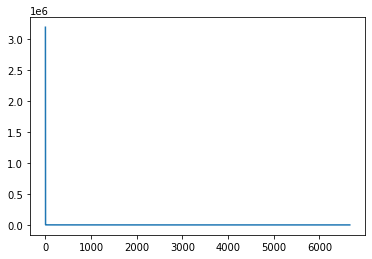

In [568]:
losses = []

n_epochs = 6666
lr = 0.0000001

weights = np.ones(n)

for i in tqdm(range(n_epochs)):
    
    preds = forward(weights)
    loss = error(preds)
    print(loss)
    losses.append(loss)
    
    derivatives = get_derivatives(weights)
    weights -= lr*derivatives
    
print(weights)

plt.plot([*range(0, n_epochs)], losses)

In [614]:
newpreds = forward(weights)
print(np.mean(data_y-newpreds))
from random import randint
a = randint(0, m)
data_y[a], newpreds[a]

0.2987048514913279


(2.373, -11.586235610087616)

<class 'pandas.core.frame.DataFrame'>


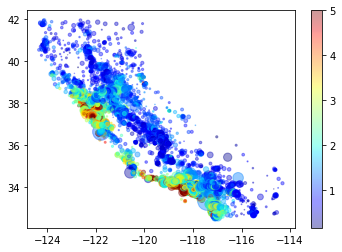

In [573]:
orig_data_X = pd.DataFrame(data=california_housing["data"], columns=california_housing["feature_names"])
orig_data_y = pd.DataFrame(data=california_housing["target"], columns=california_housing["target_names"])

plt.scatter(orig_data_X["Longitude"], 
            orig_data_X["Latitude"], 
            s=orig_data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=orig_data_y["MedHouseVal"])
plt.colorbar()
print(type(orig_data_y))

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


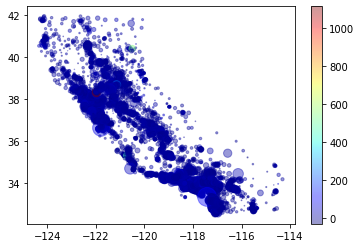

In [575]:
plt.scatter(orig_data_X["Longitude"], 
            orig_data_X["Latitude"], 
            s=orig_data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=newpreds)
plt.colorbar()
print(data_y)